# 第七章 PyTorch可视化

## 7.1 可视化网络结构
在深度学习的发展下, 神经网络的结构变得越来越复杂. 因此对神经网络每一层的参数, 结构的设计能够有直观的了解是非常重要的. 这就是为什么我们需要网络结构的可视化工具.

对于其他的一些深度学习库如Keras具有`model.summary()`的API可以实现可视化. 而在PyTorch当中, 我们使用torchinfo工具包.

### 7.1.1 使用print函数打印基础信息
使用的例子是ResNet18的结构

In [1]:
import torchvision.models as models
model = models.resnet18()

In [2]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

可以发现, 使用model只能得到基础的结构信息. 而使用`torchinfo`可以显示对应参数量的大小以及每一层的shape.

### 7.1.2 使用torchinfo可视化网络结构
- torchinfo的安装

`conda install -c conda-forge torchinfo`

- torchinfo的使用

我们只需使用`torchinfo.summary()`就行了, 必需的参数为model, input_size[batch_size, channel, h, w].

In [7]:
import torchvision.models as models
from torchinfo import summary
resnet18 = models.resnet18()  # 实例化模型
summary(model, (1, 3, 224, 224))  # 第二个参数分别为batch_size, channel, 图片的高宽

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   --                        --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

## 7.2 CNN可视化
卷积神经网络是非常重要的神经网络模型, 它广泛用于图像处理, 而且极大地提升了模型表现. 但是人们并不知道CNN为什么能够取得这样好的表现, 由此也带来了深度学习的可解释性问题. 

如果我们能够进行CNN的可视化, 我们就可以进一步优化模型的结构, 提升模型的鲁棒性, 并且可以解释得到的结果.

可视化的基本内容
- 可视化特征是如何提取的
- 提取的特征的形式
- 模型在输入数据上的关注点

### 7.2.1 CNN卷积核可视化
卷积核是CNN中负责提取特征的部分.

![layer2](./figures/layer2.png)

![layer3](./figures/layer3.png)

![layer4](./figures/layer4.png)

特定层的卷积核即为特定层的模型权重. 因此我们就需要可视化该层的权重矩阵.
以下为以VGG11模型为例的实例.

1. 加载模型, 确定层信息

In [4]:
import torch
import matplotlib.pyplot as plt
from torchvision.models import vgg11

model = vgg11(pretrained=True)
print(dict(model.features.named_children()))

{'0': Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '1': ReLU(inplace=True), '2': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '3': Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '4': ReLU(inplace=True), '5': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '6': Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '7': ReLU(inplace=True), '8': Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '9': ReLU(inplace=True), '10': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '11': Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '12': ReLU(inplace=True), '13': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '14': ReLU(inplace=True), '15': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '16': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '17'

卷积核对应权重矩阵应为卷积层类型(Conv2d), 我们可以进一步可视化对应的参数.

torch.Size([128, 64, 3, 3])


C:\Users\win-10\AppData\Local\Temp\ipykernel_25884\2126788672.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 17))


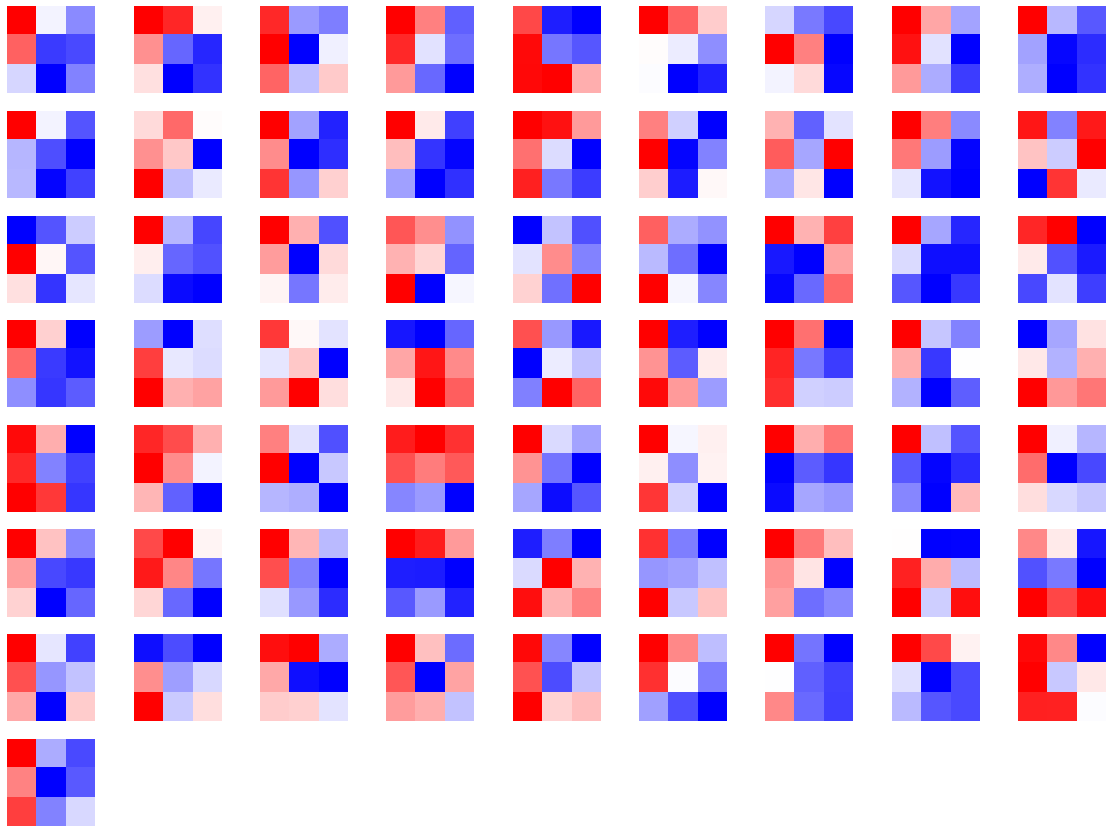

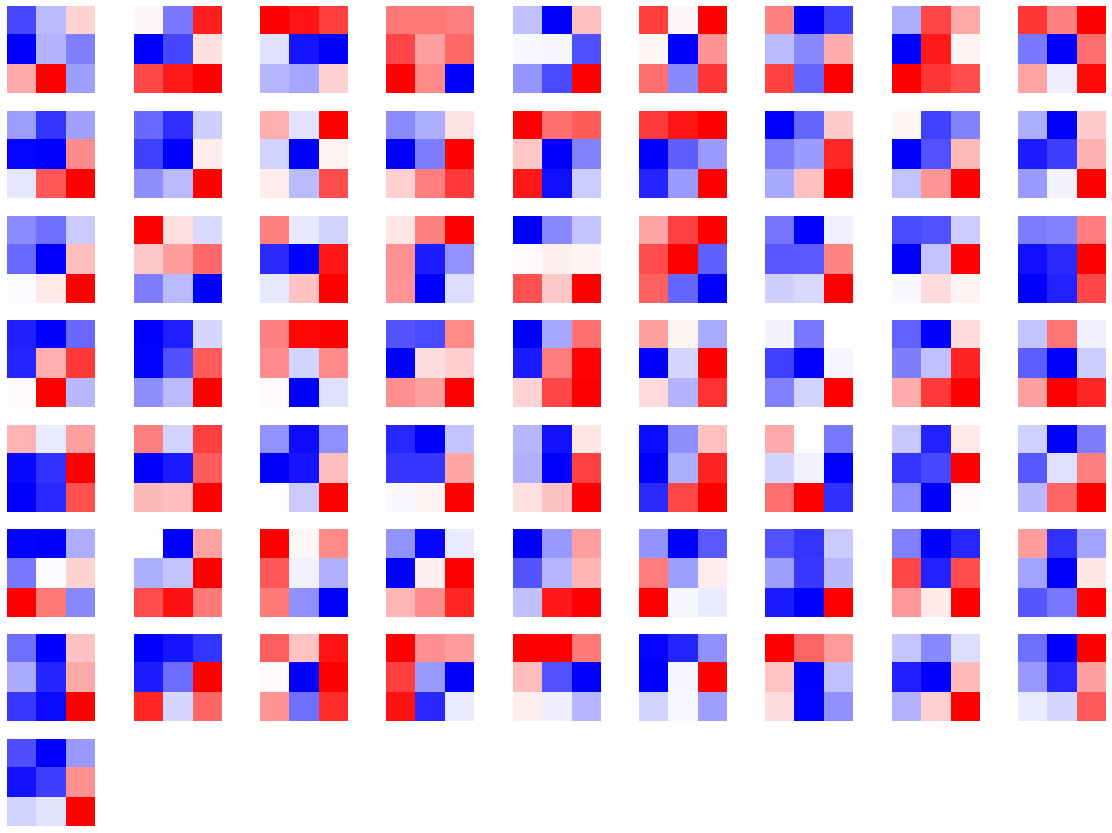

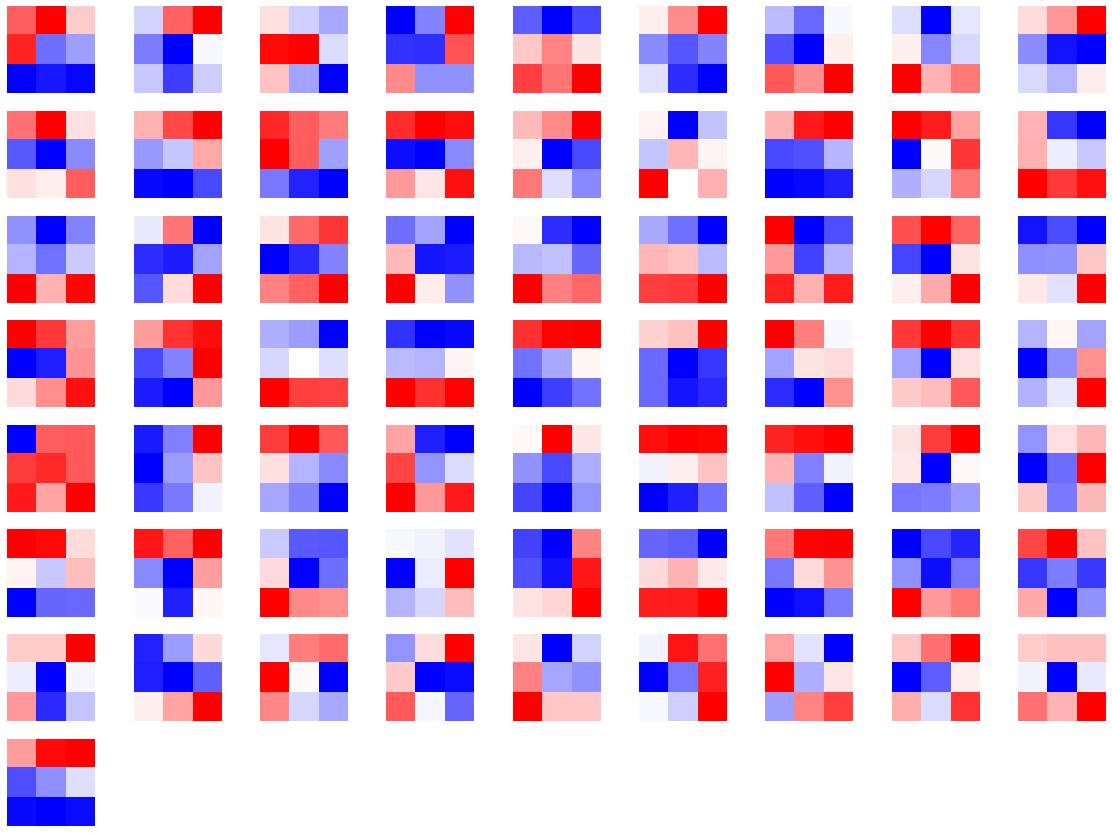

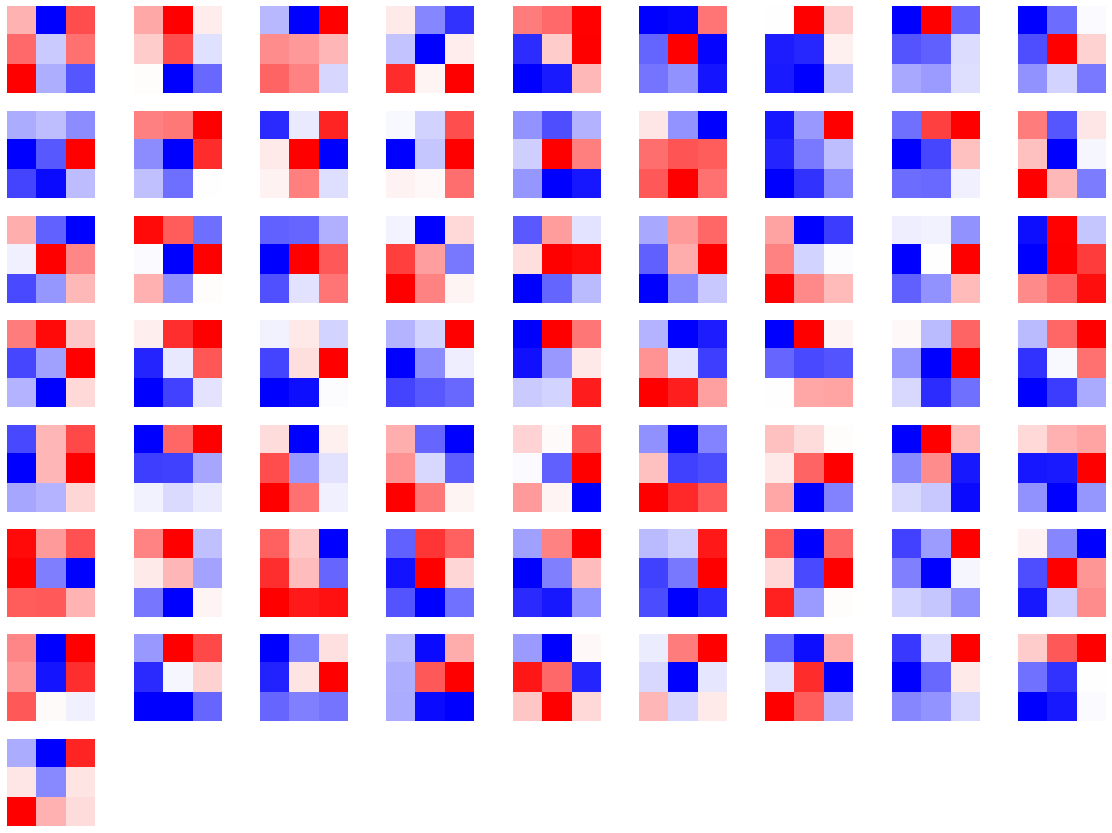

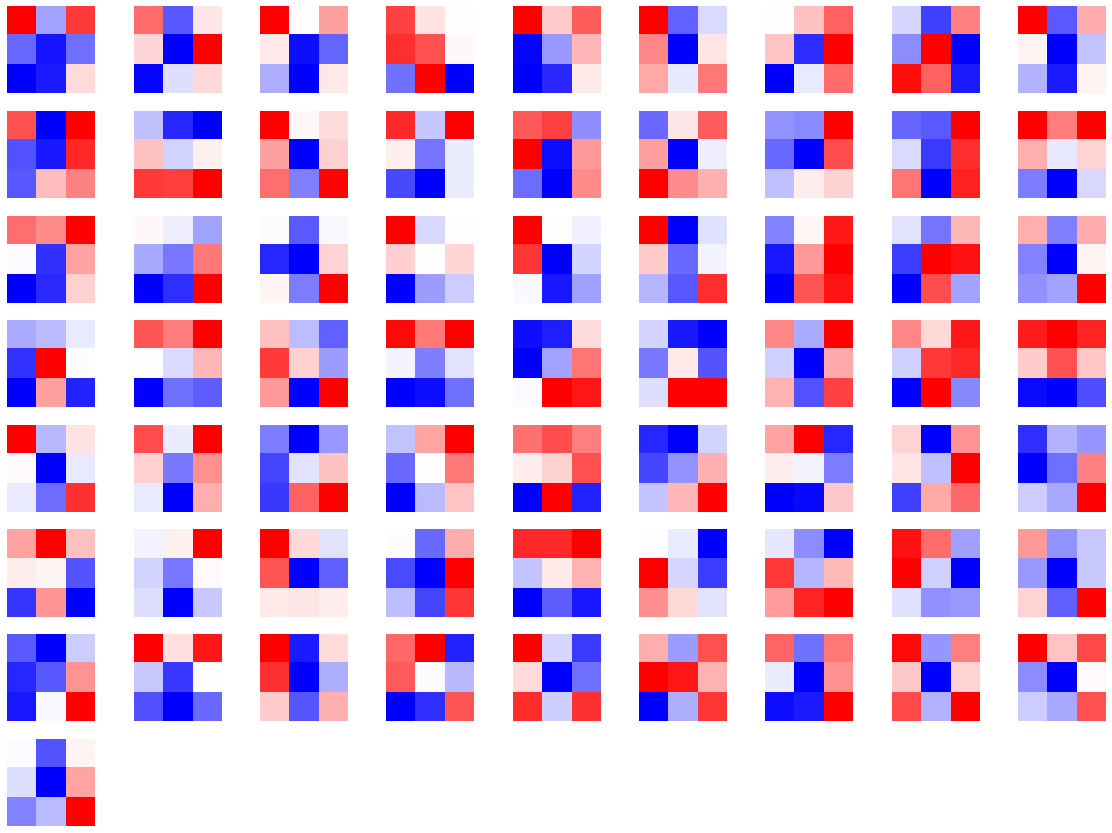

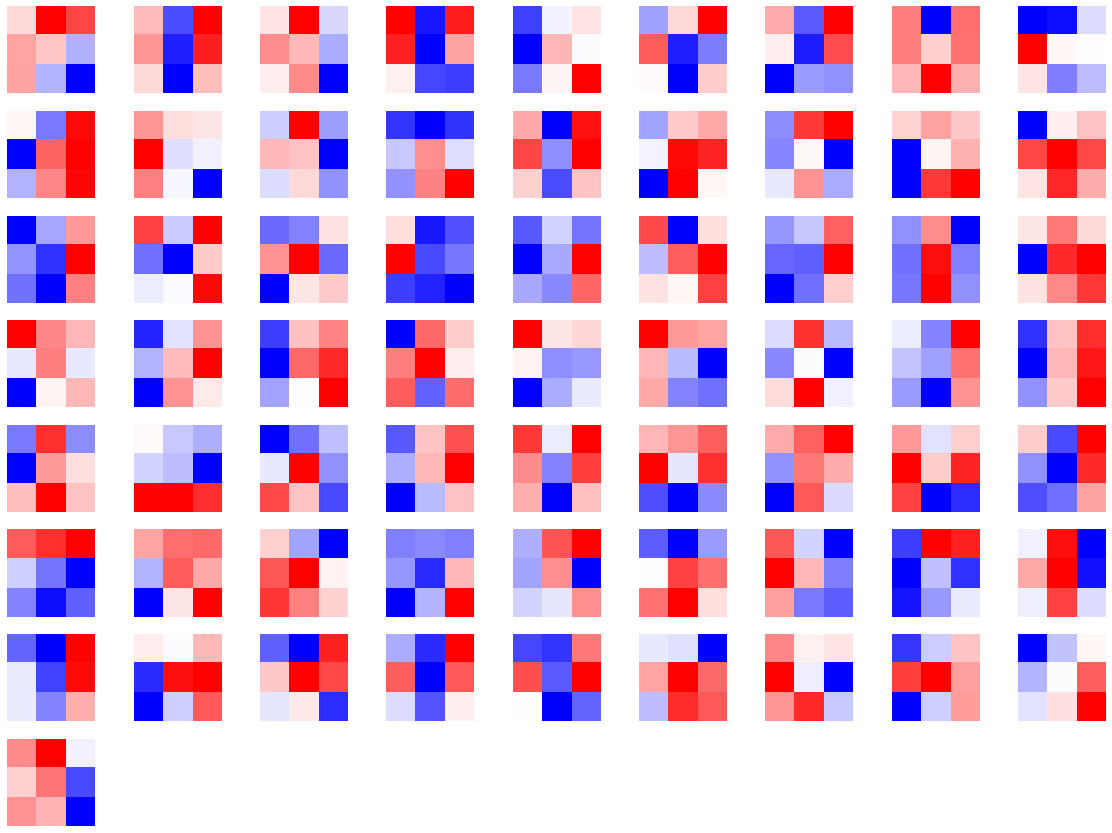

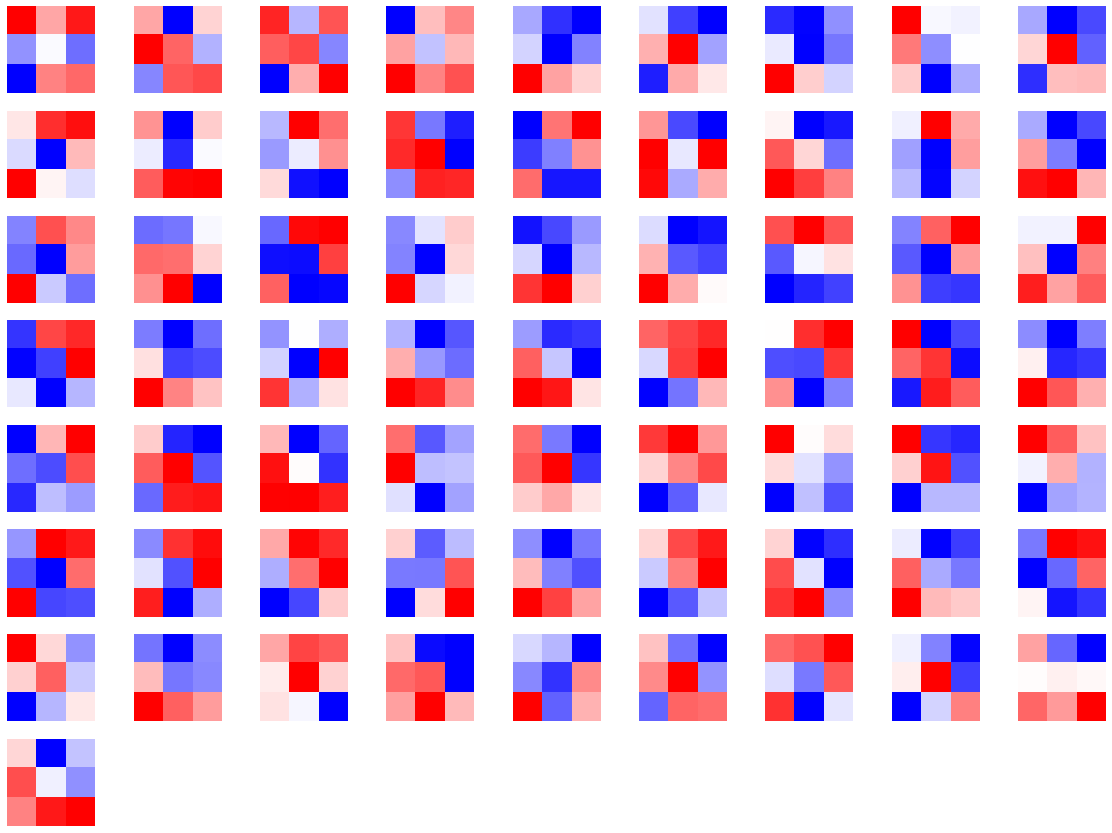

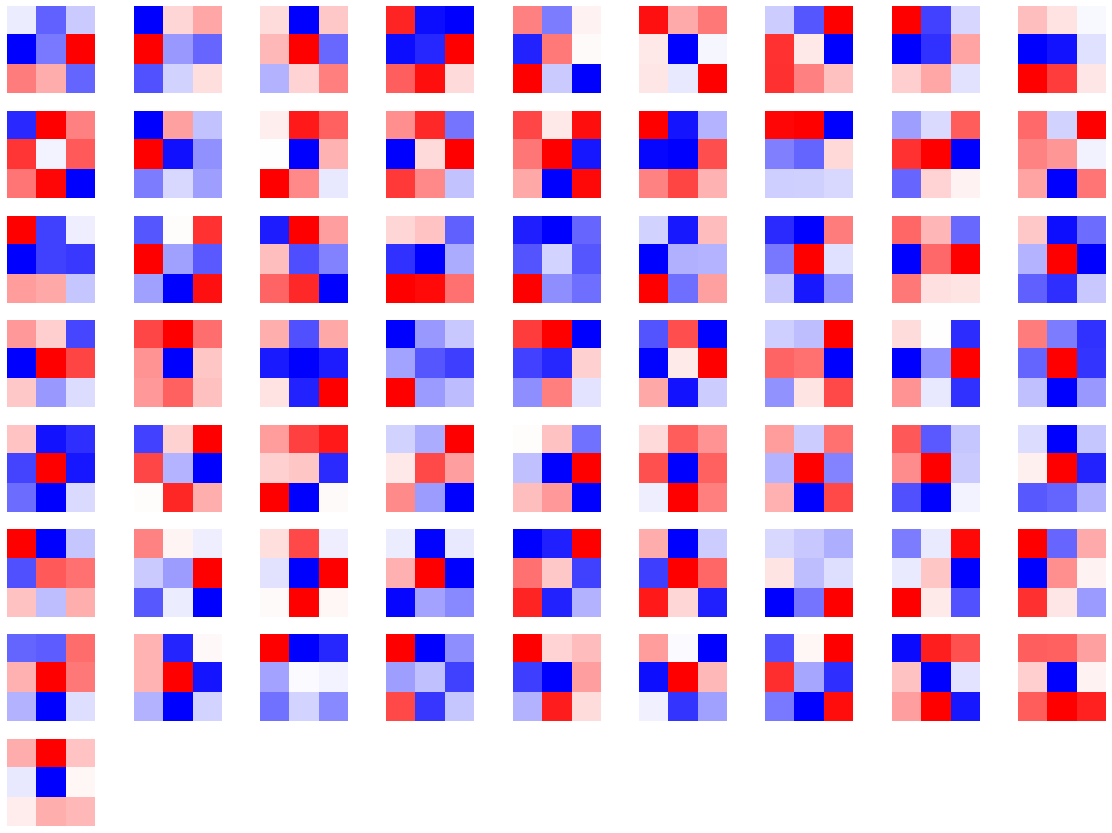

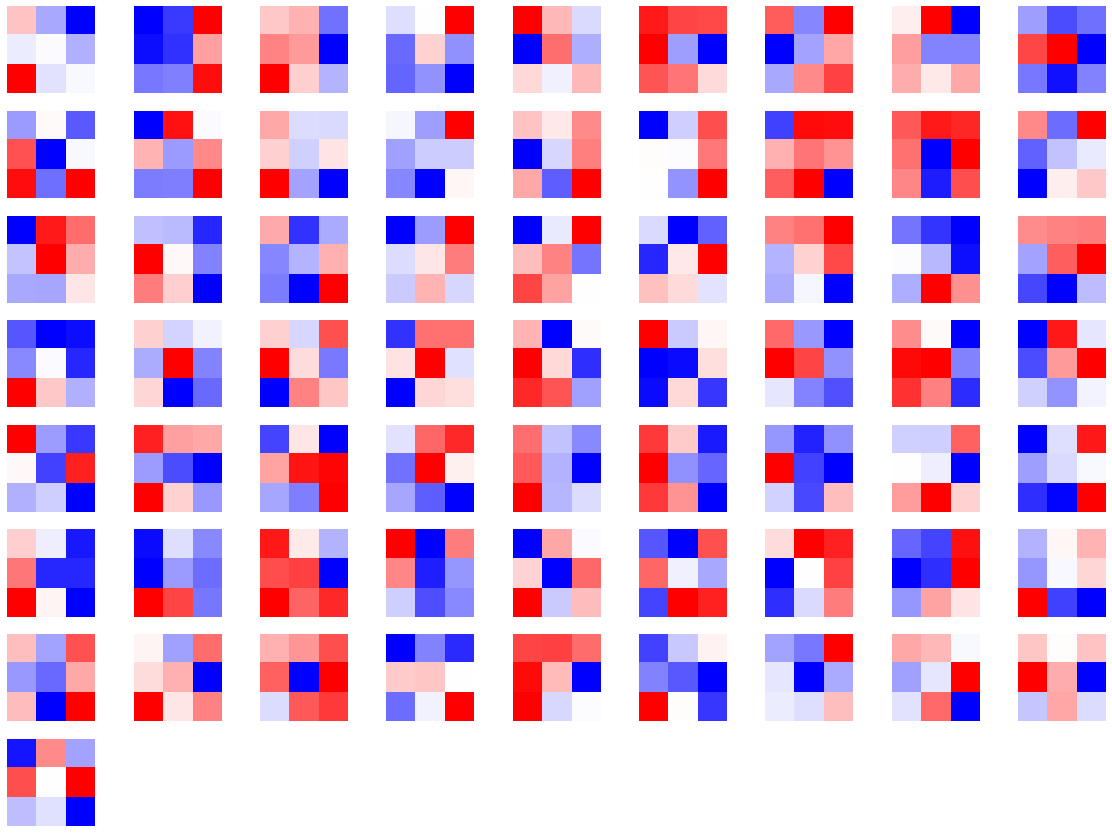

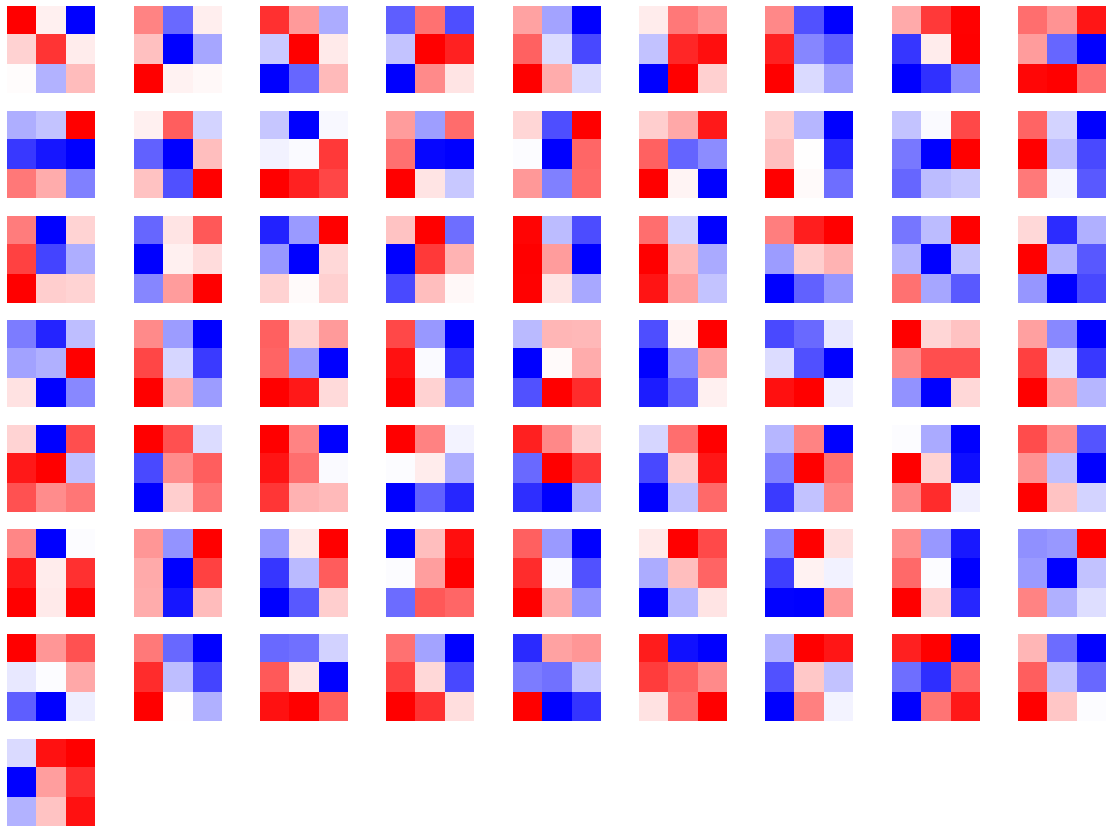

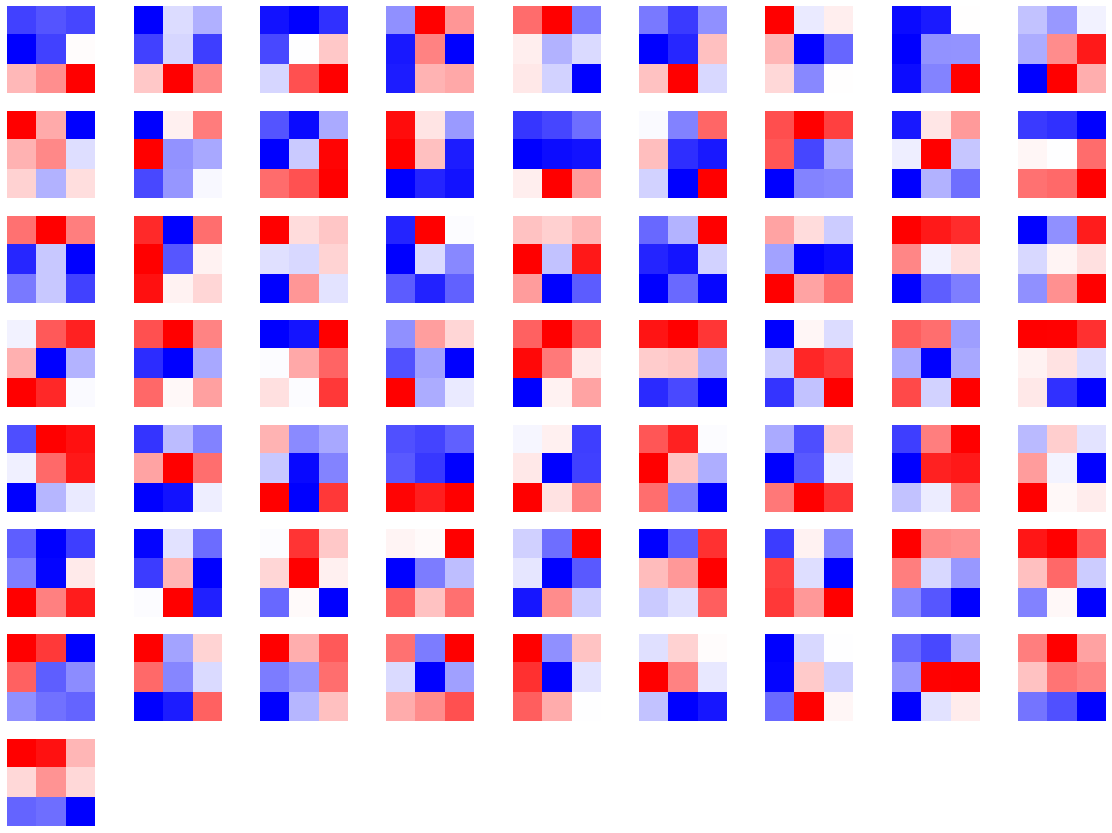

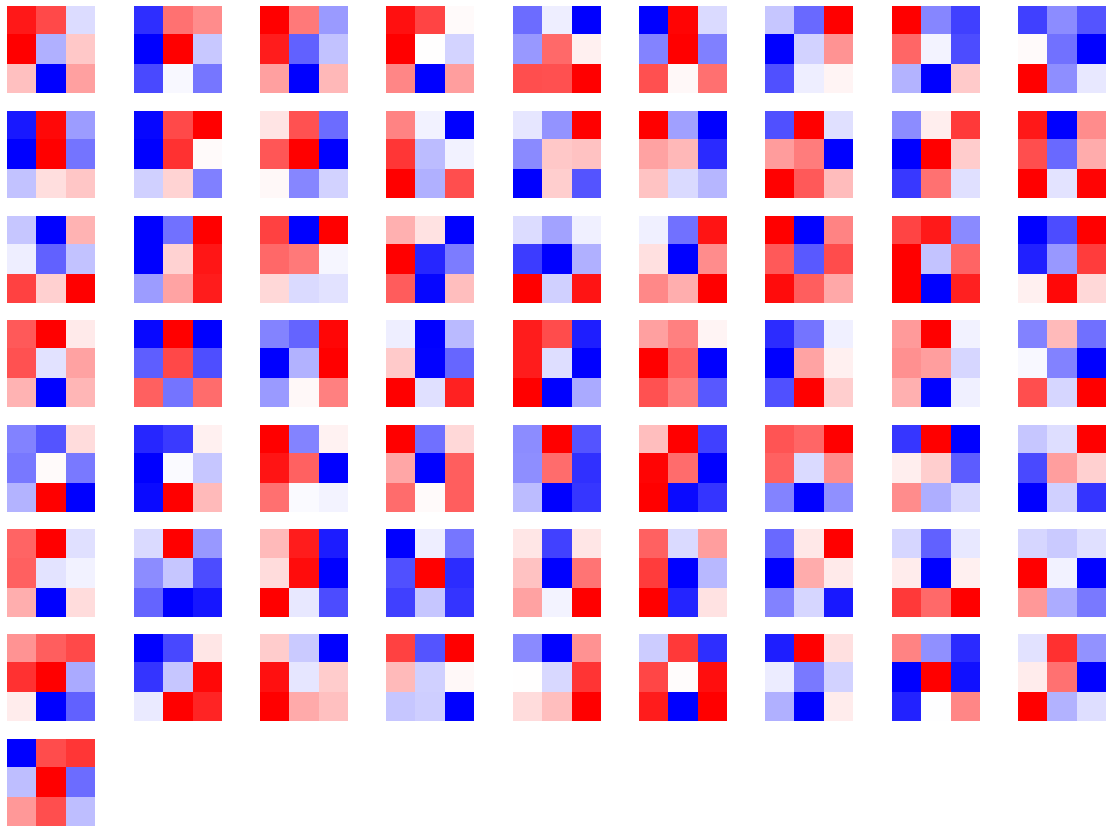

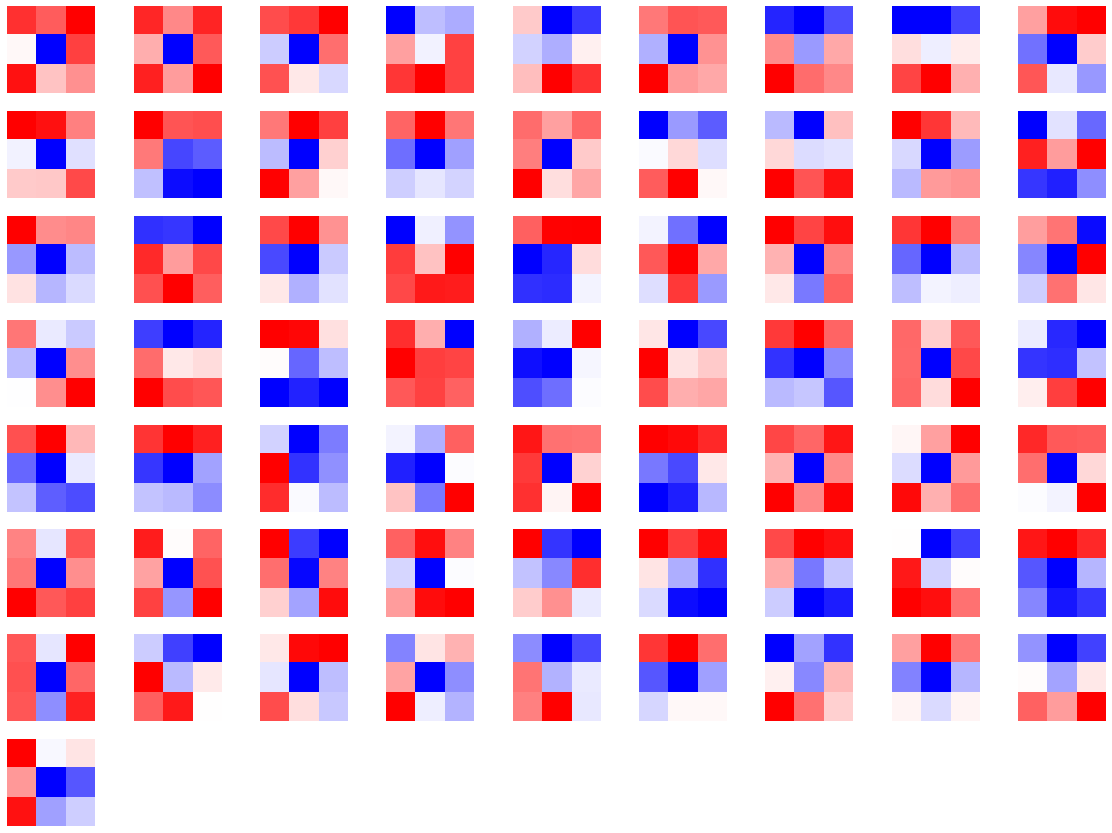

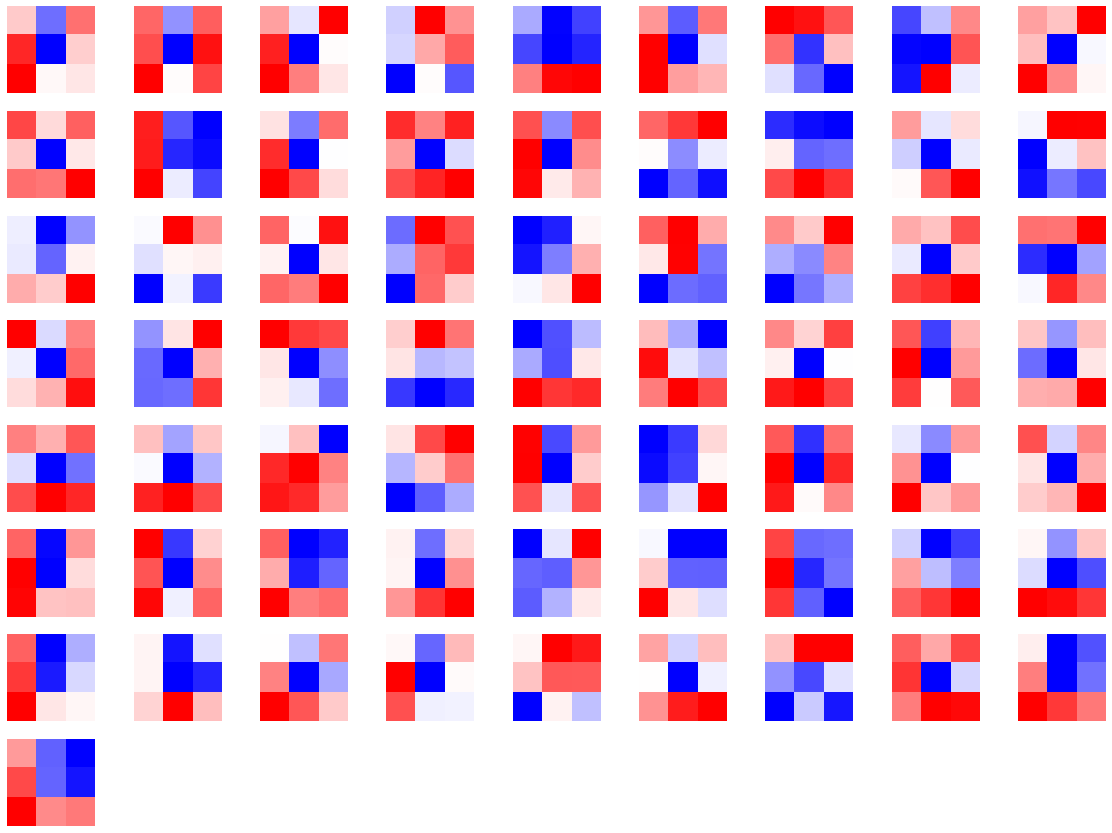

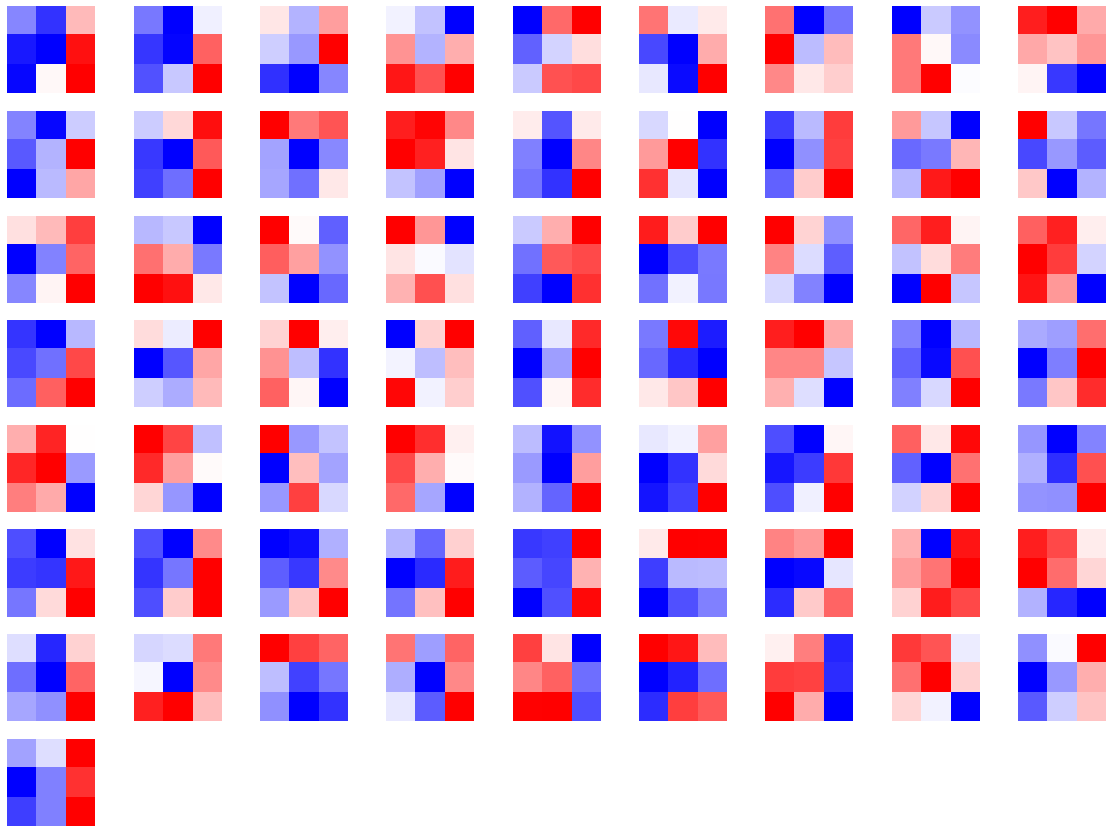

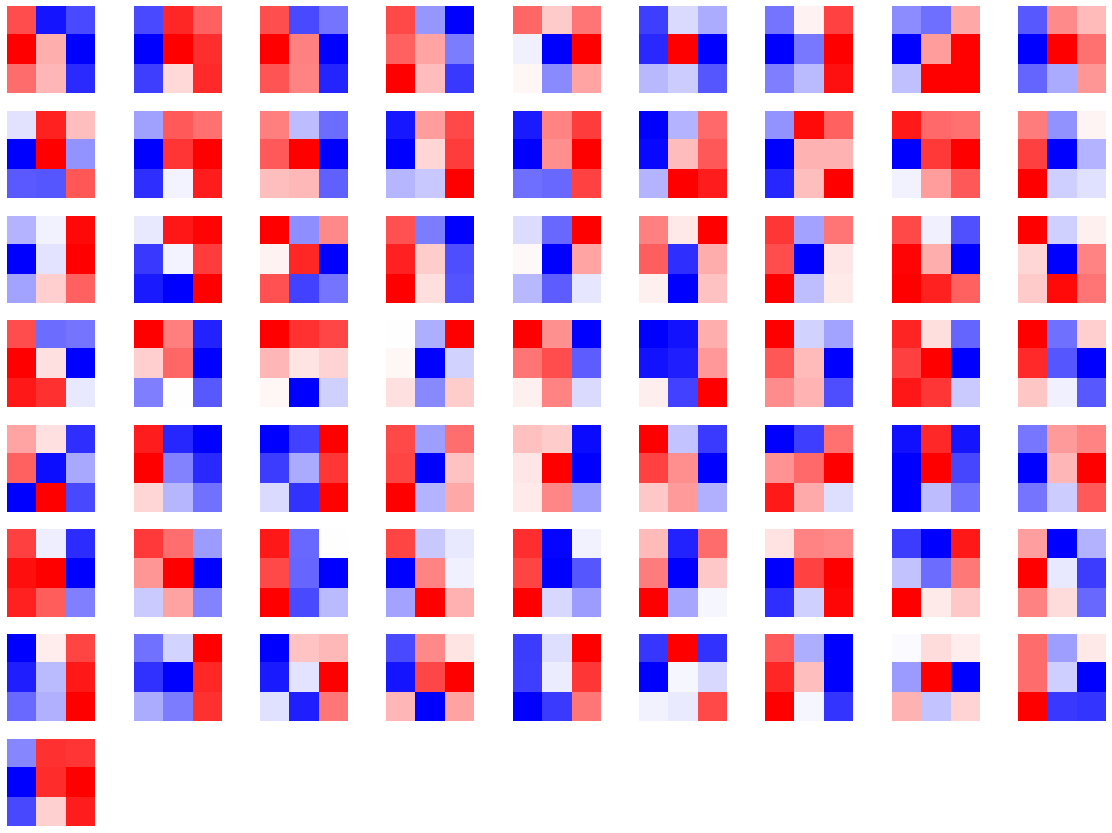

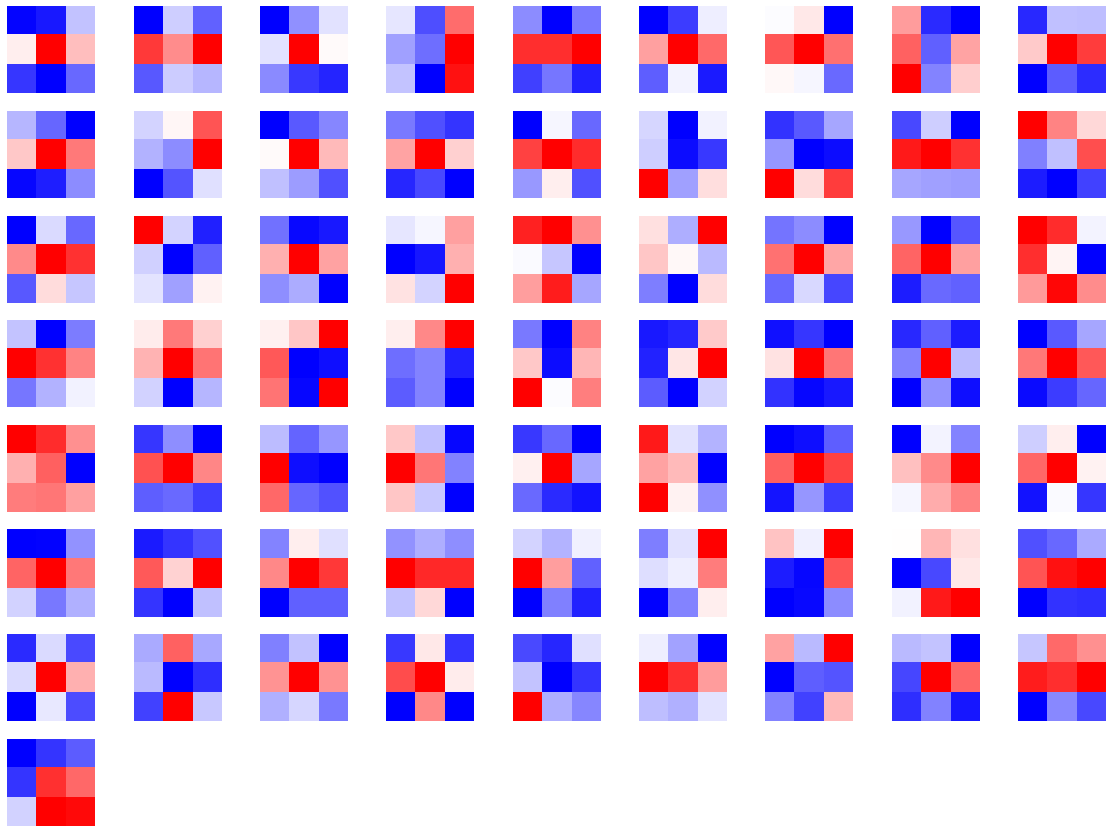

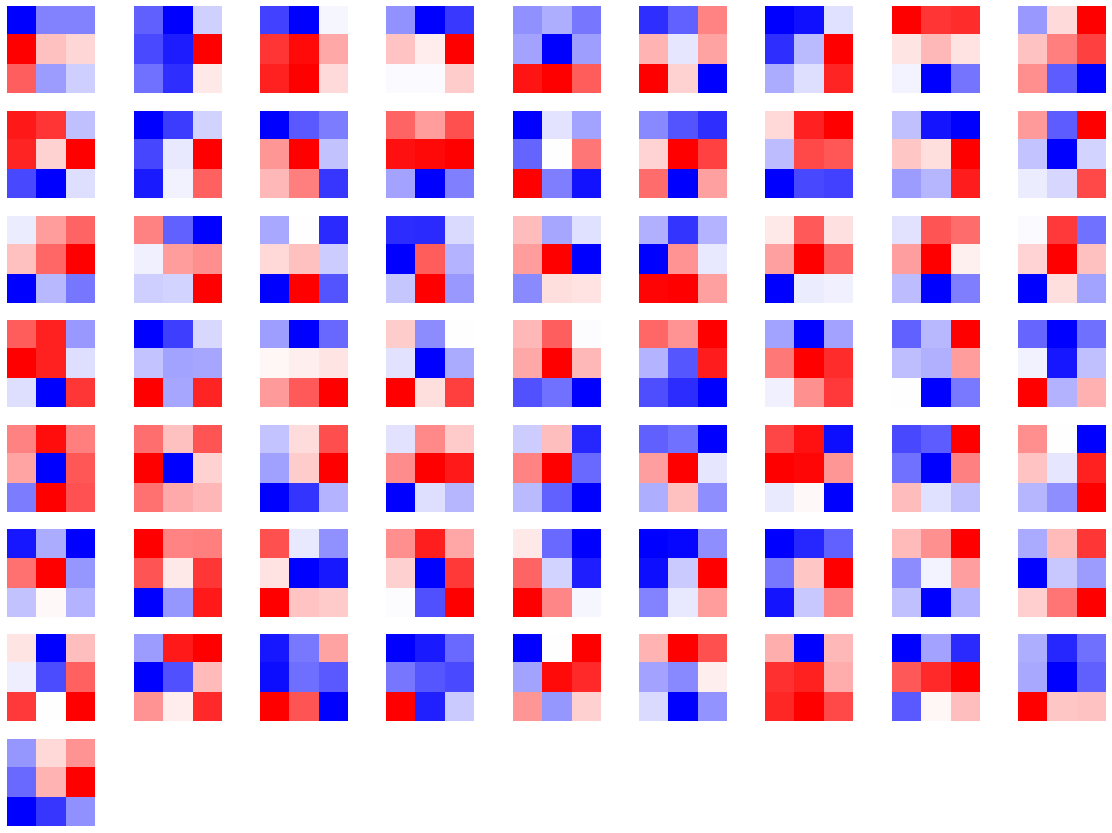

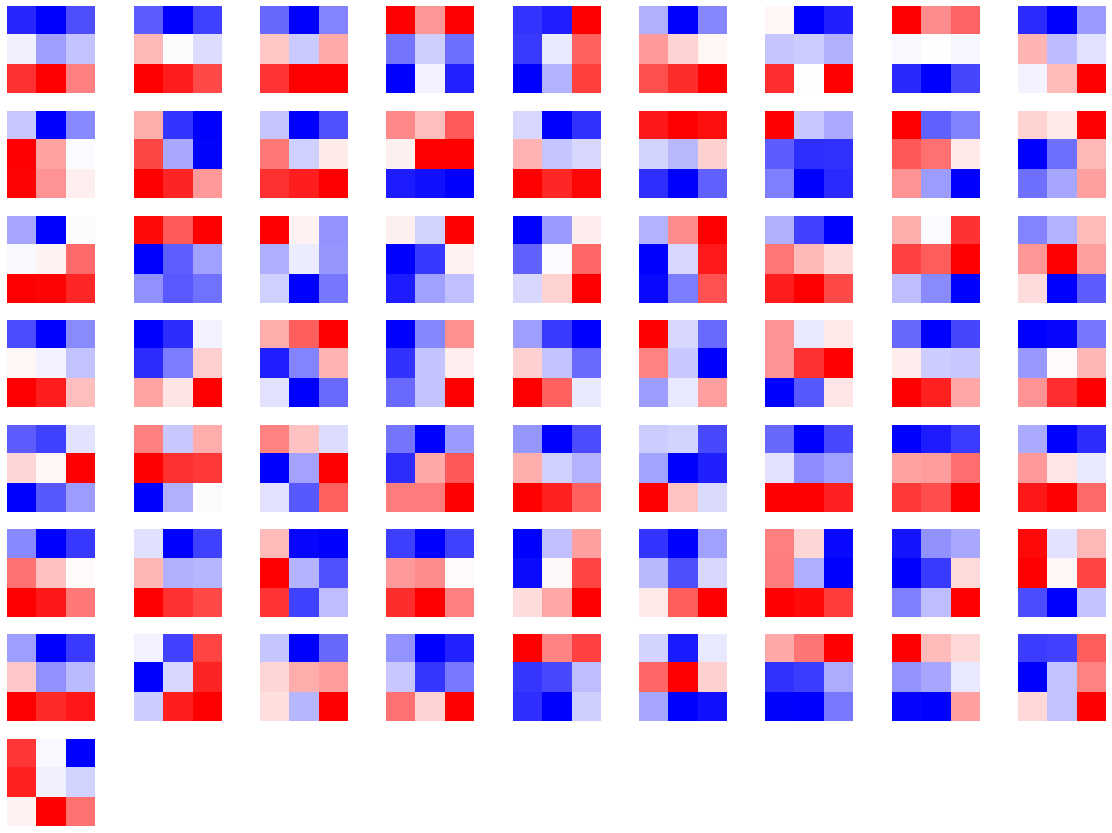

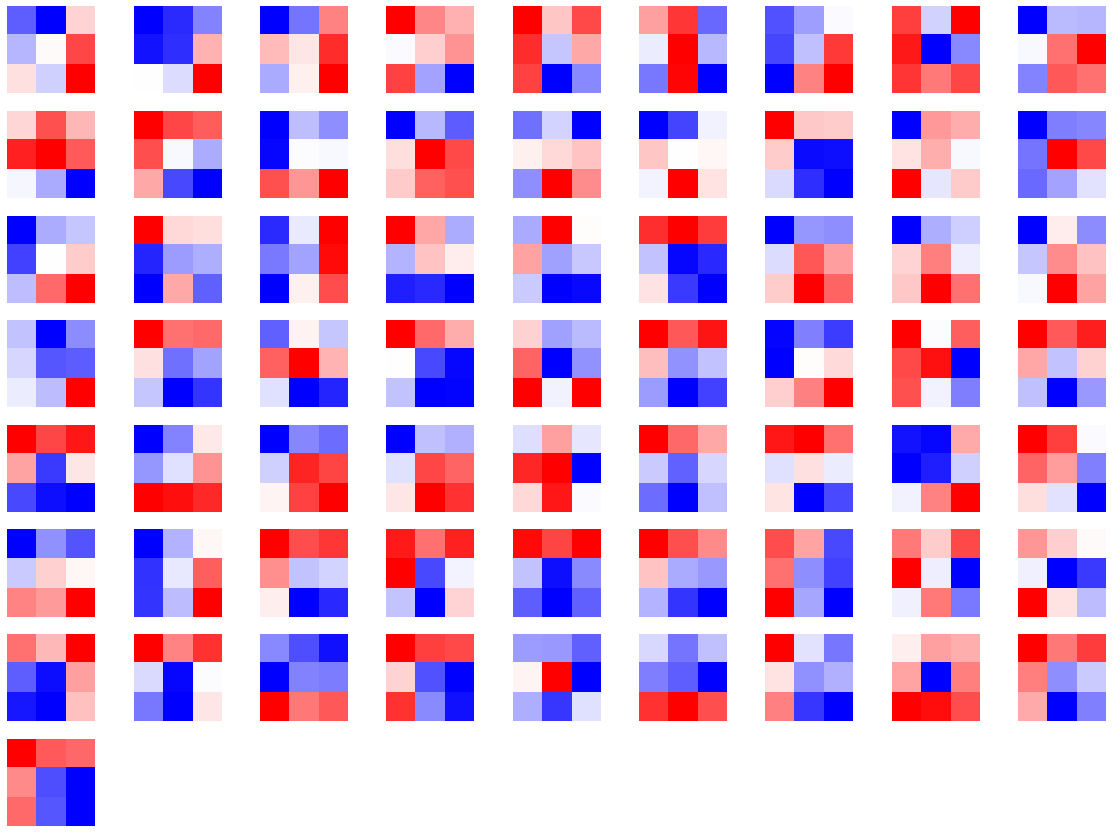

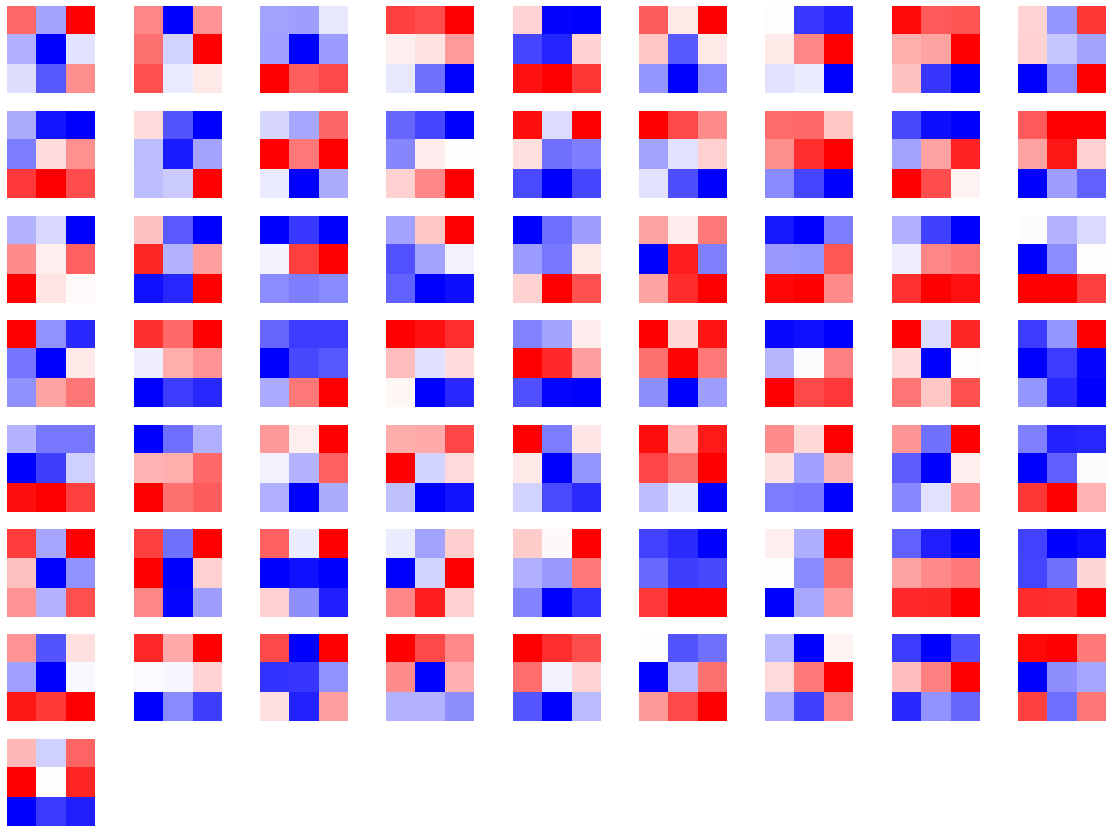

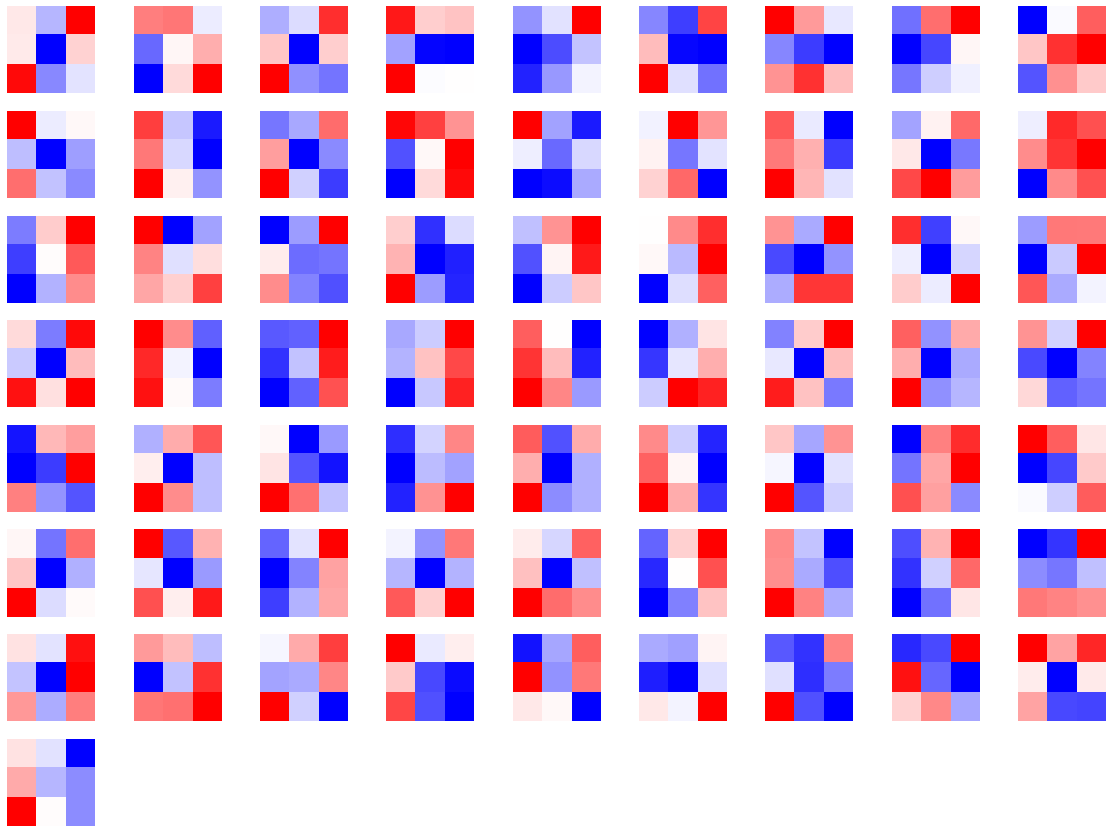

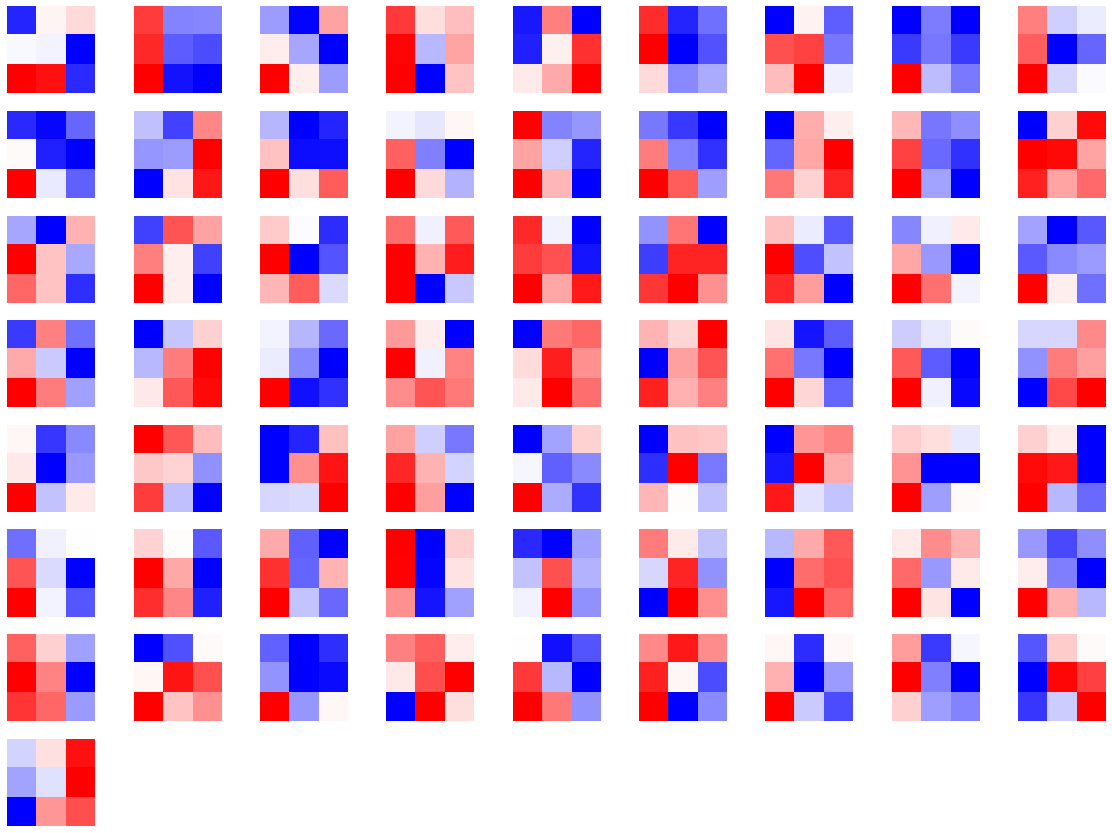

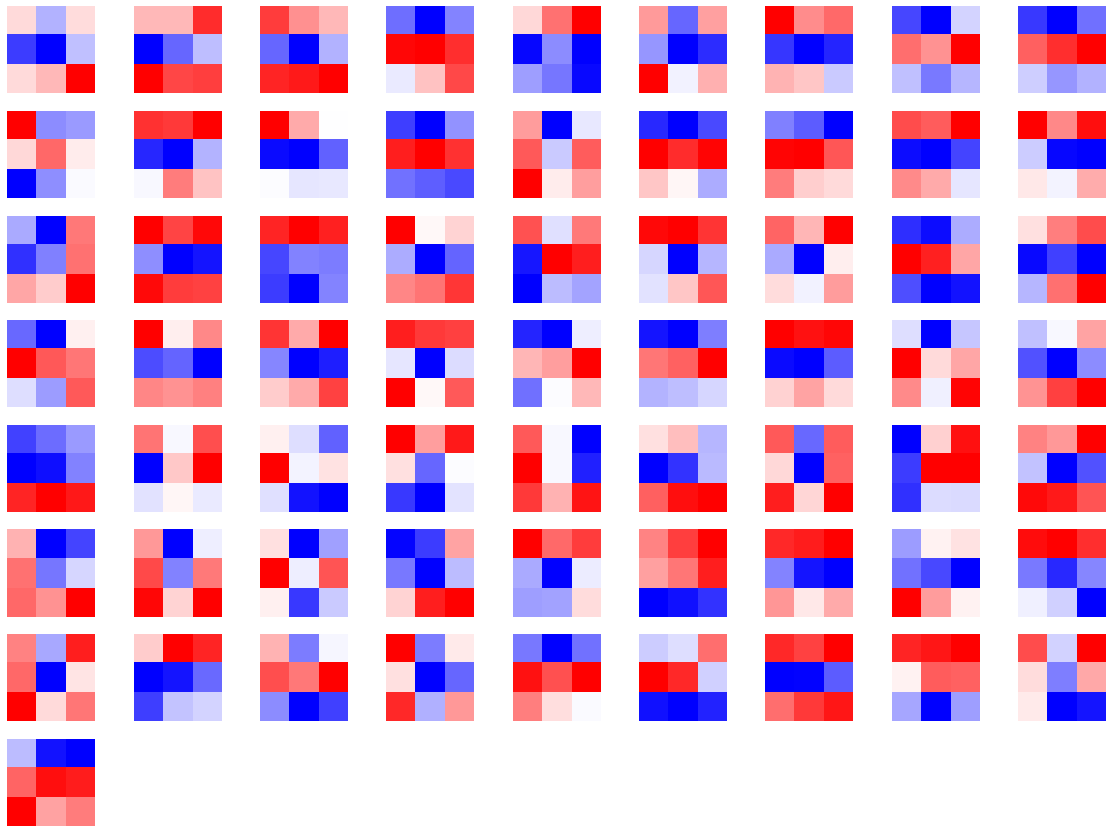

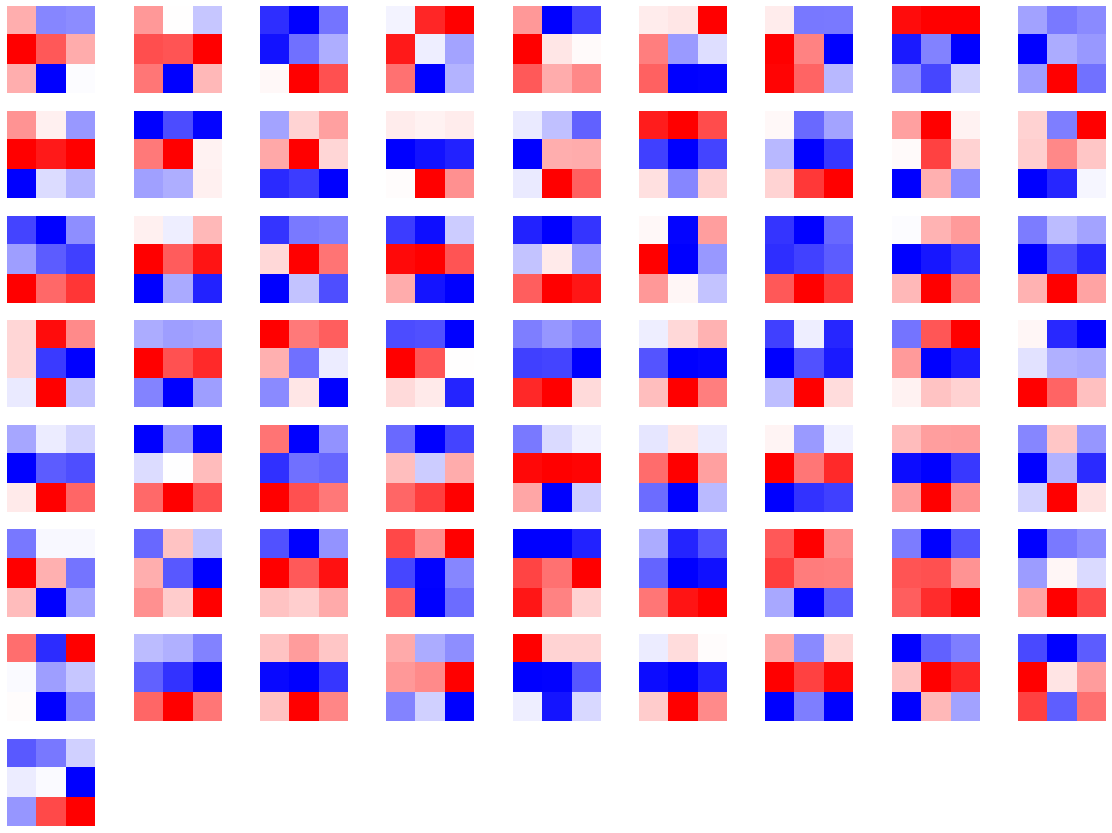

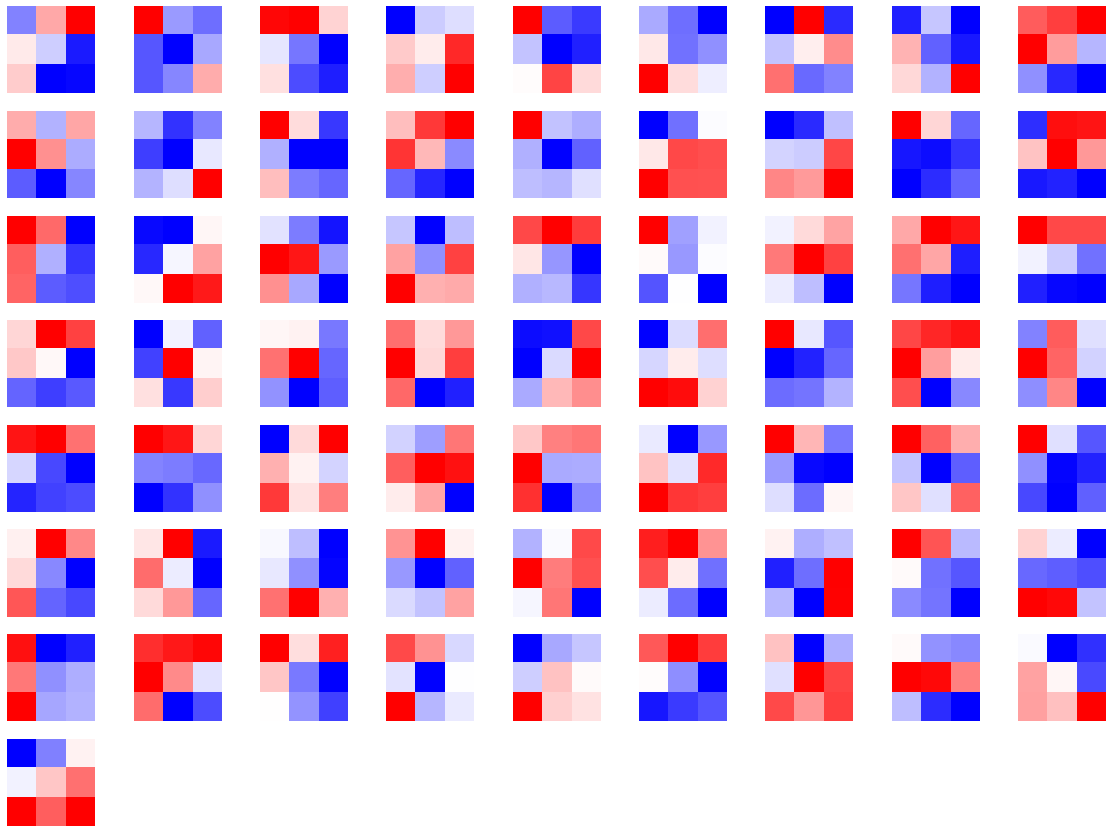

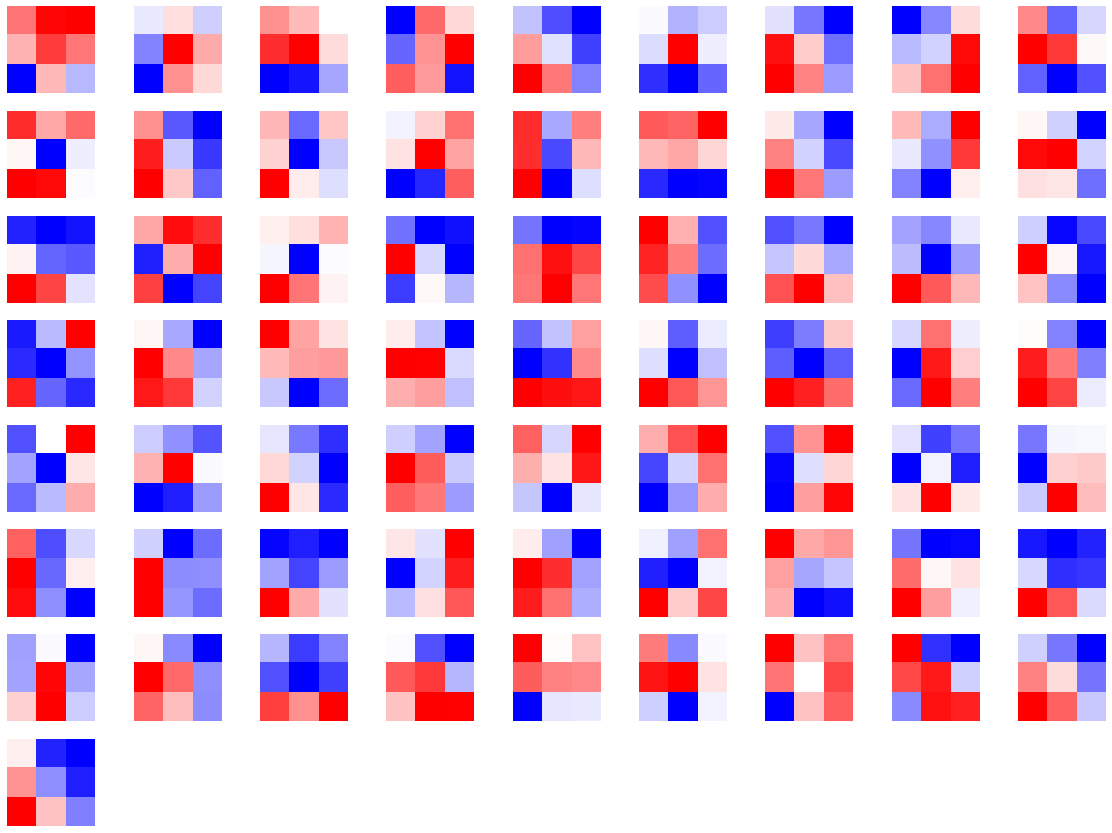

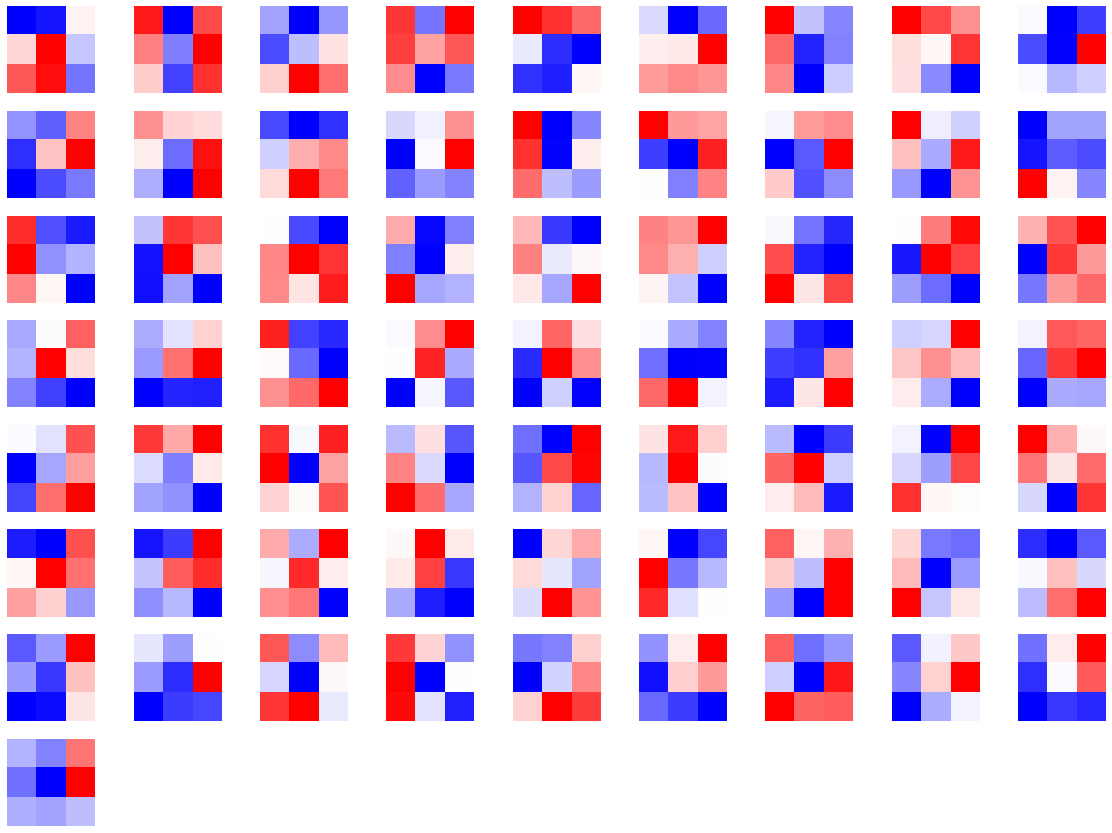

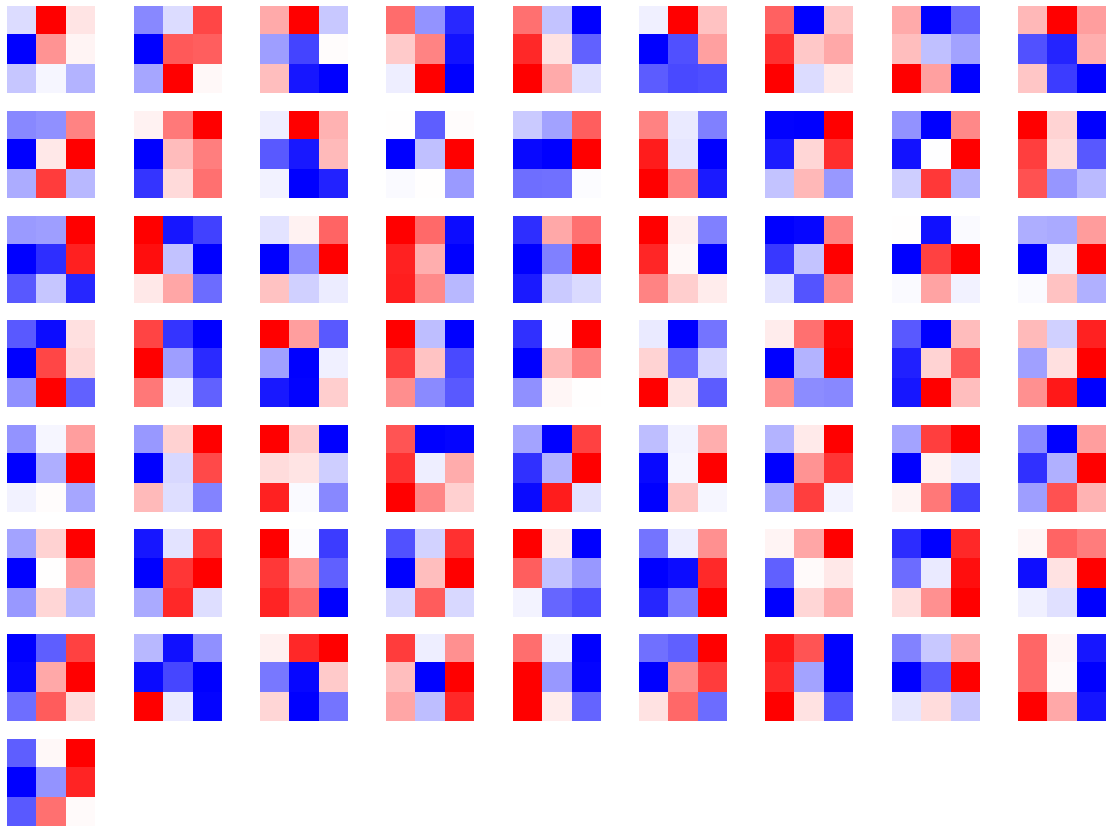

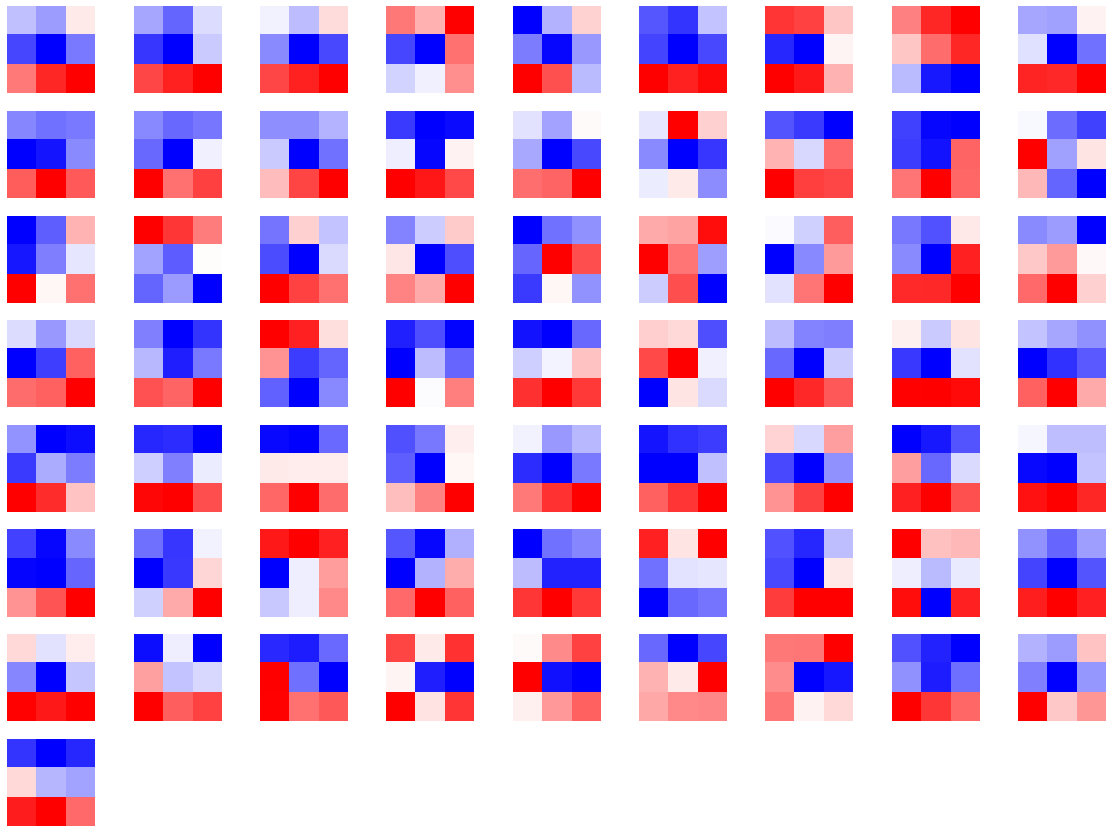

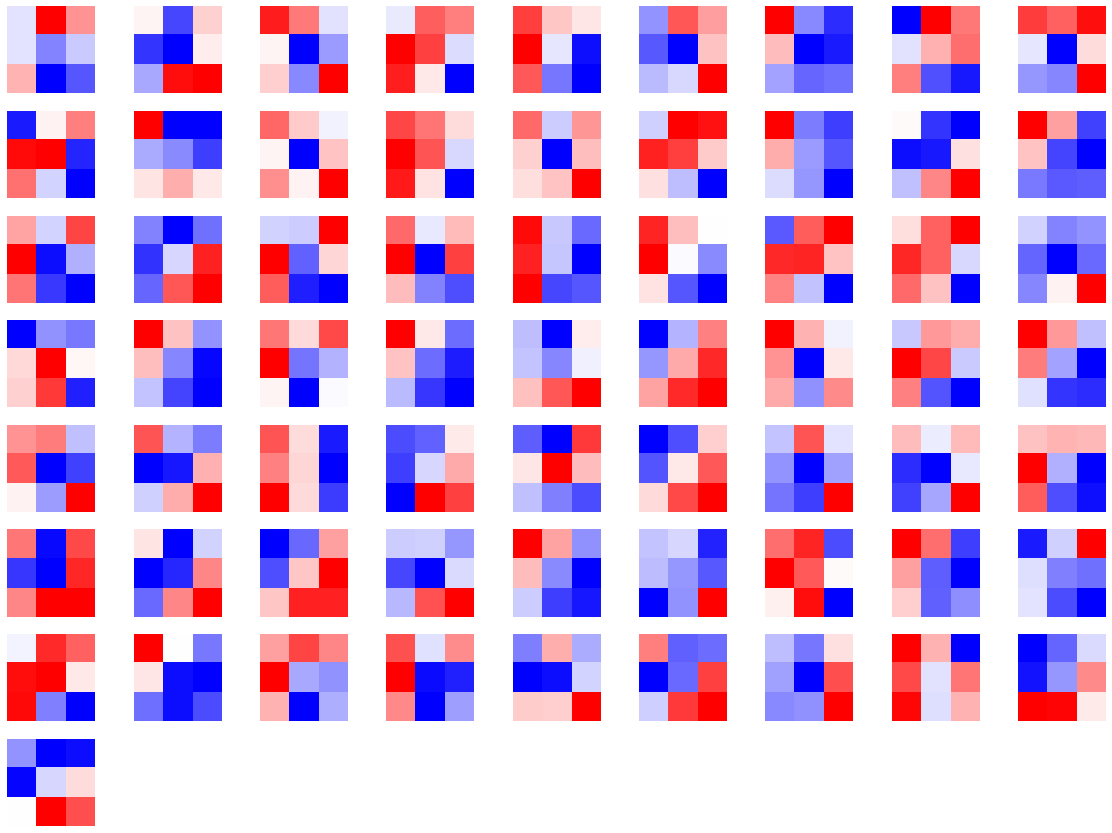

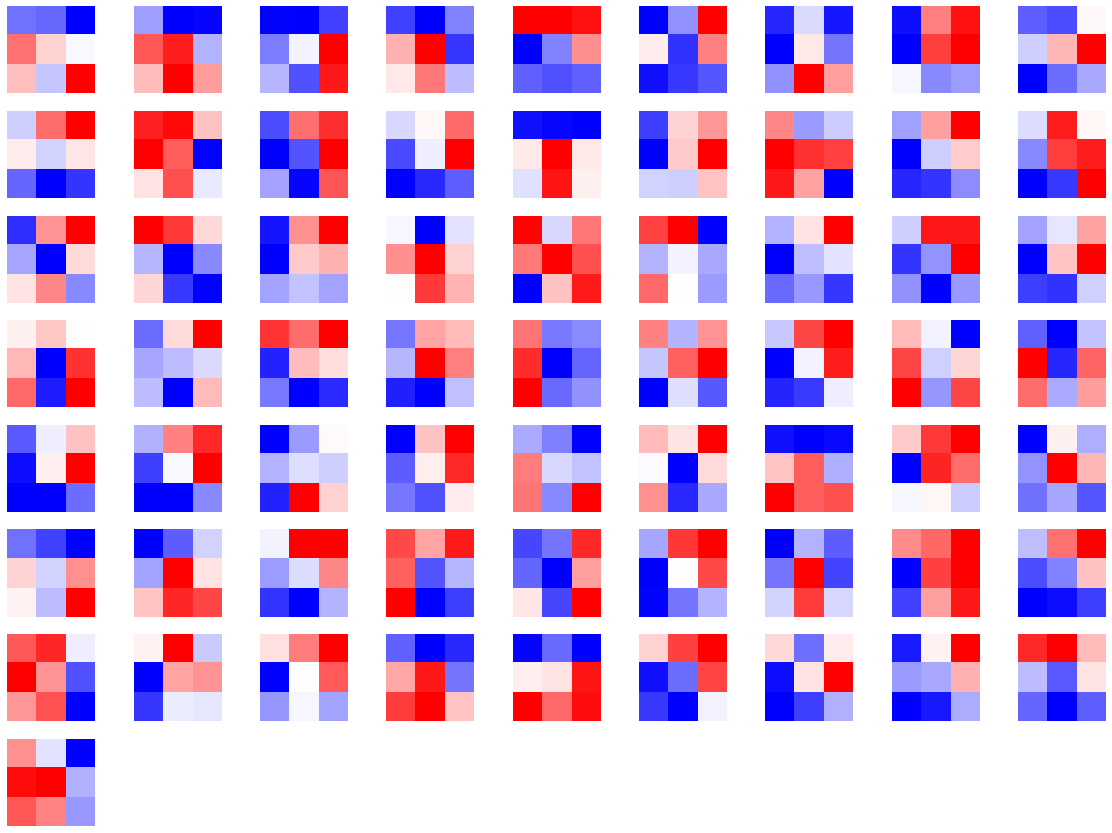

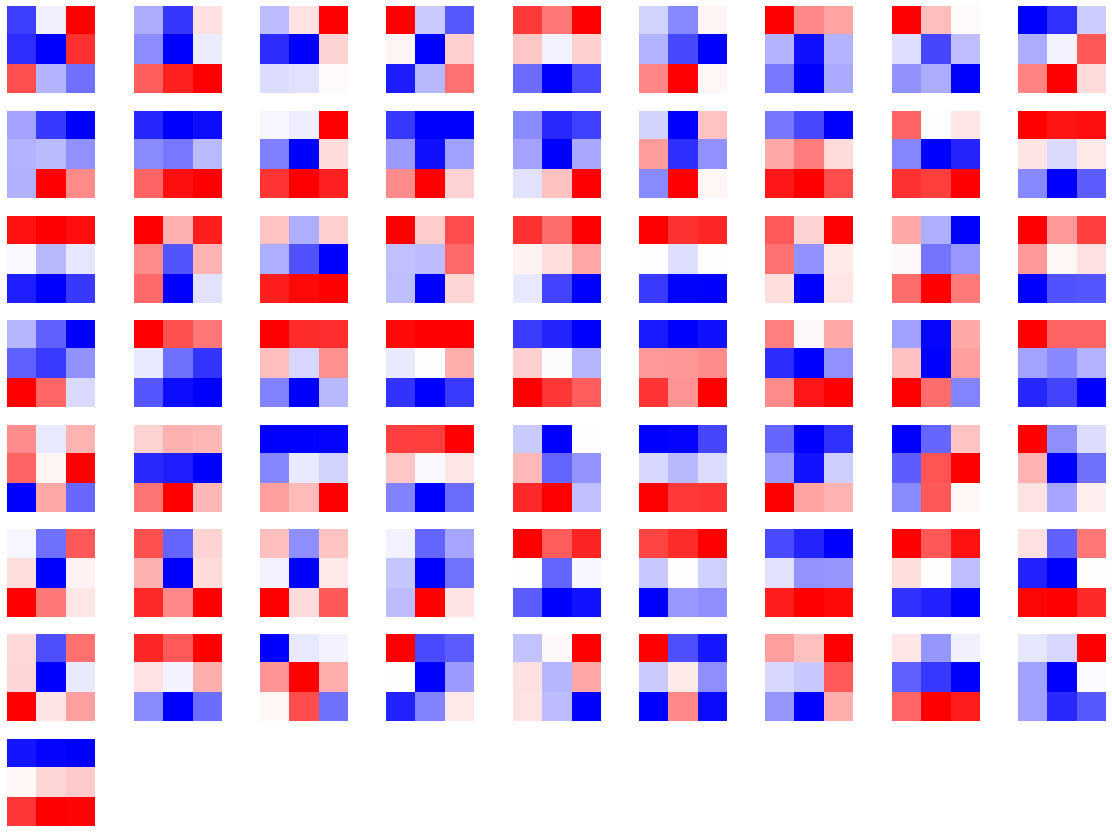

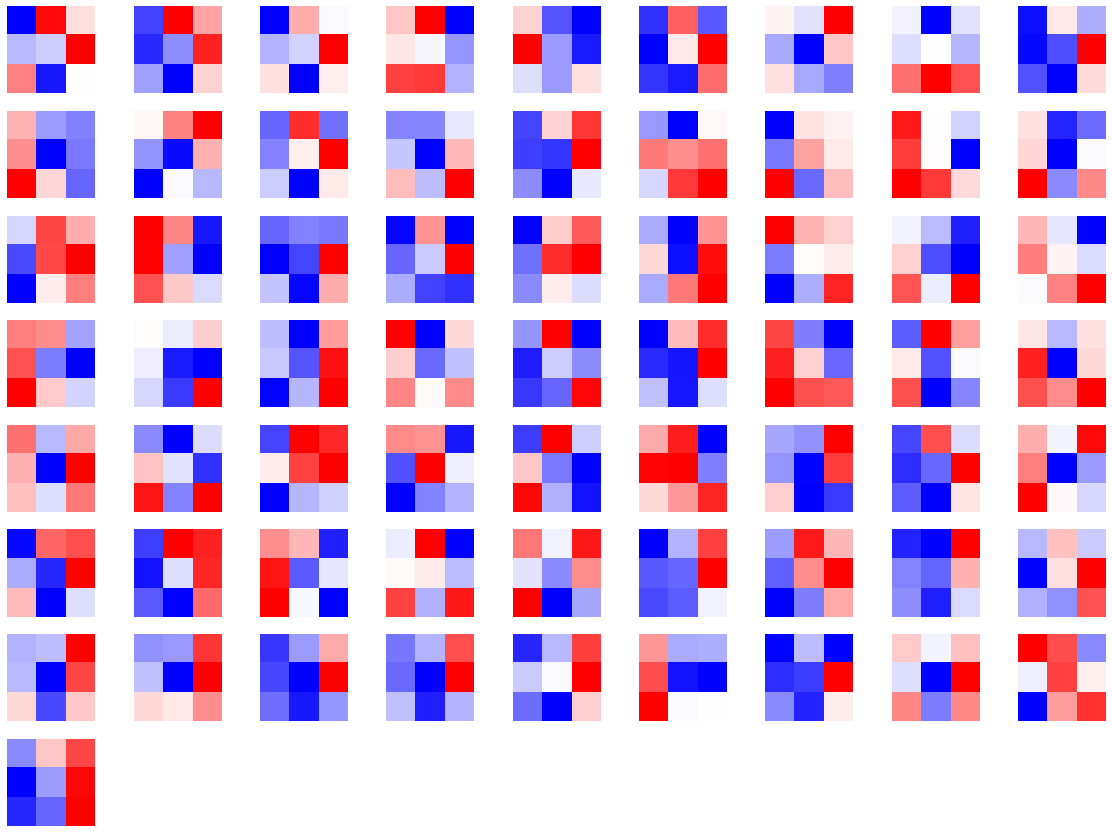

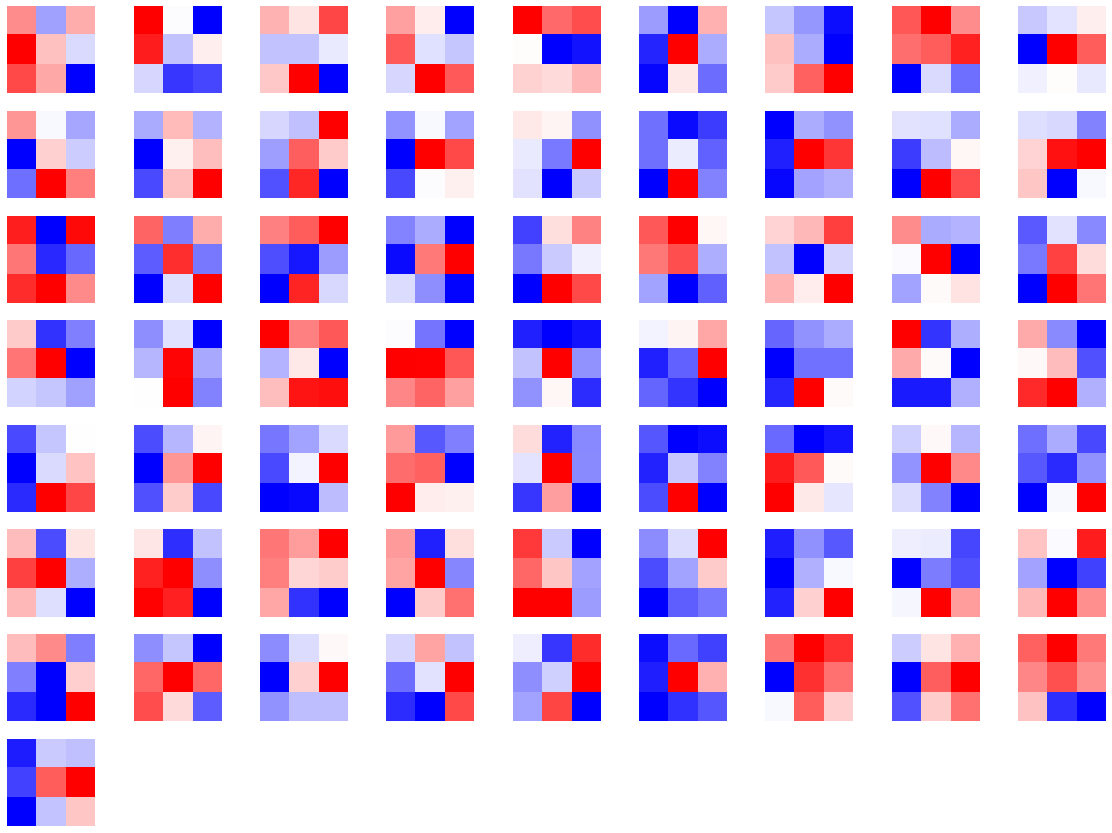

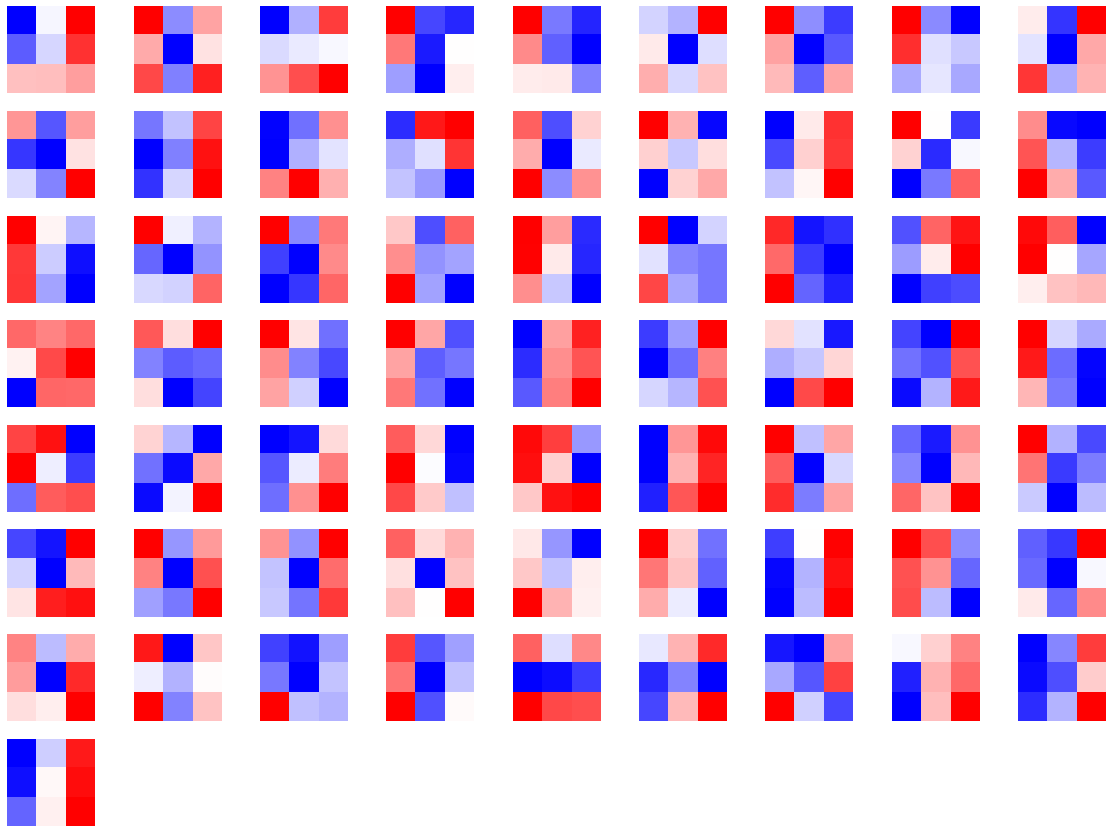

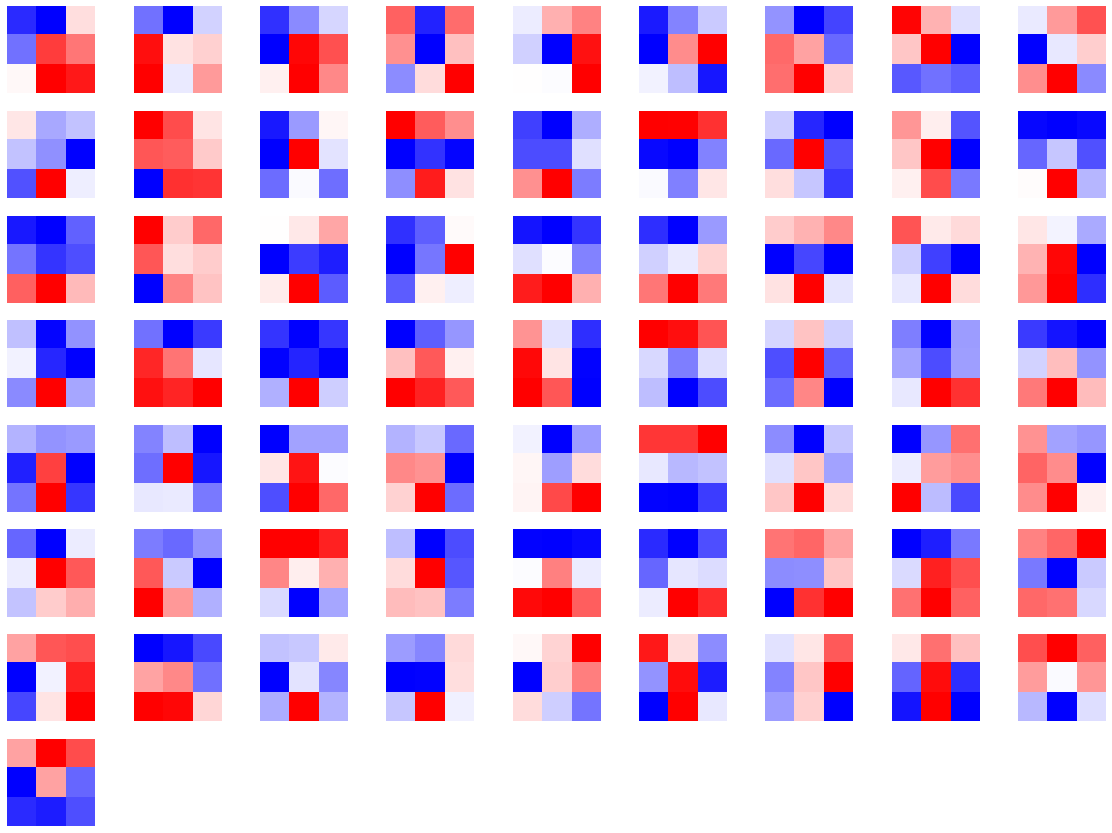

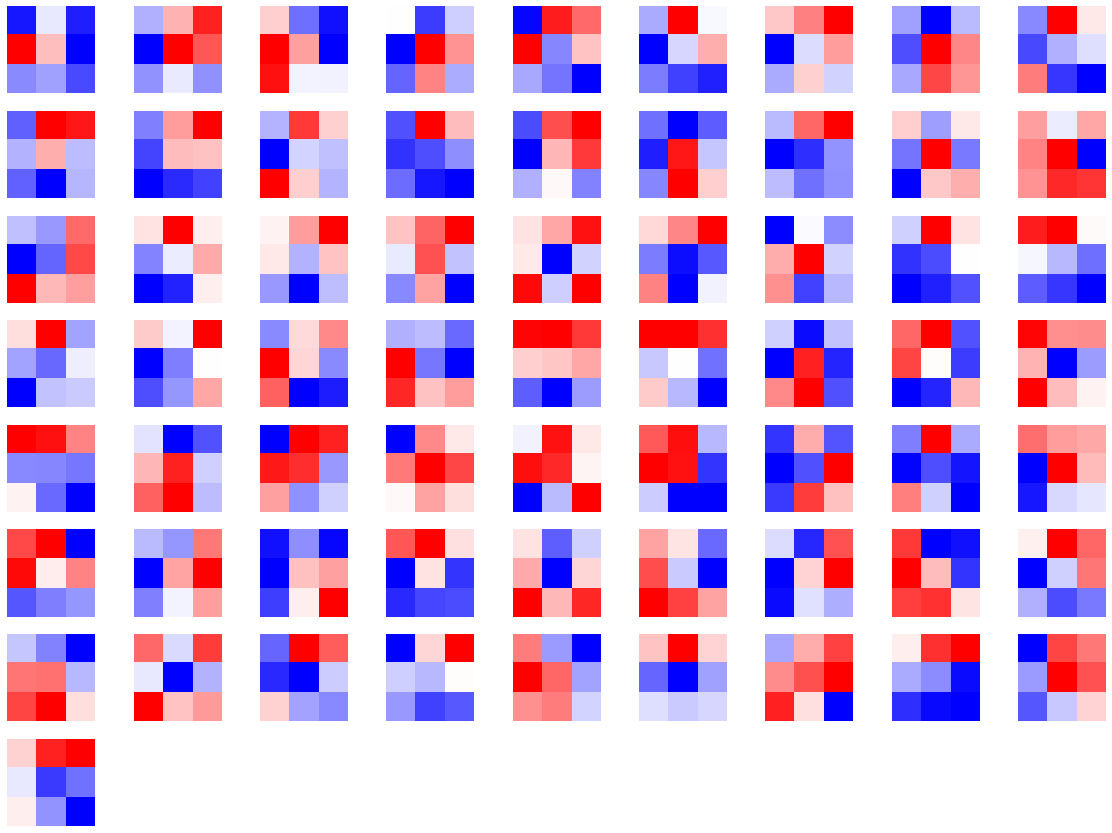

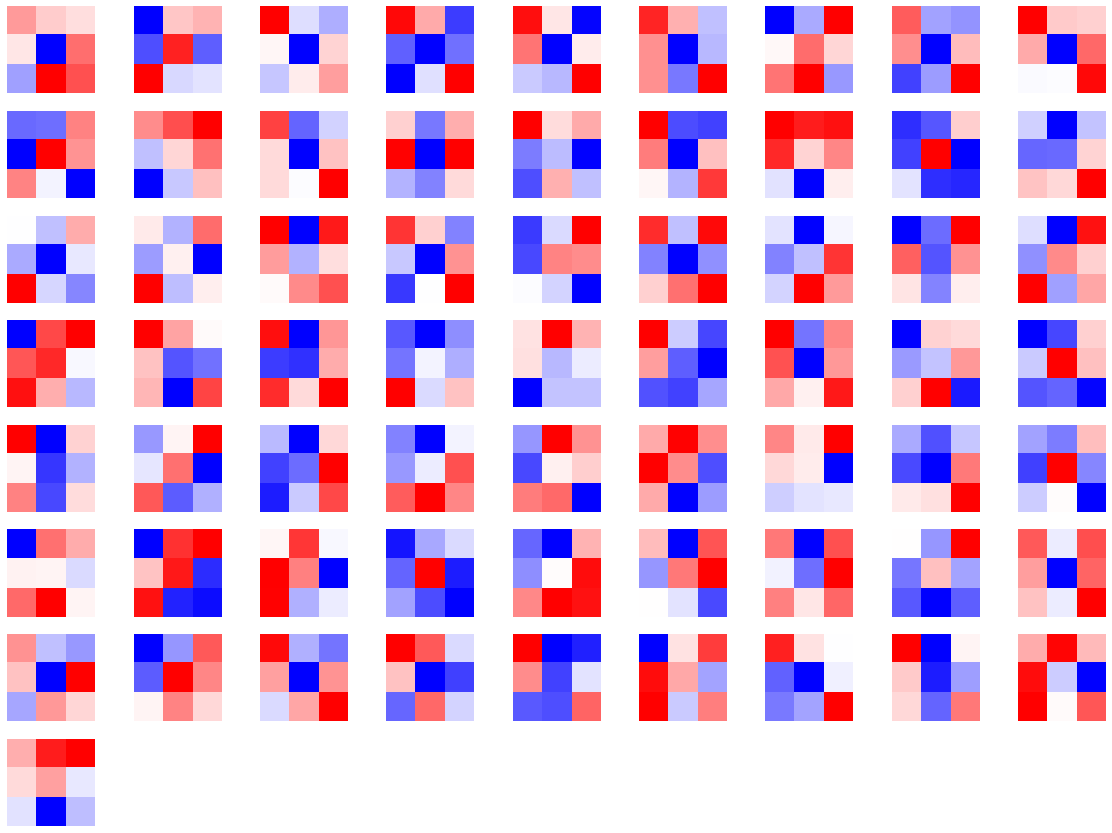

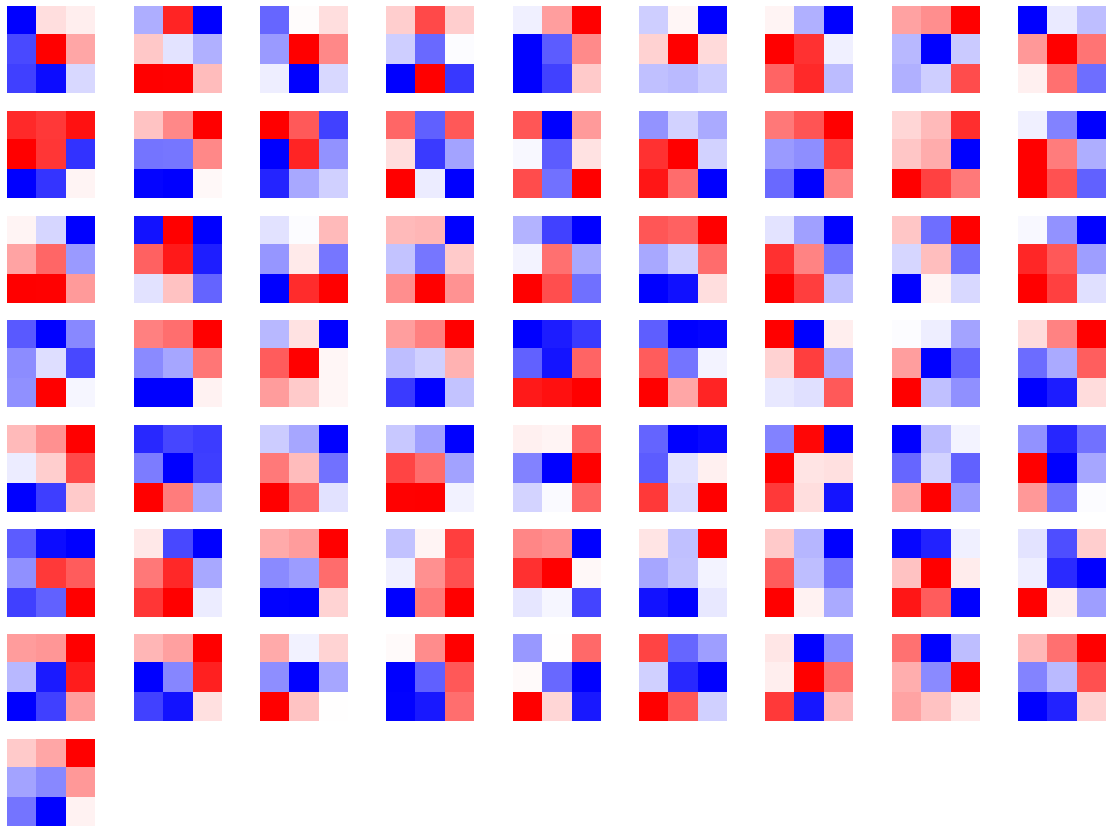

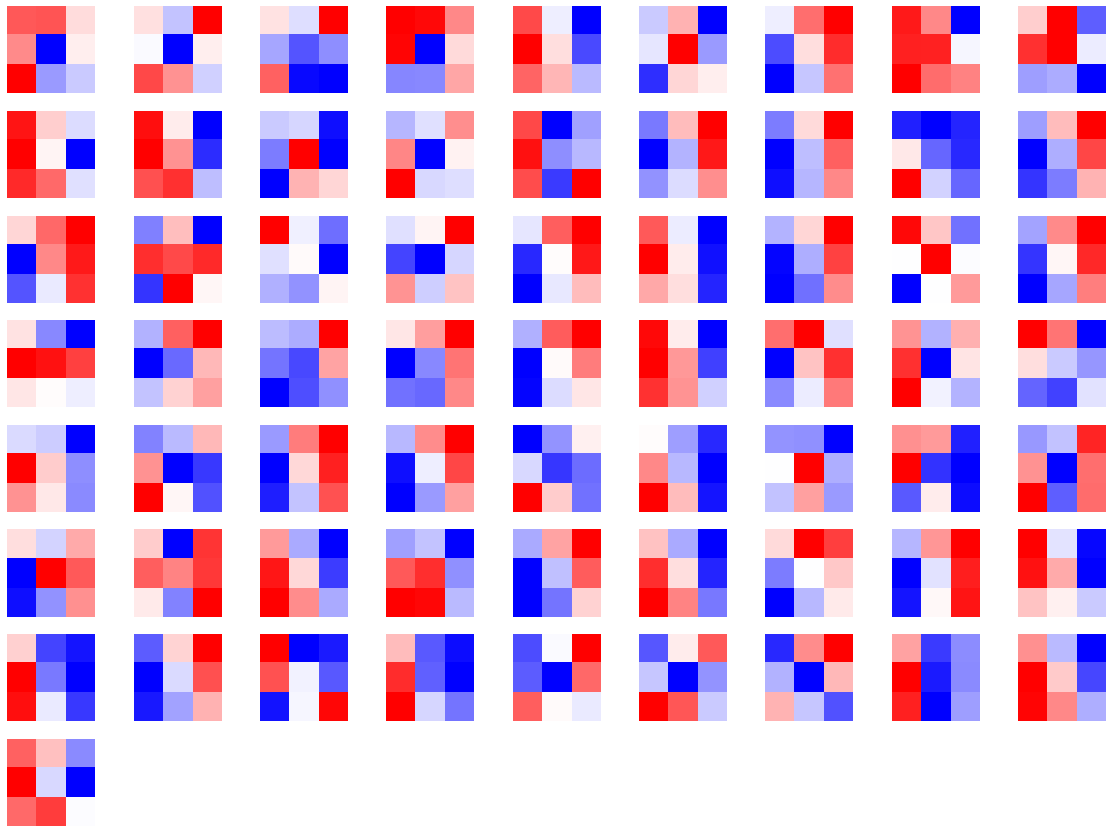

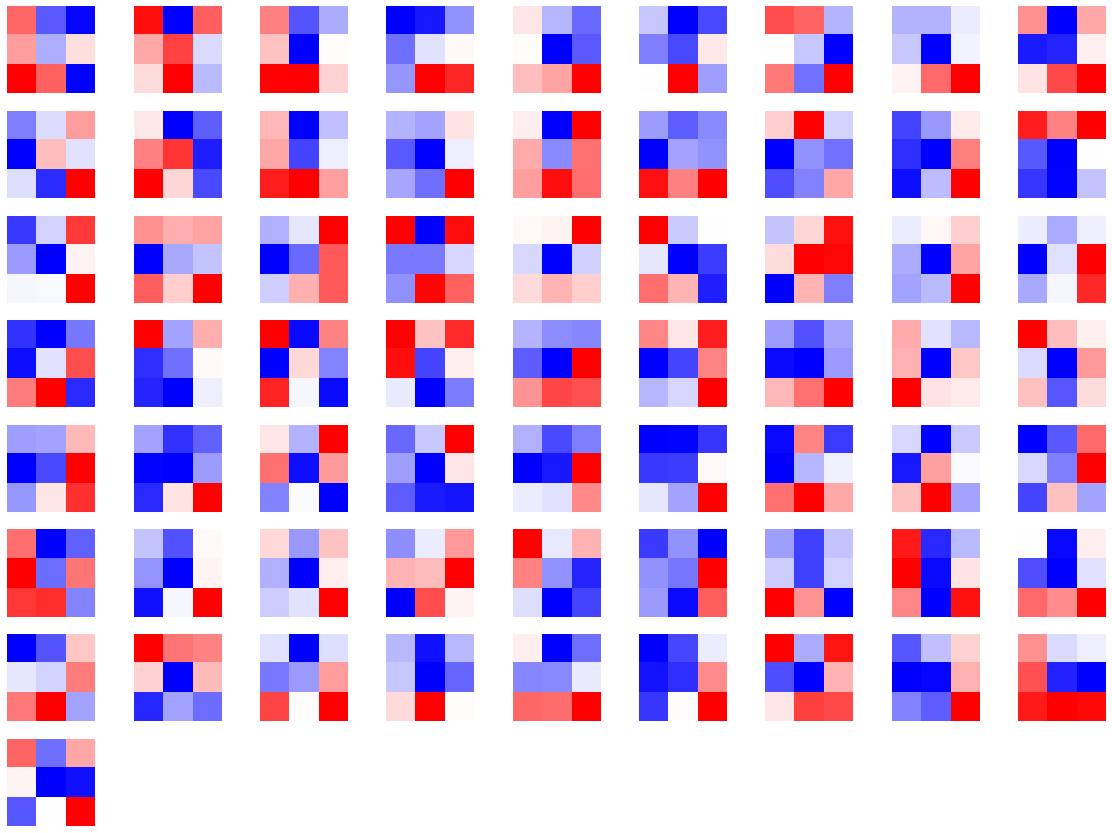

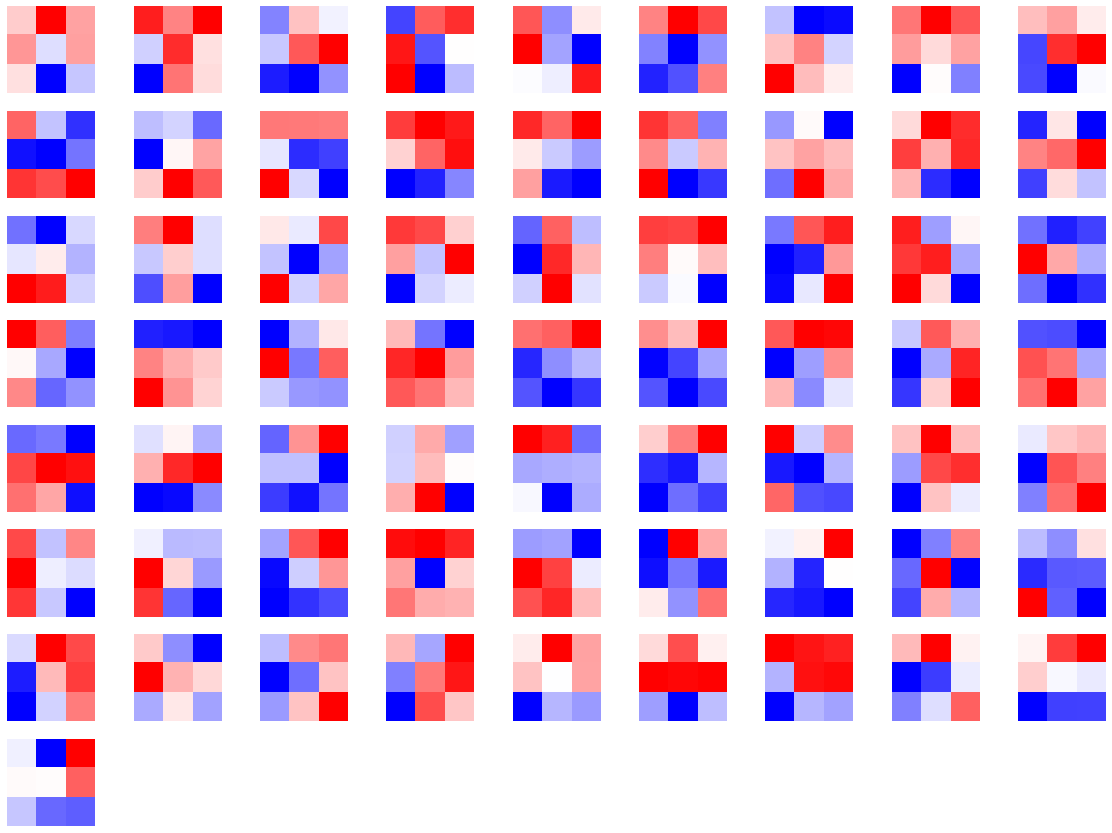

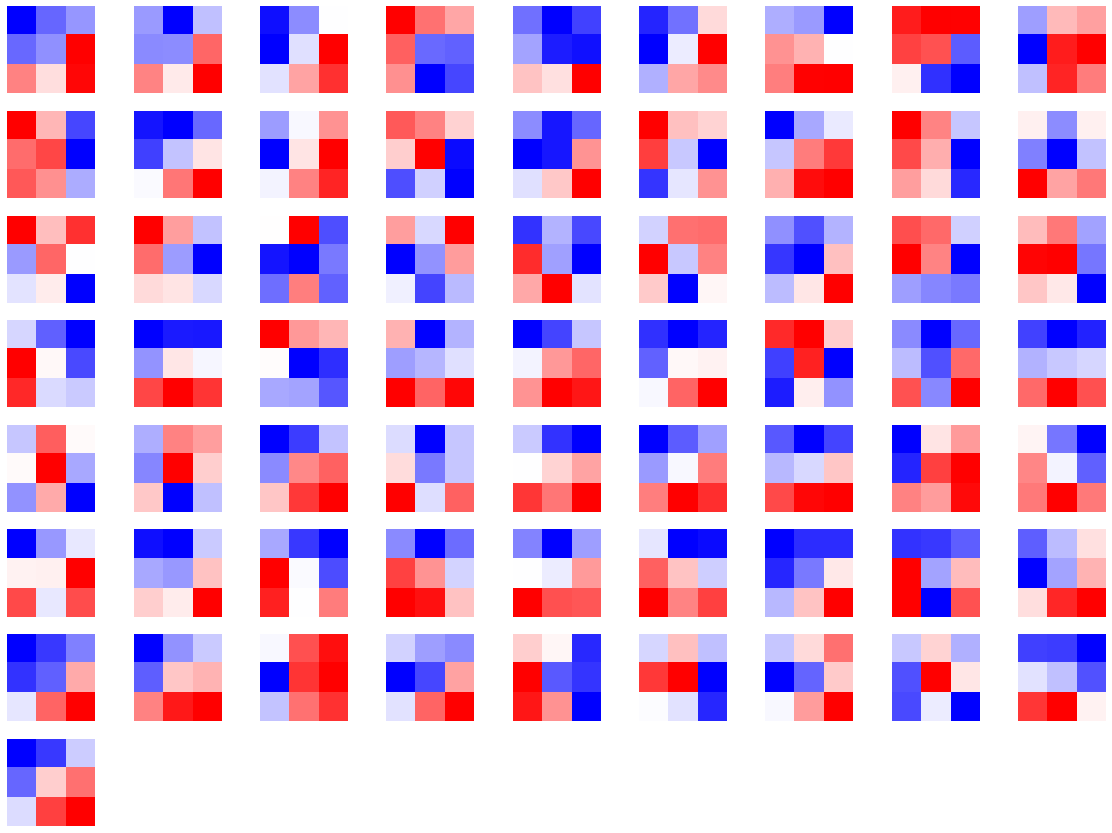

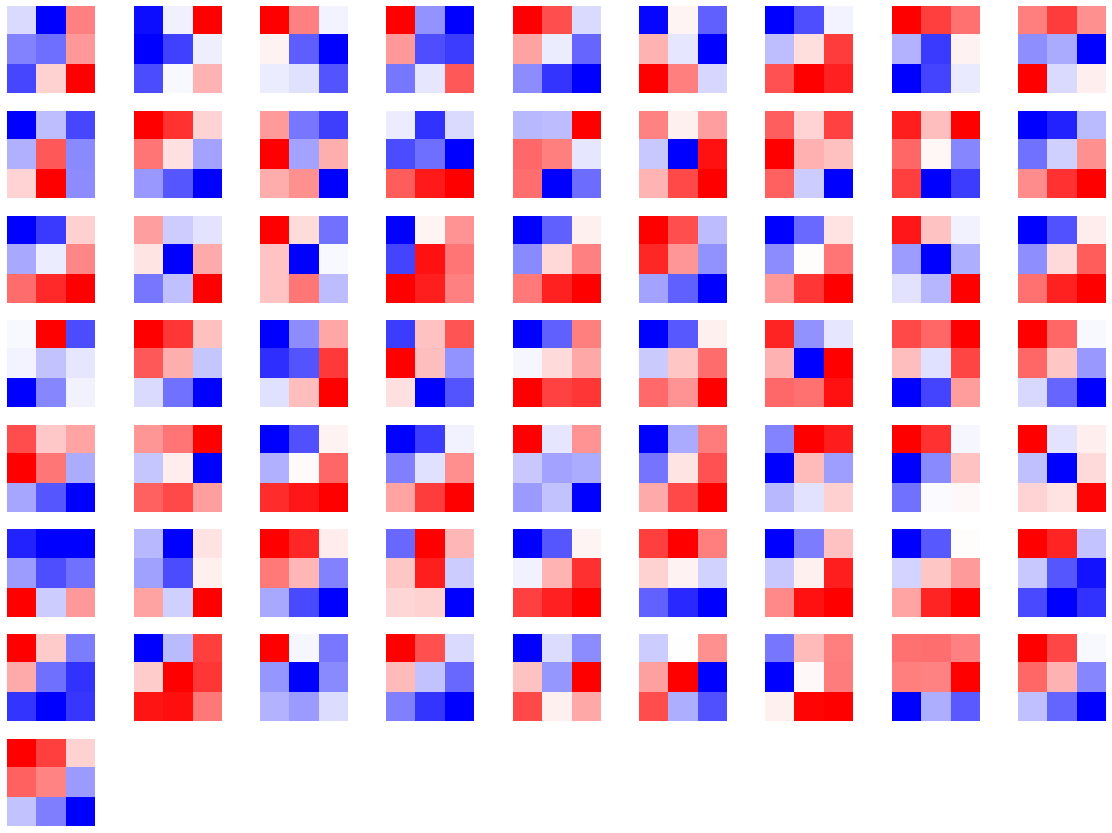

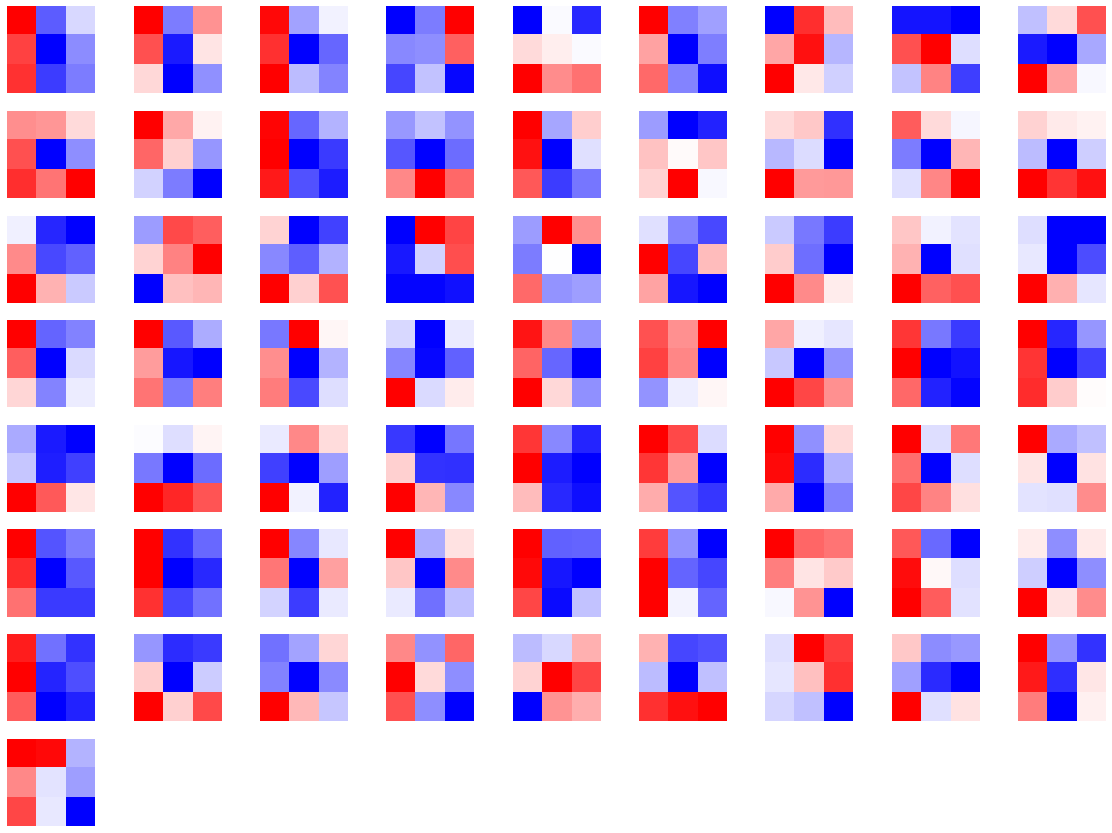

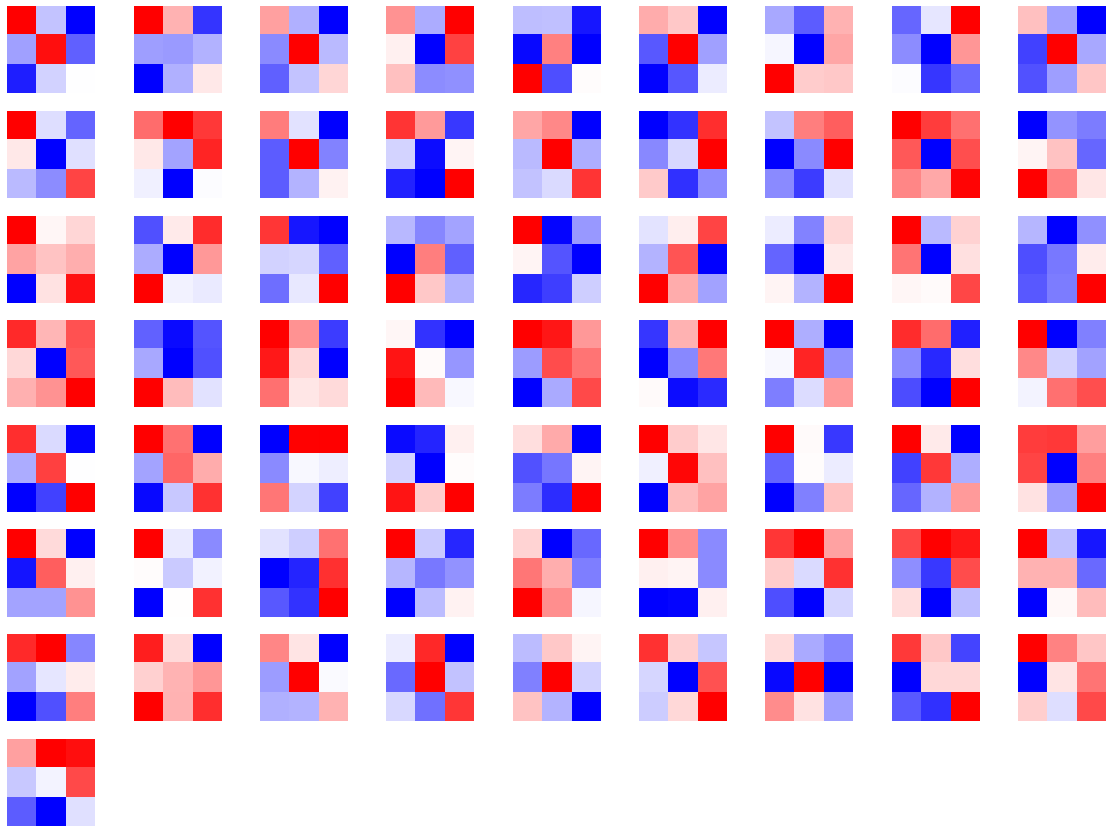

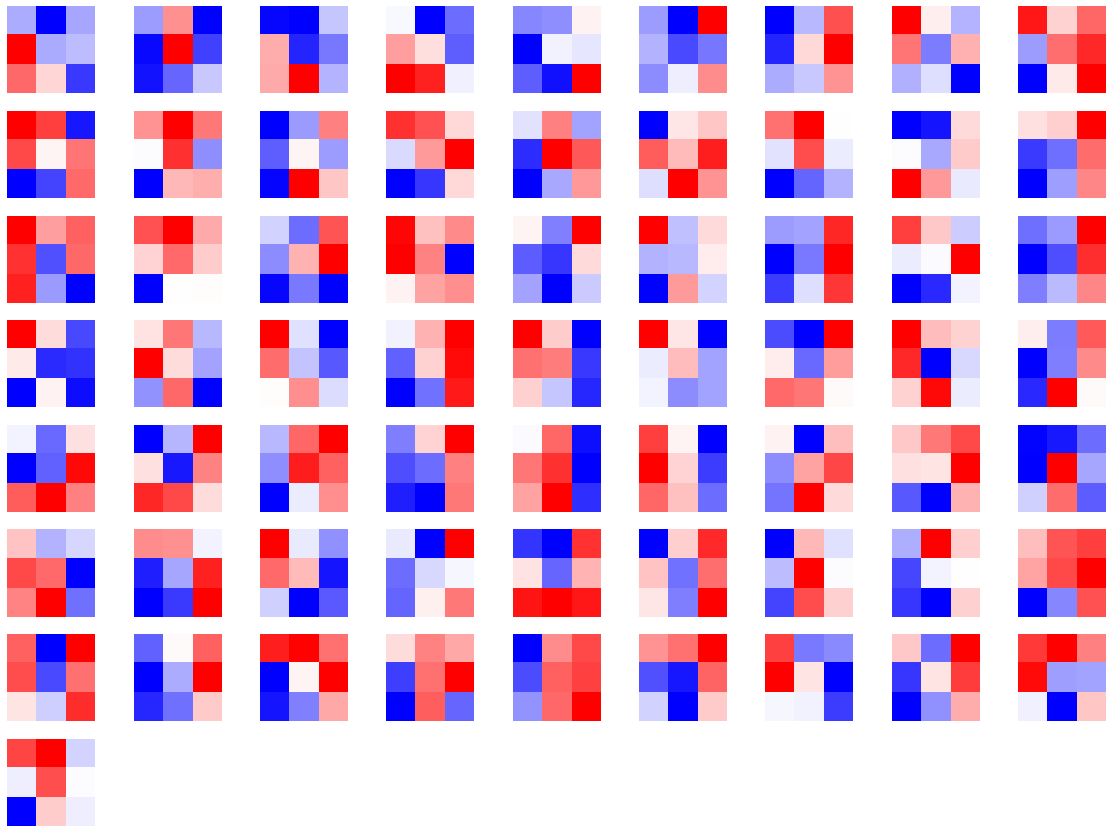

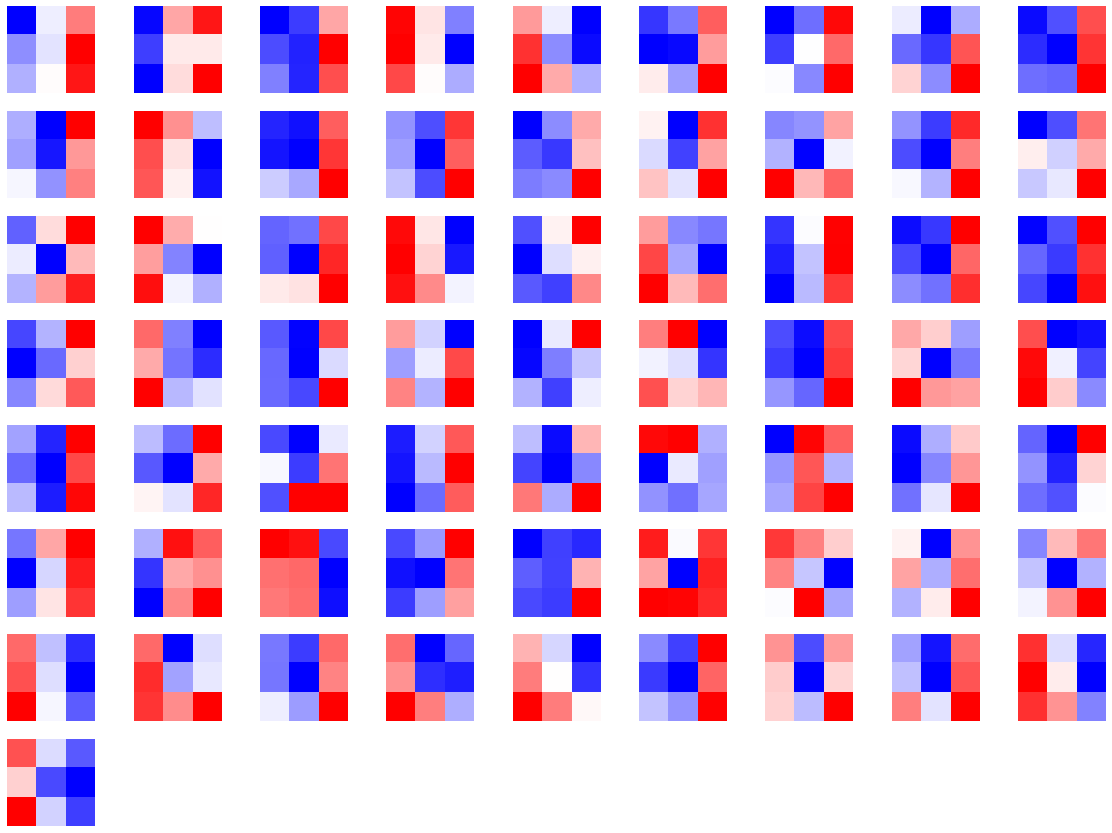

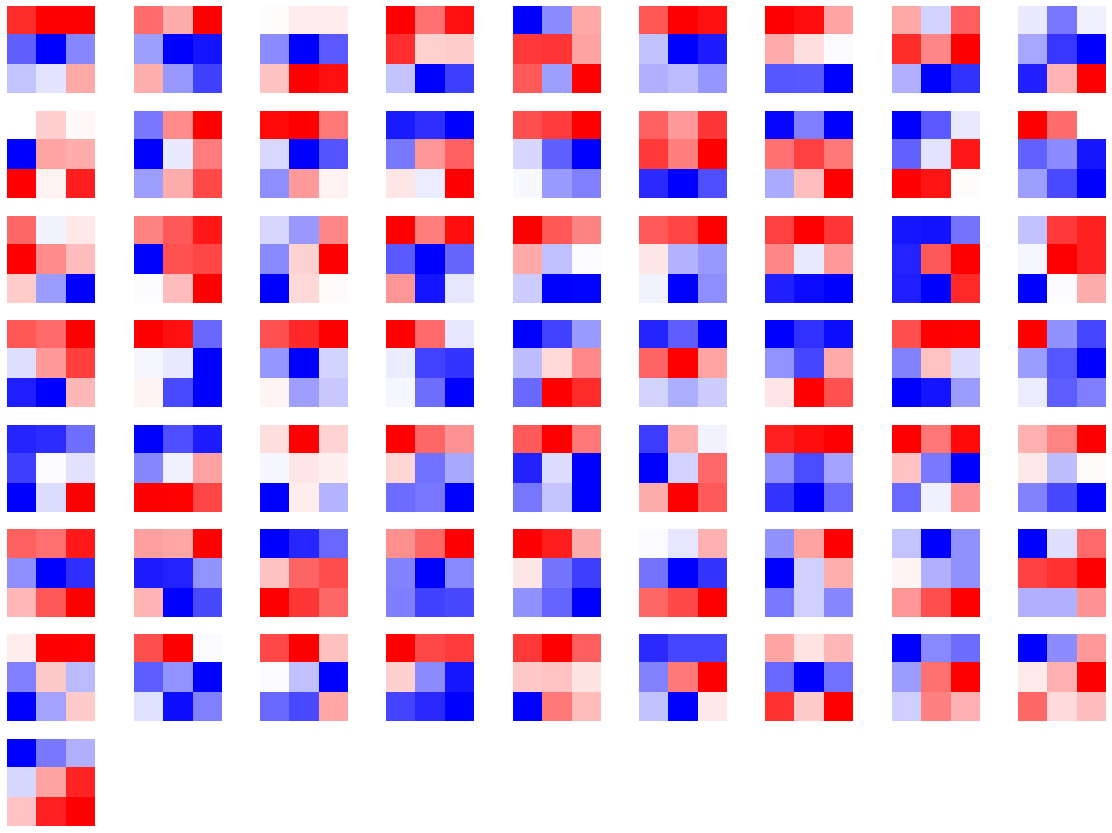

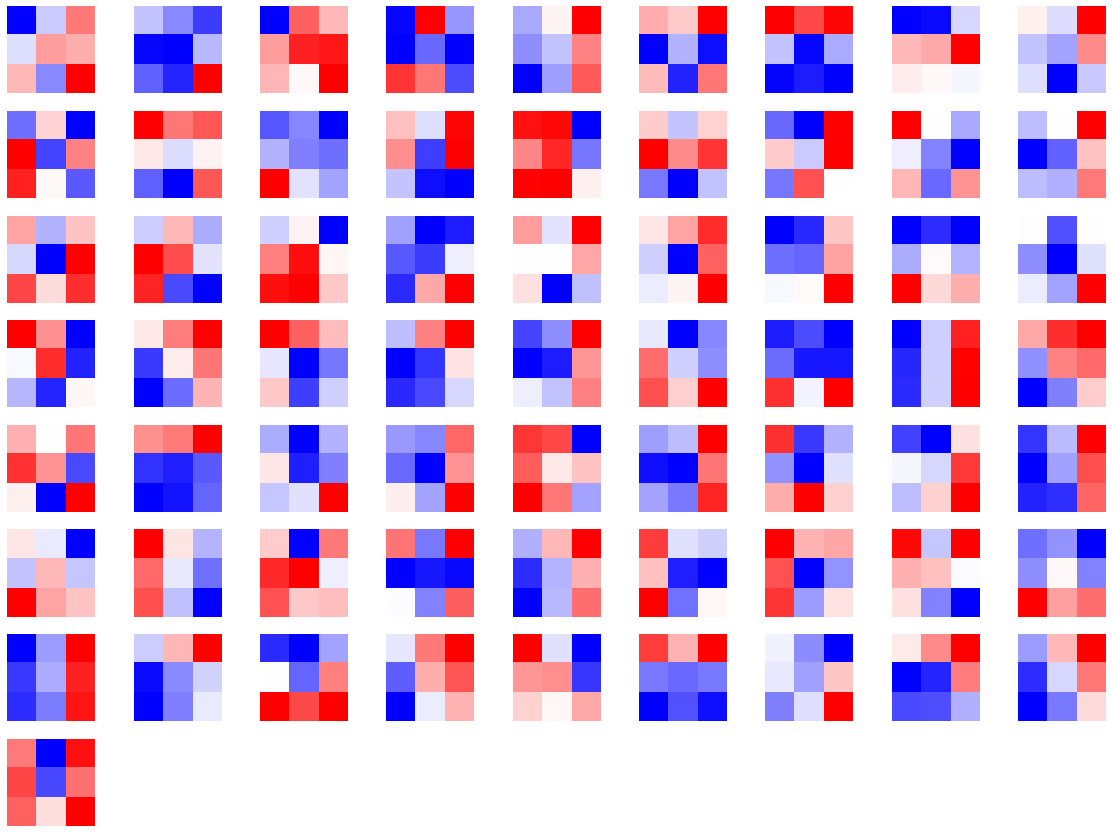

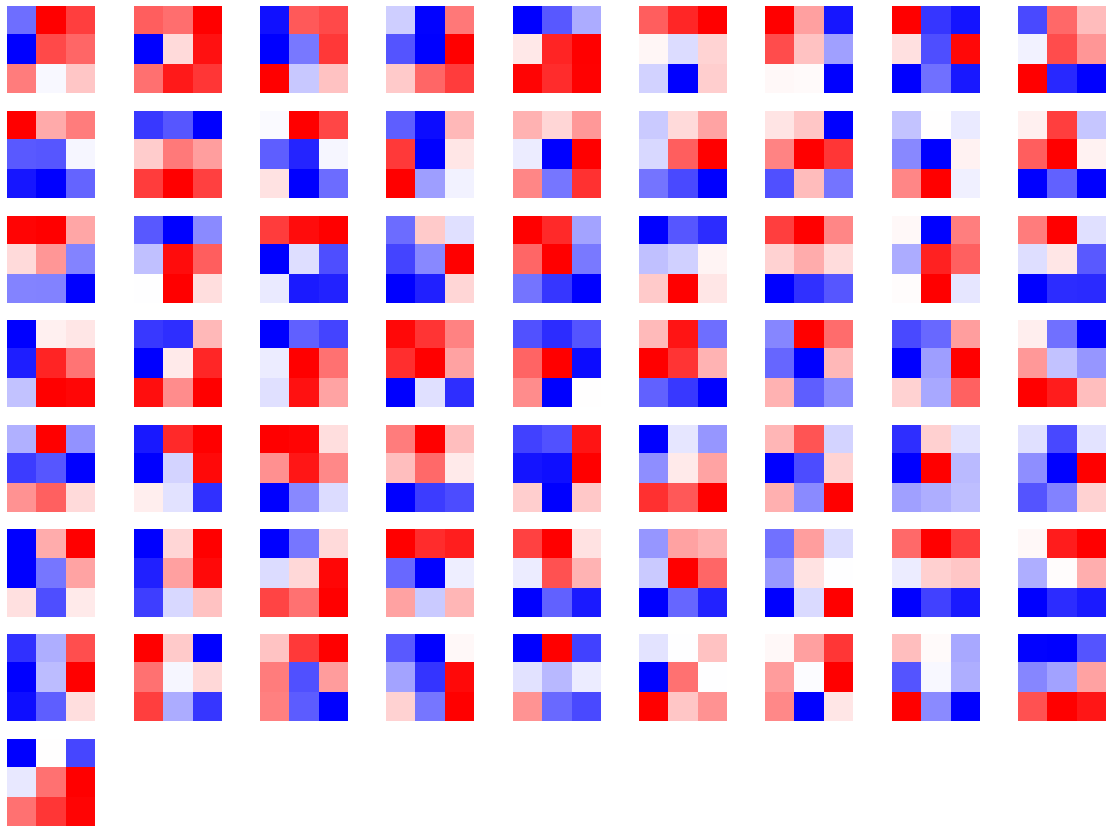

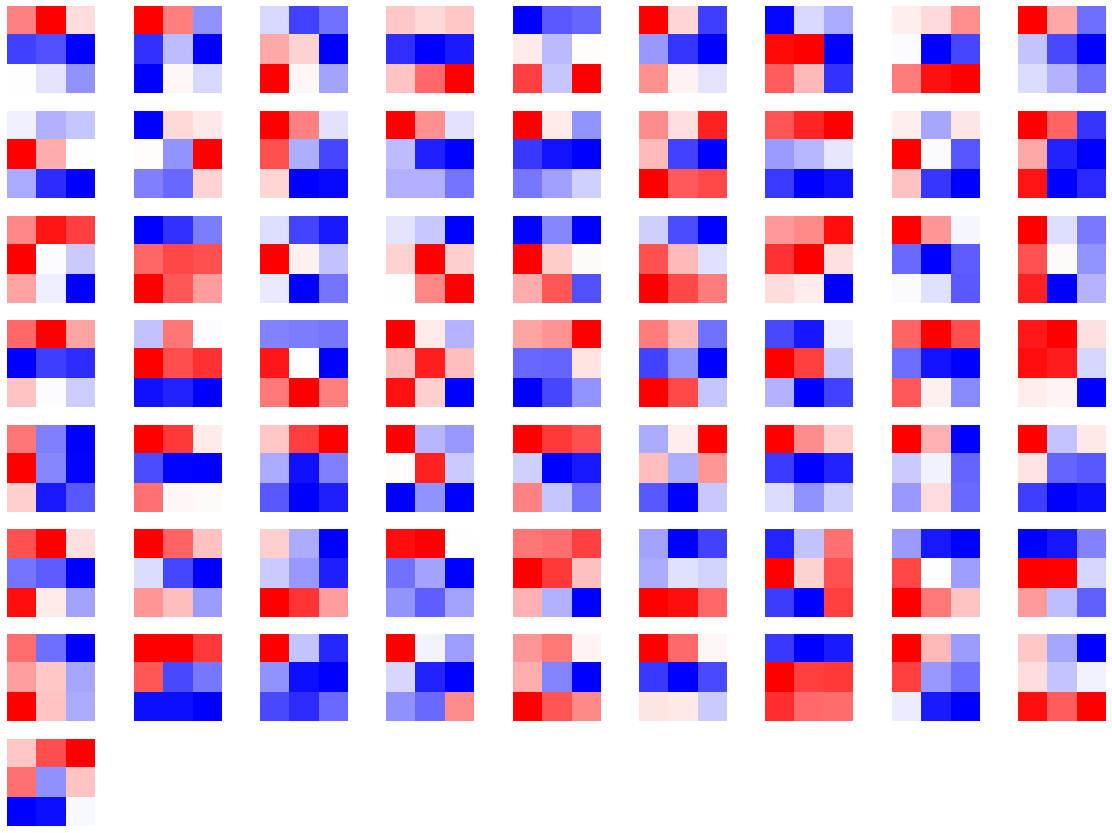

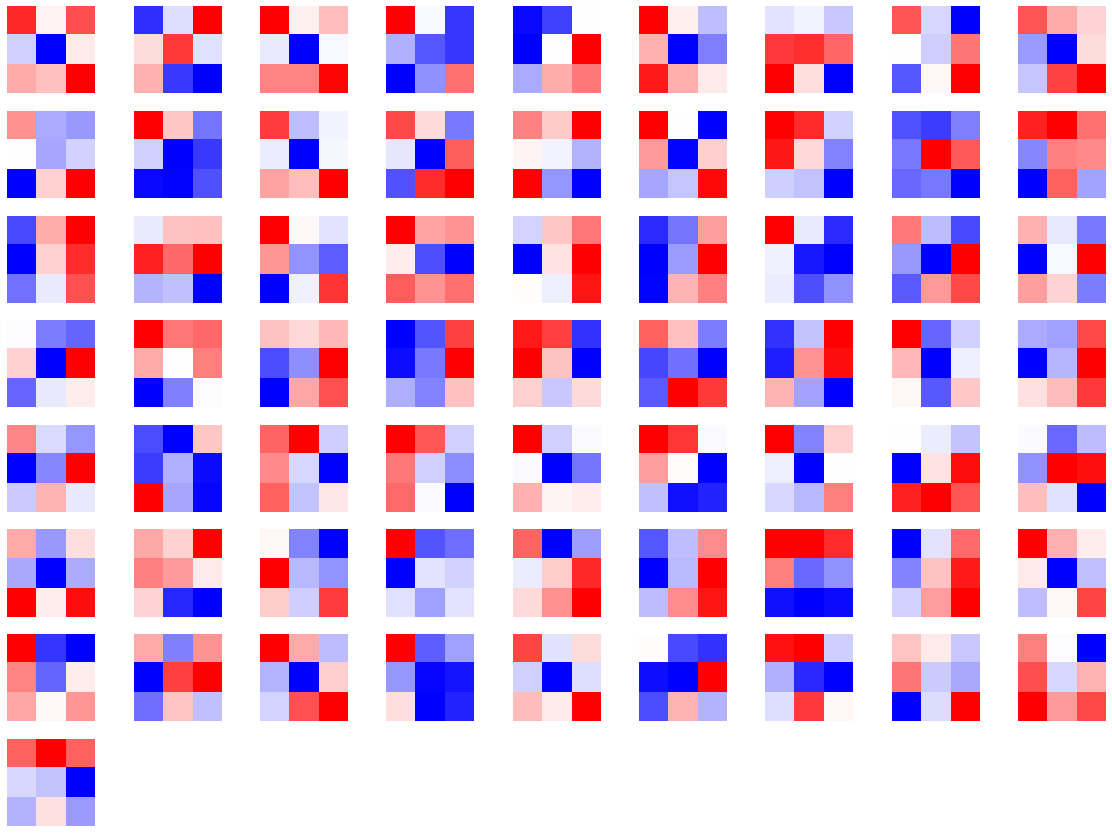

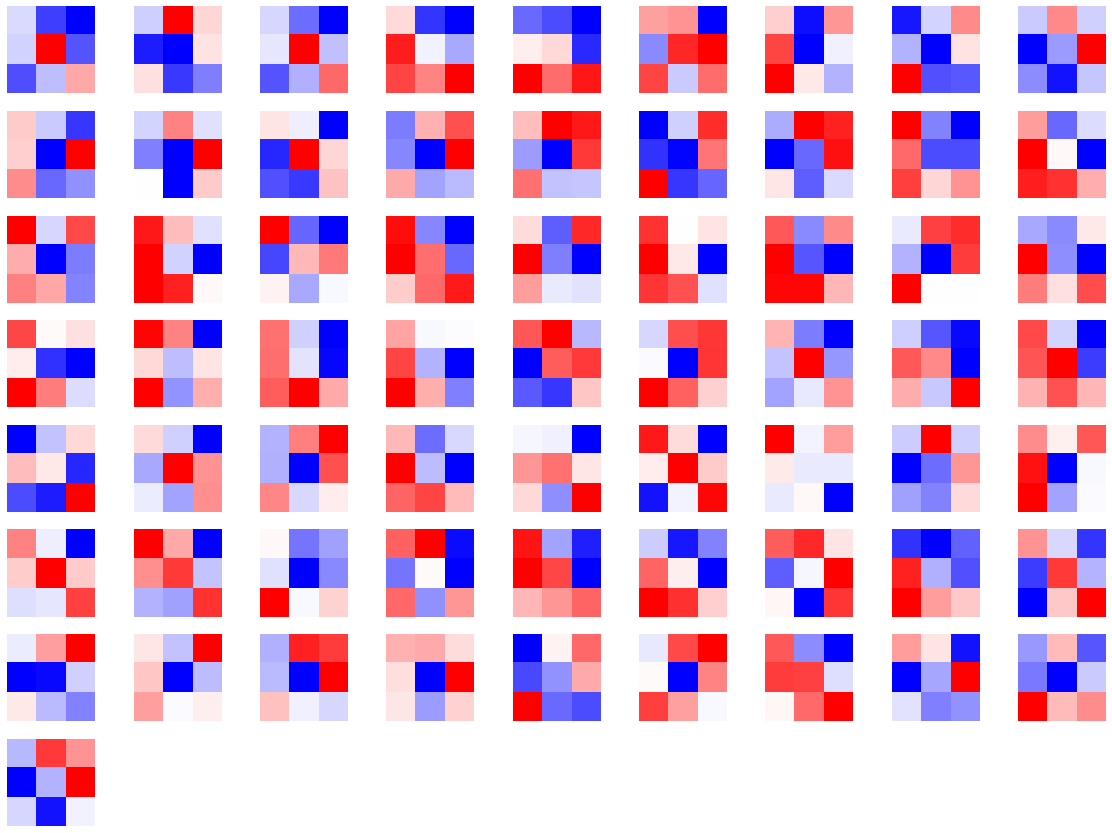

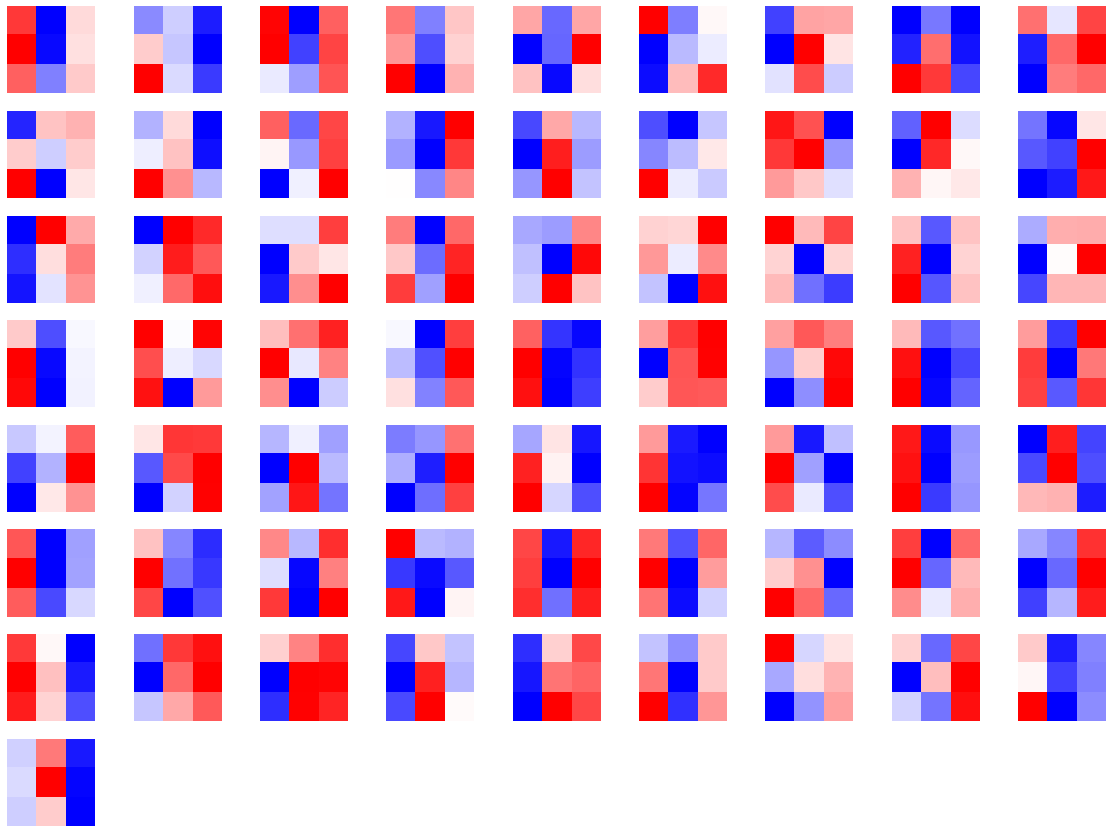

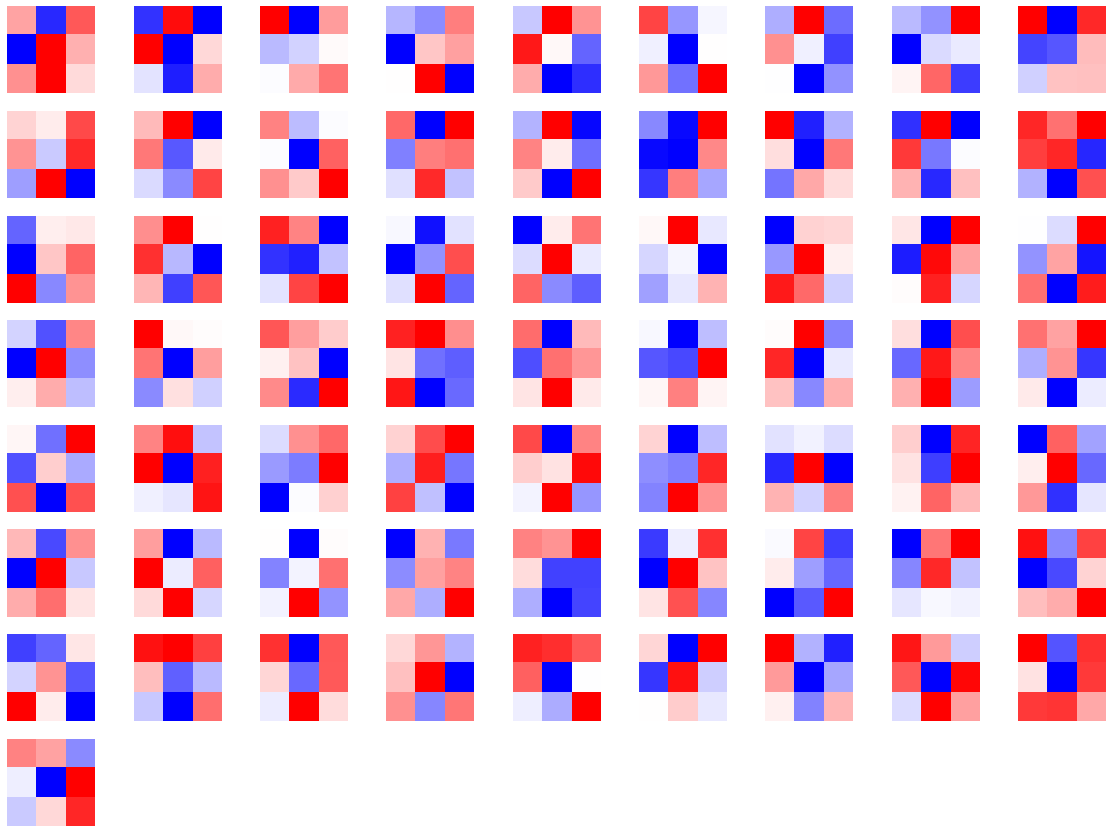

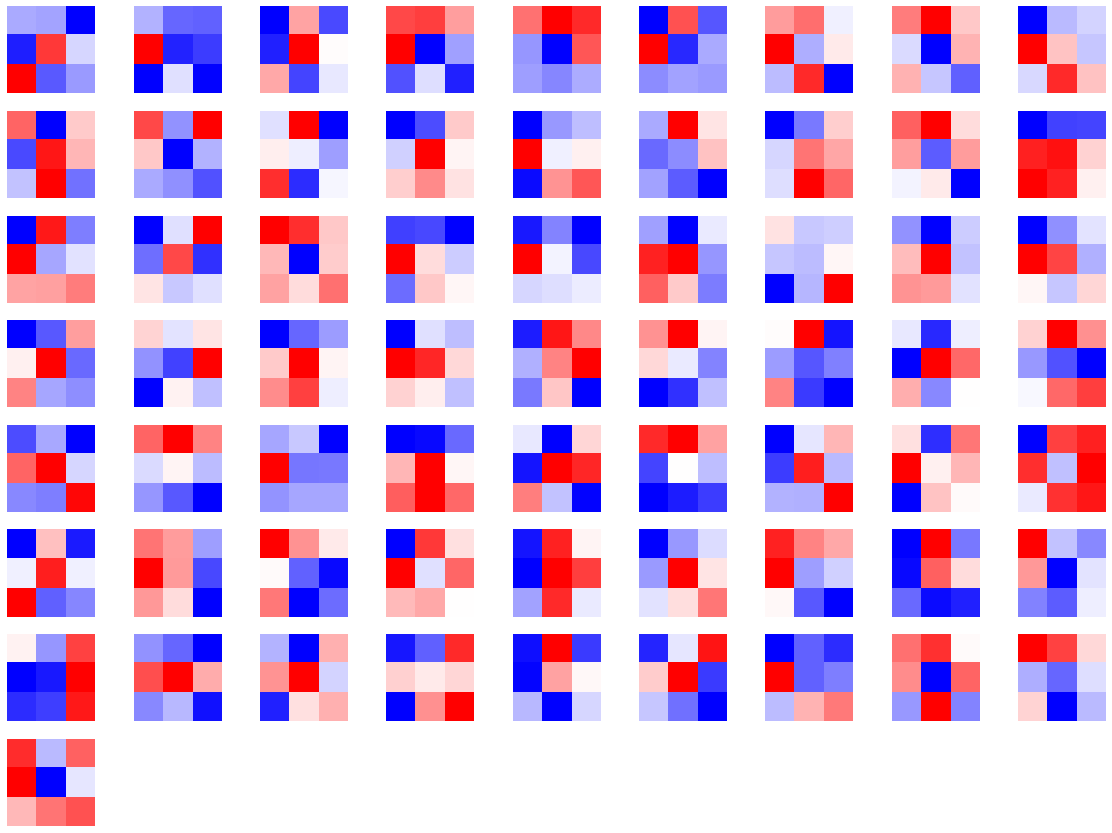

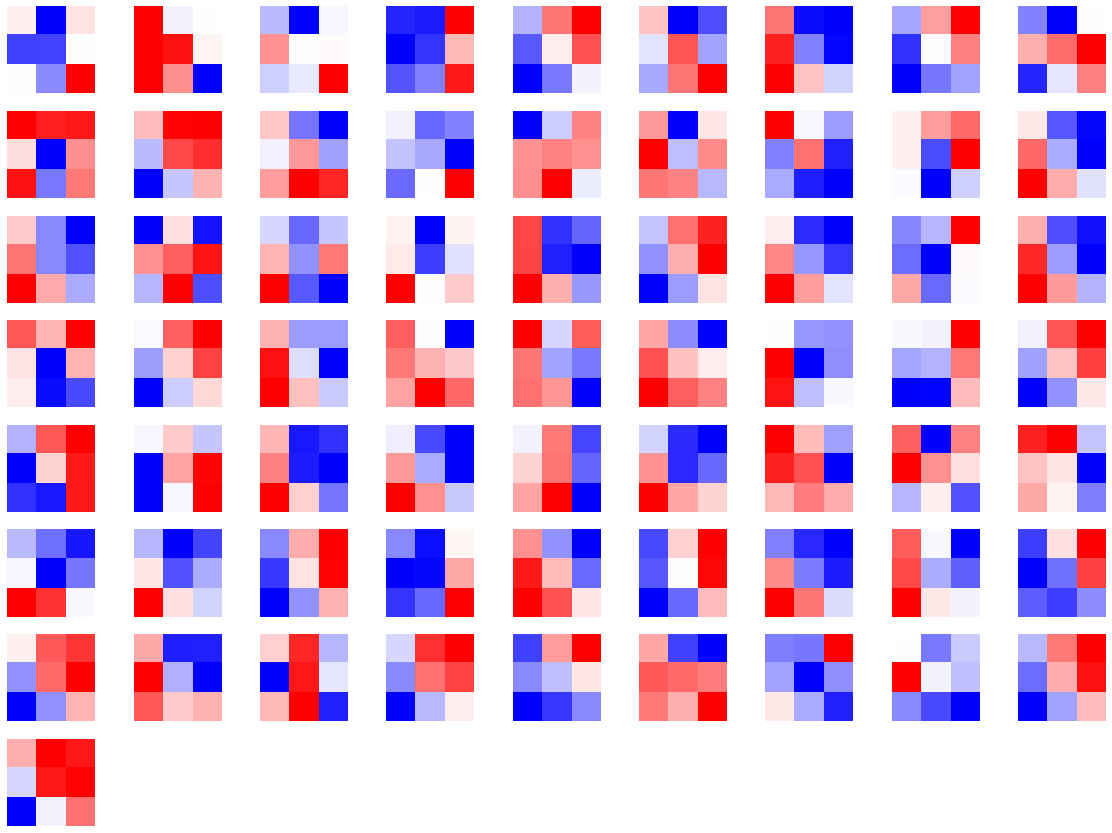

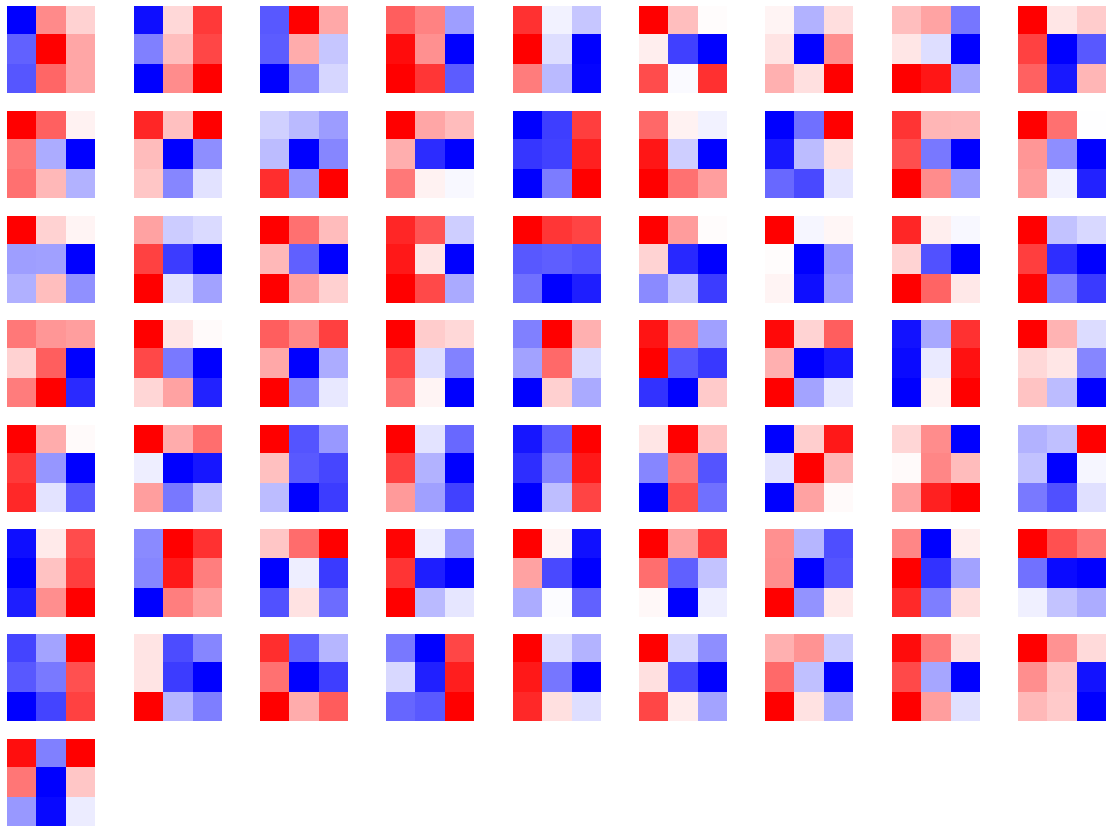

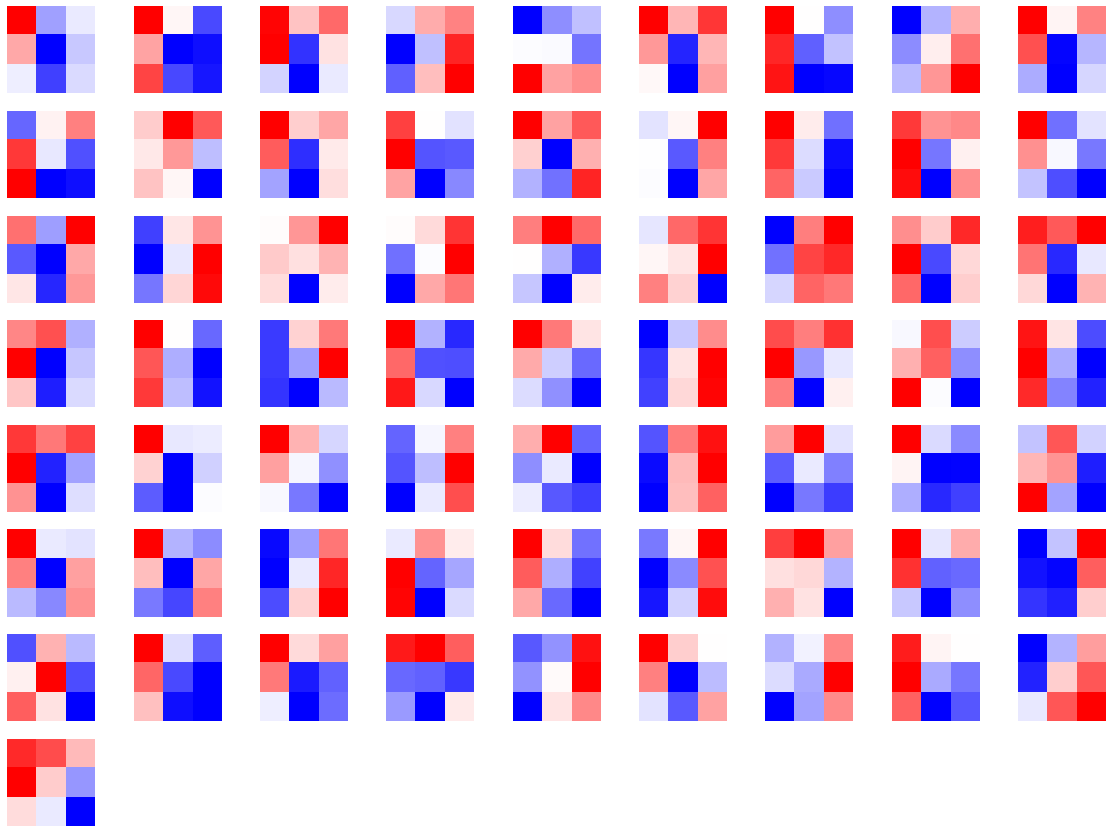

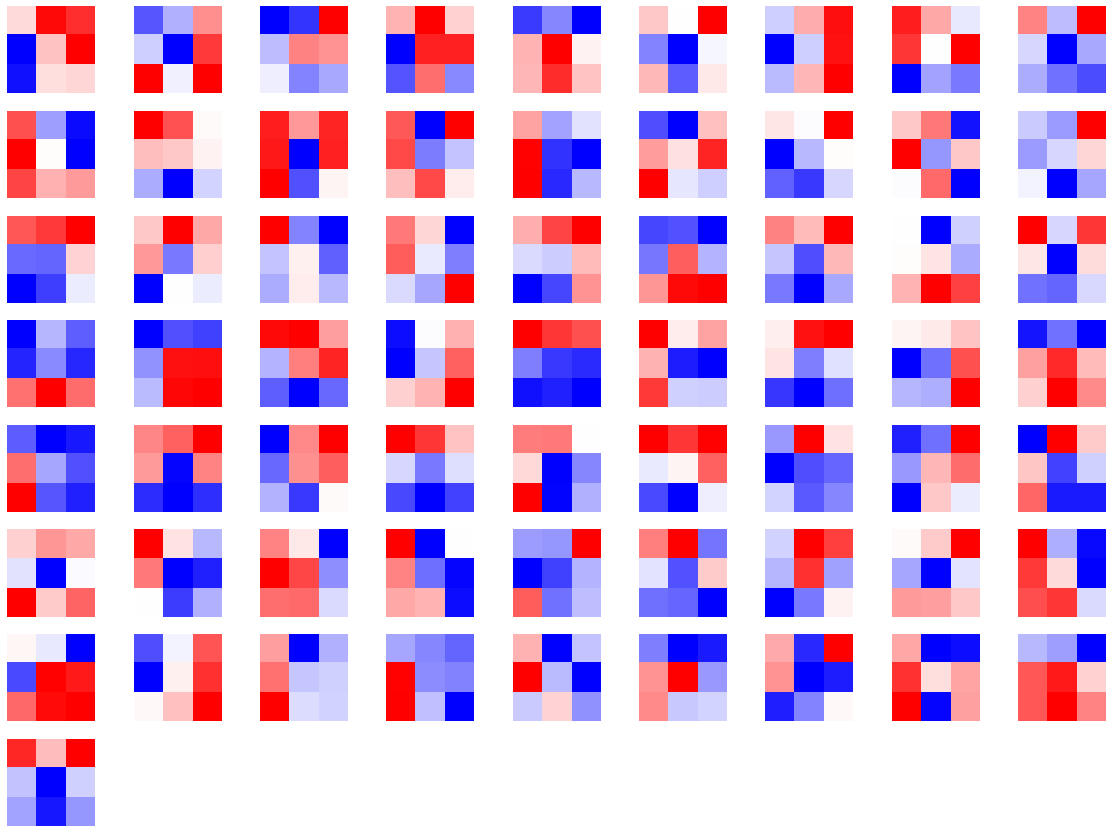

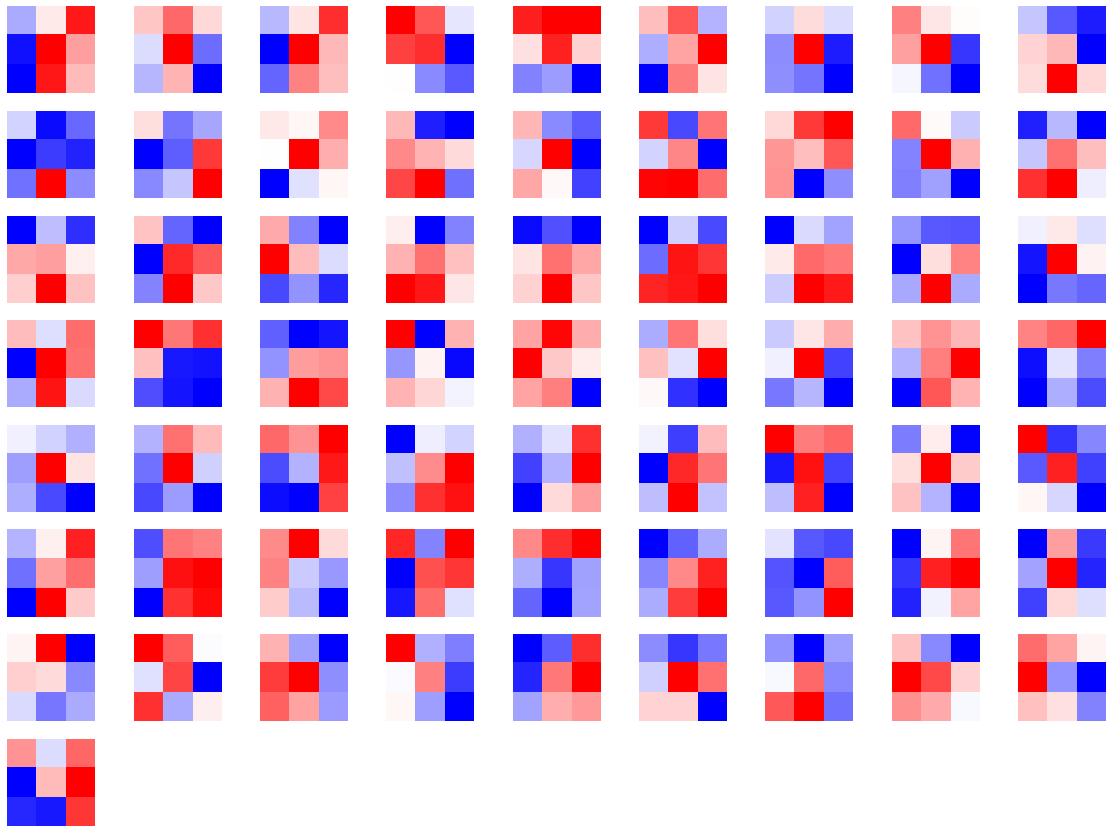

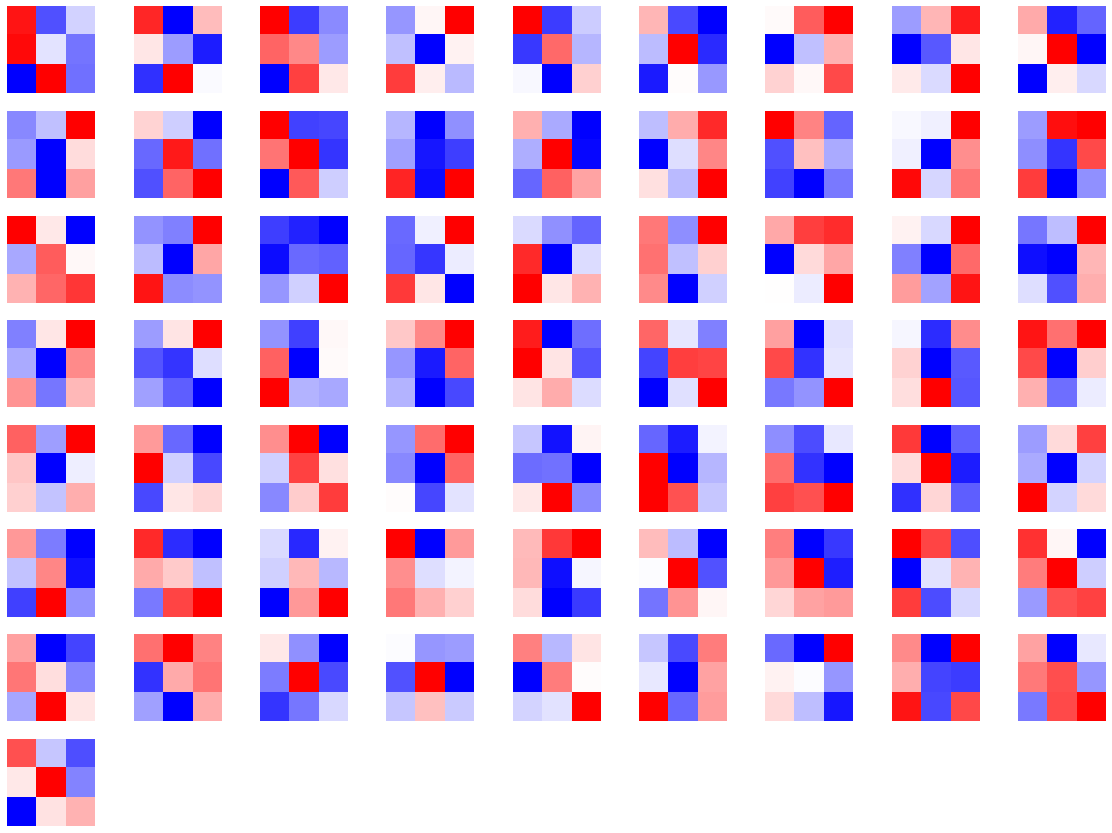

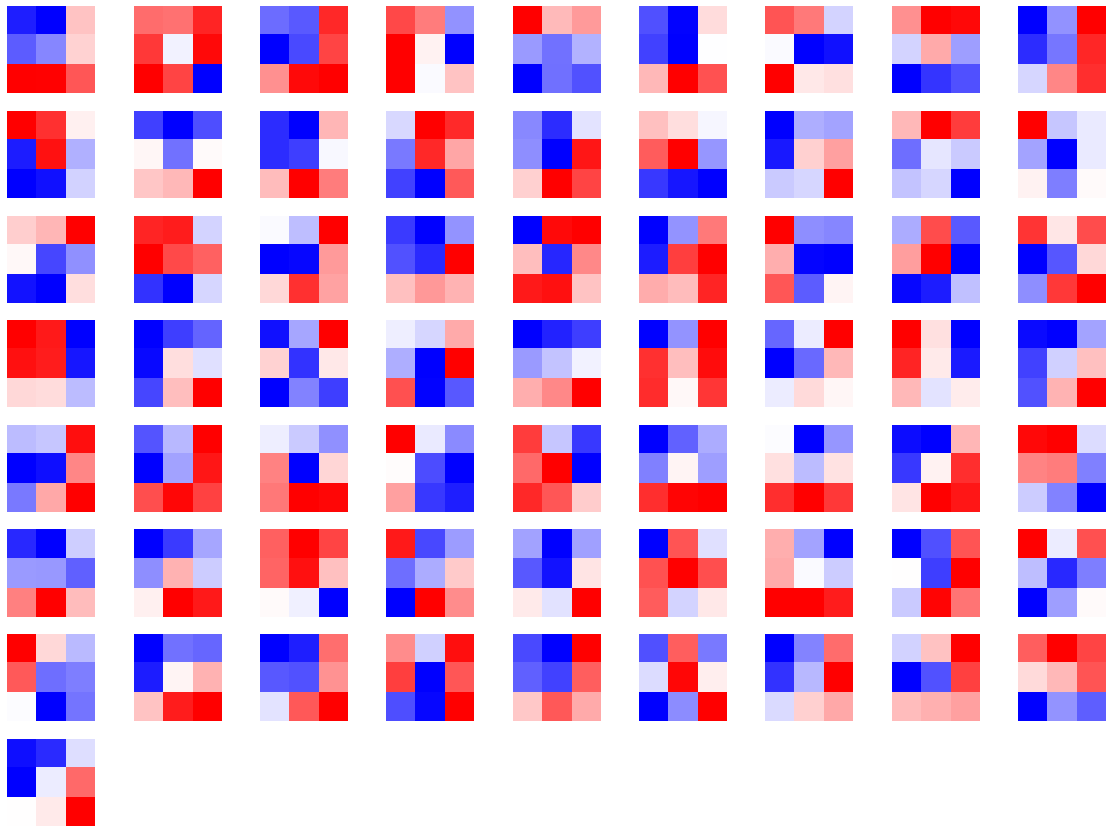

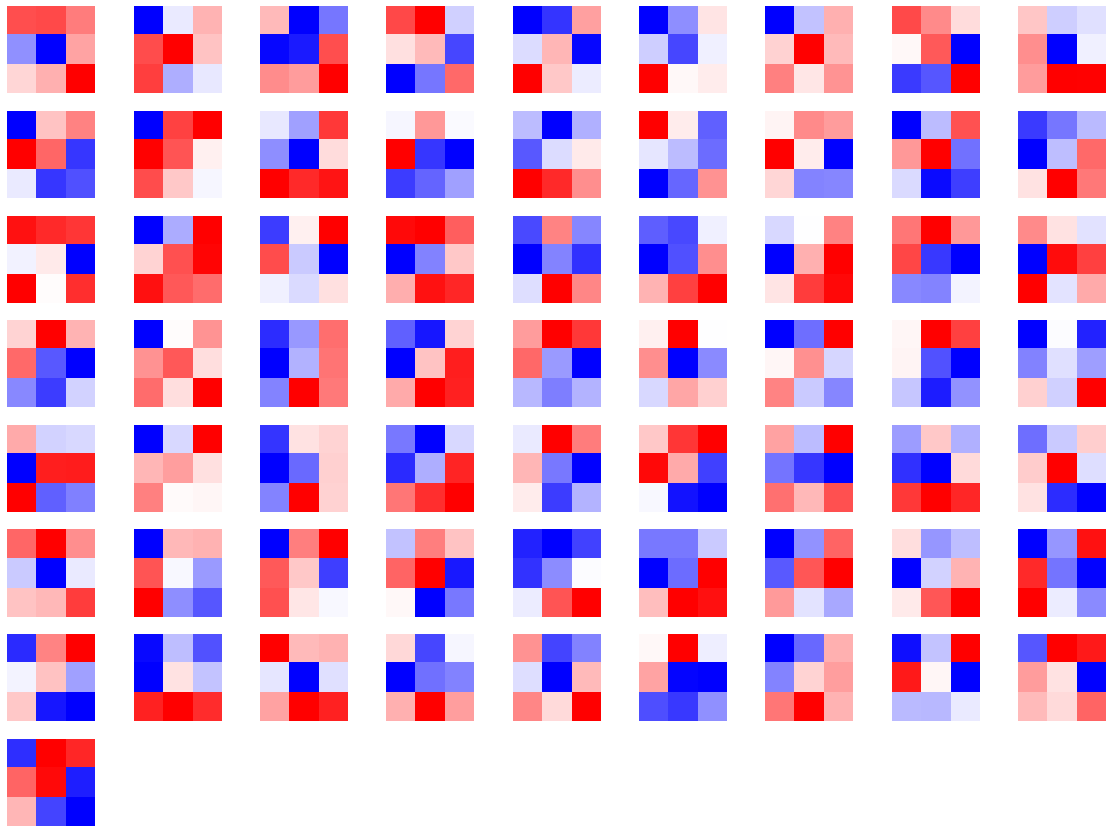

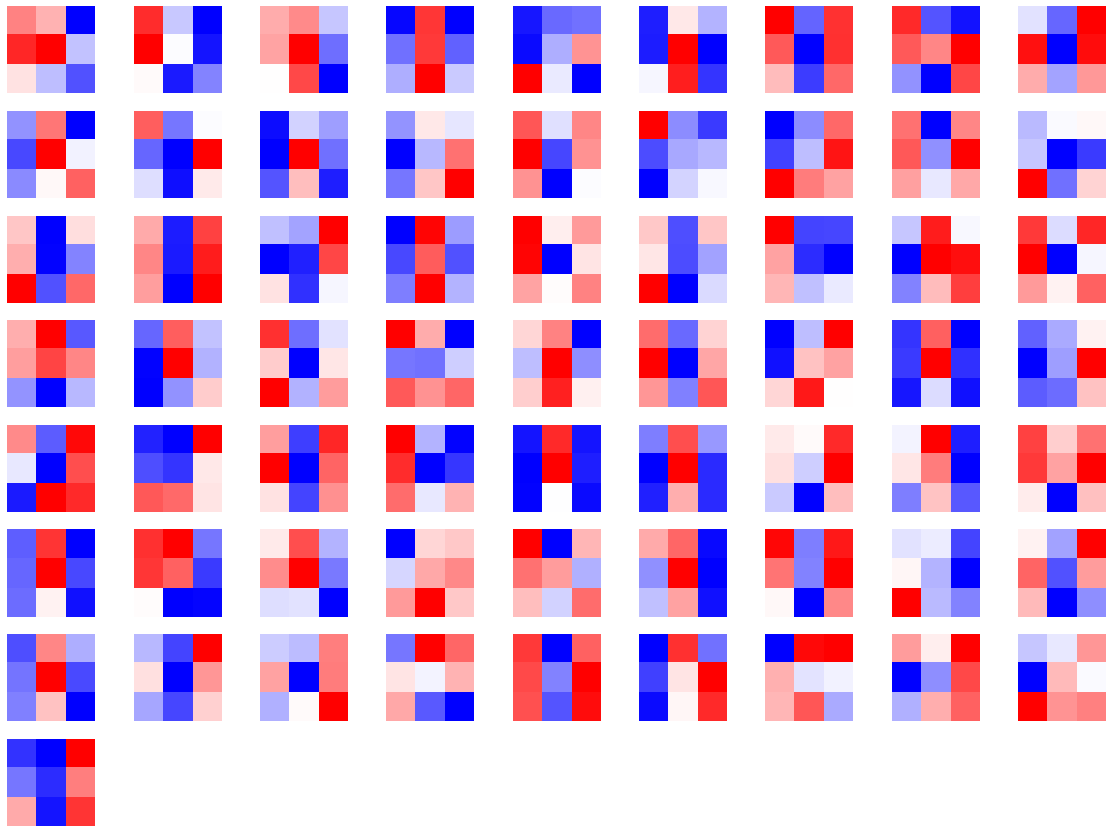

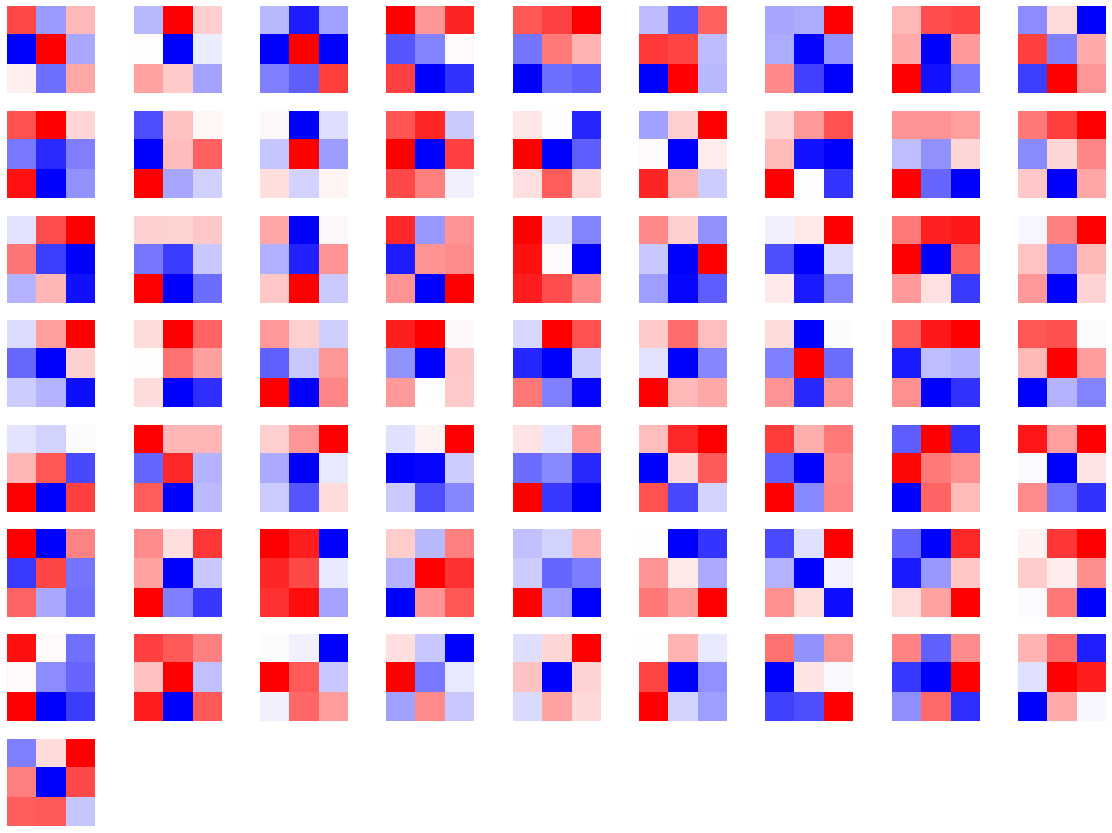

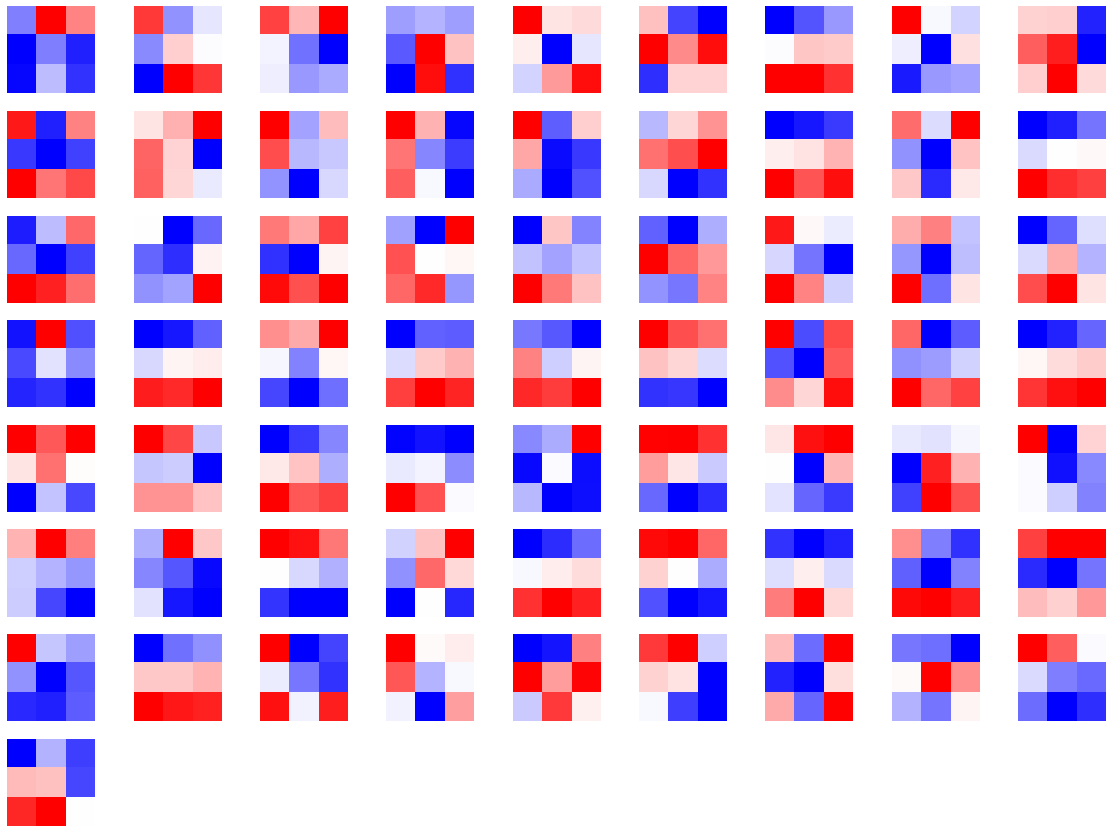

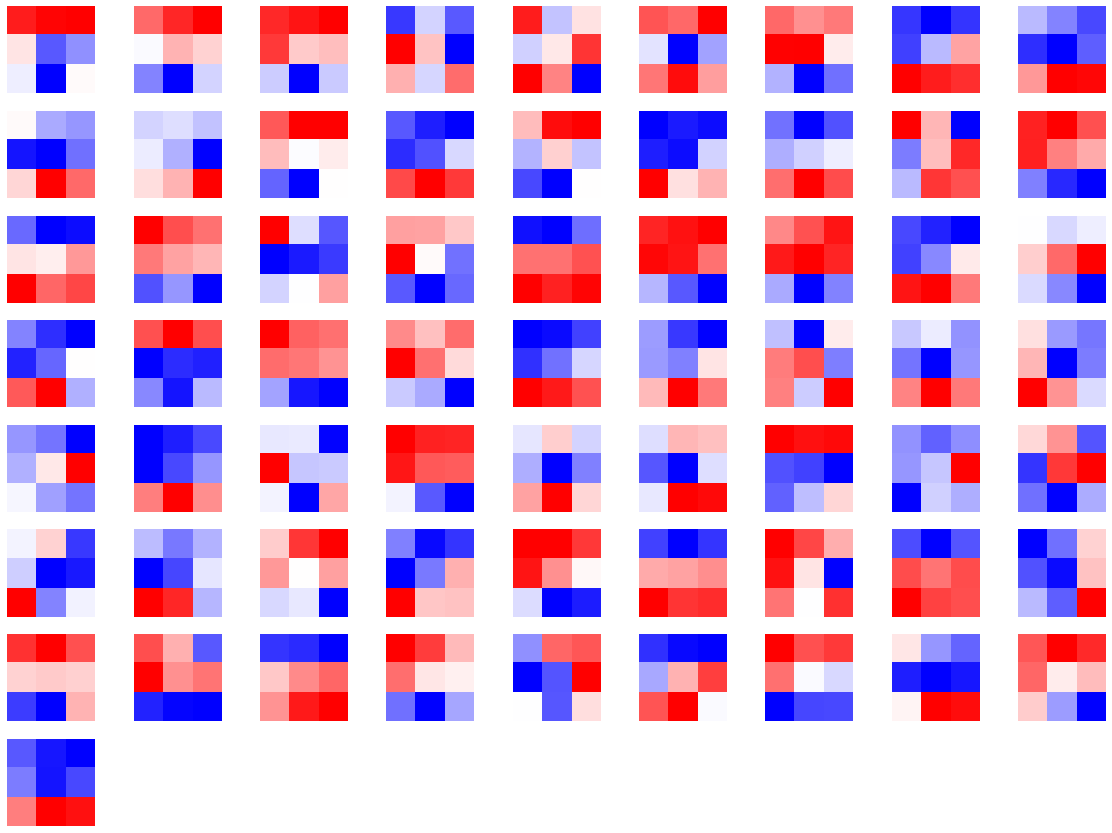

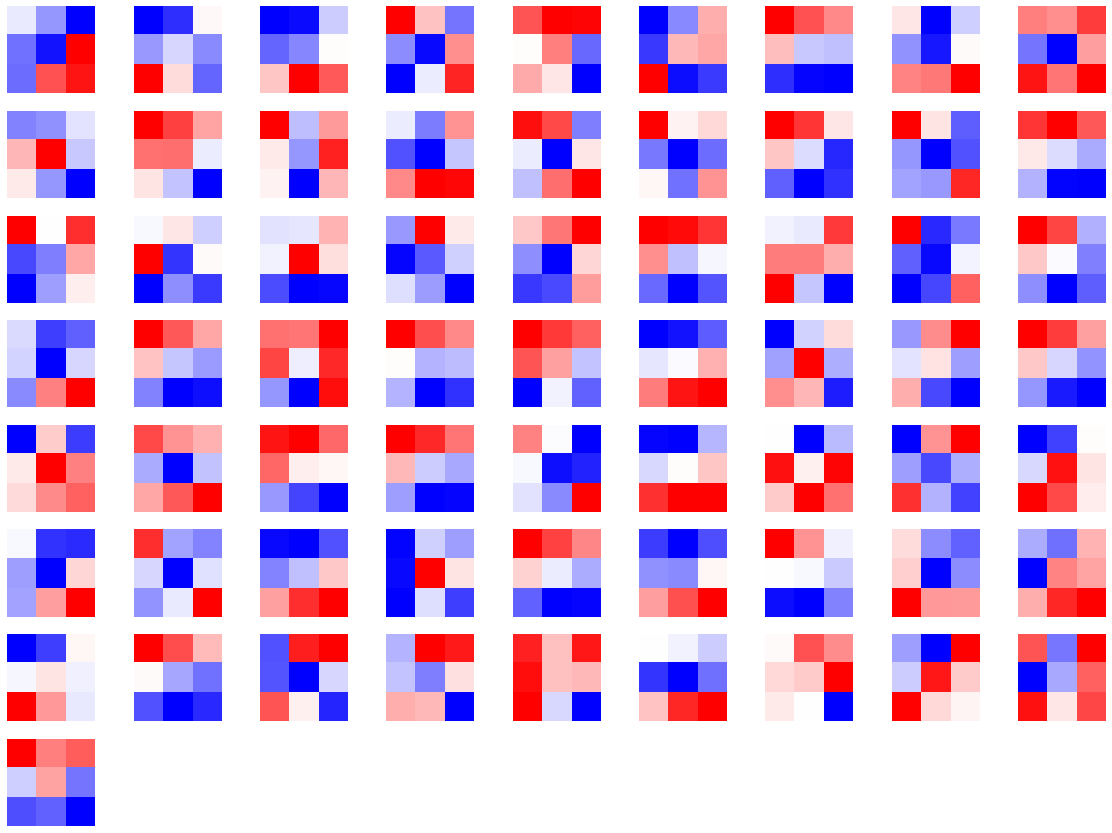

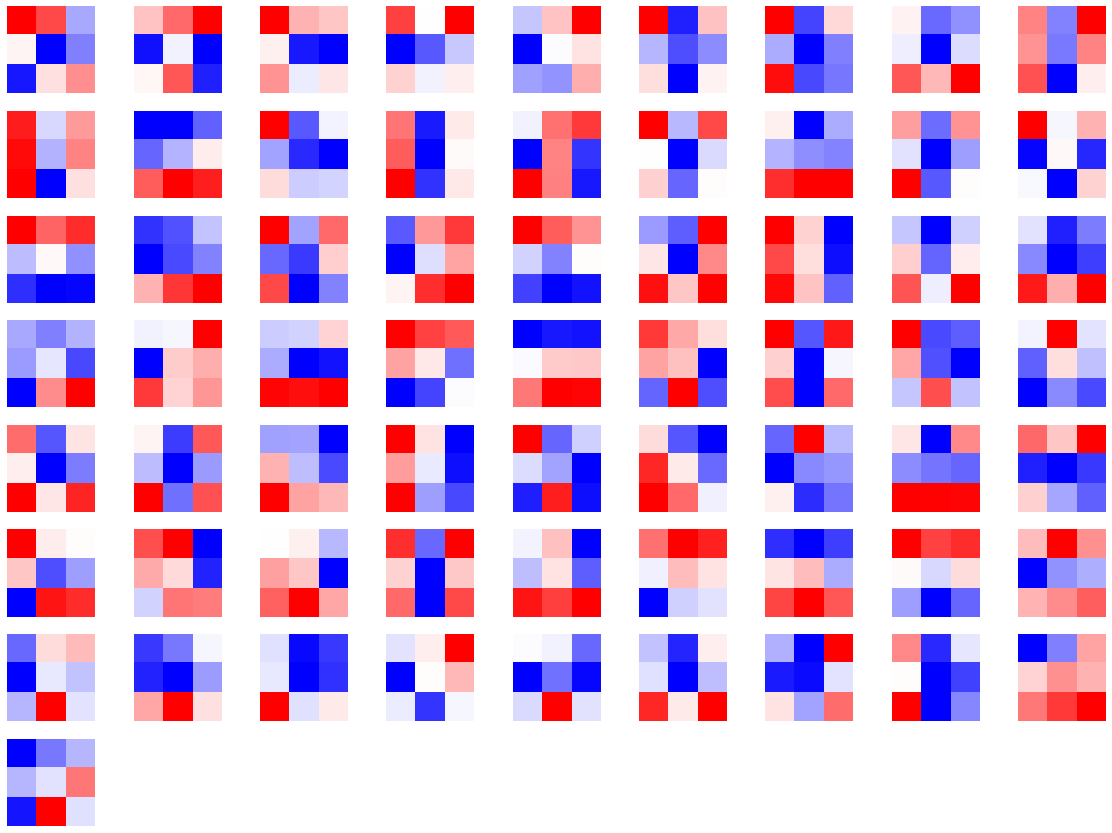

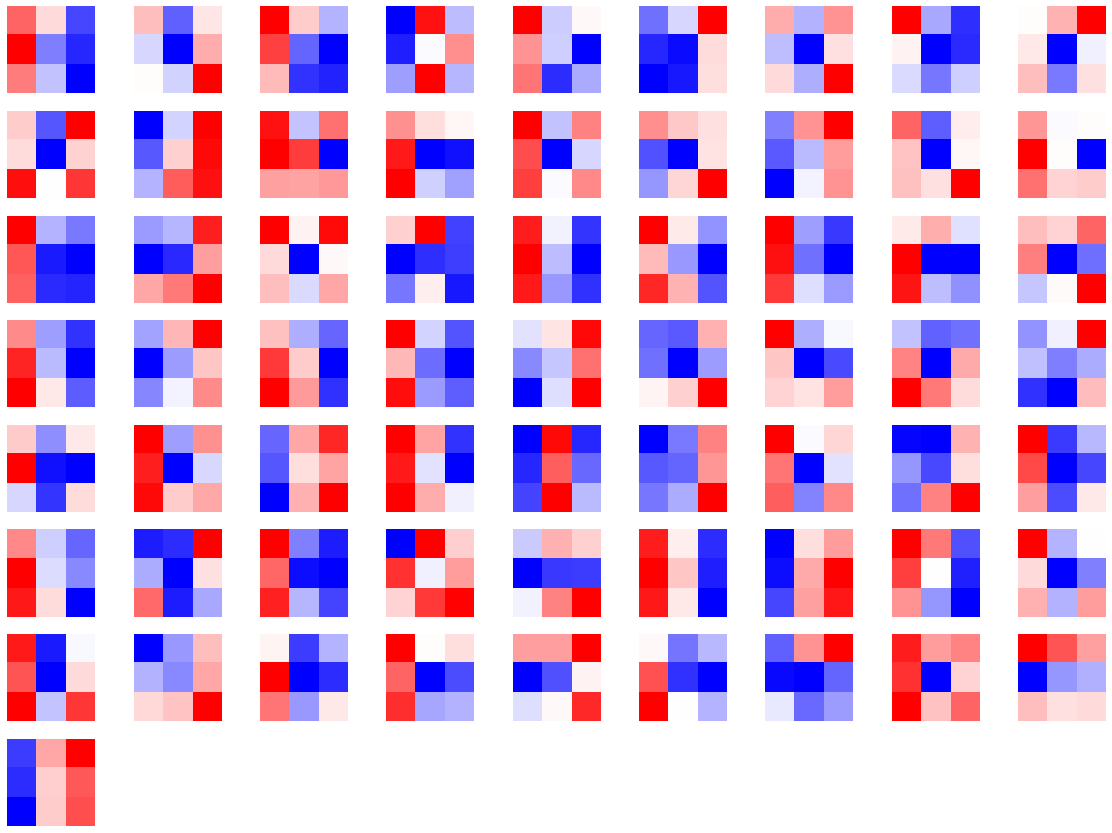

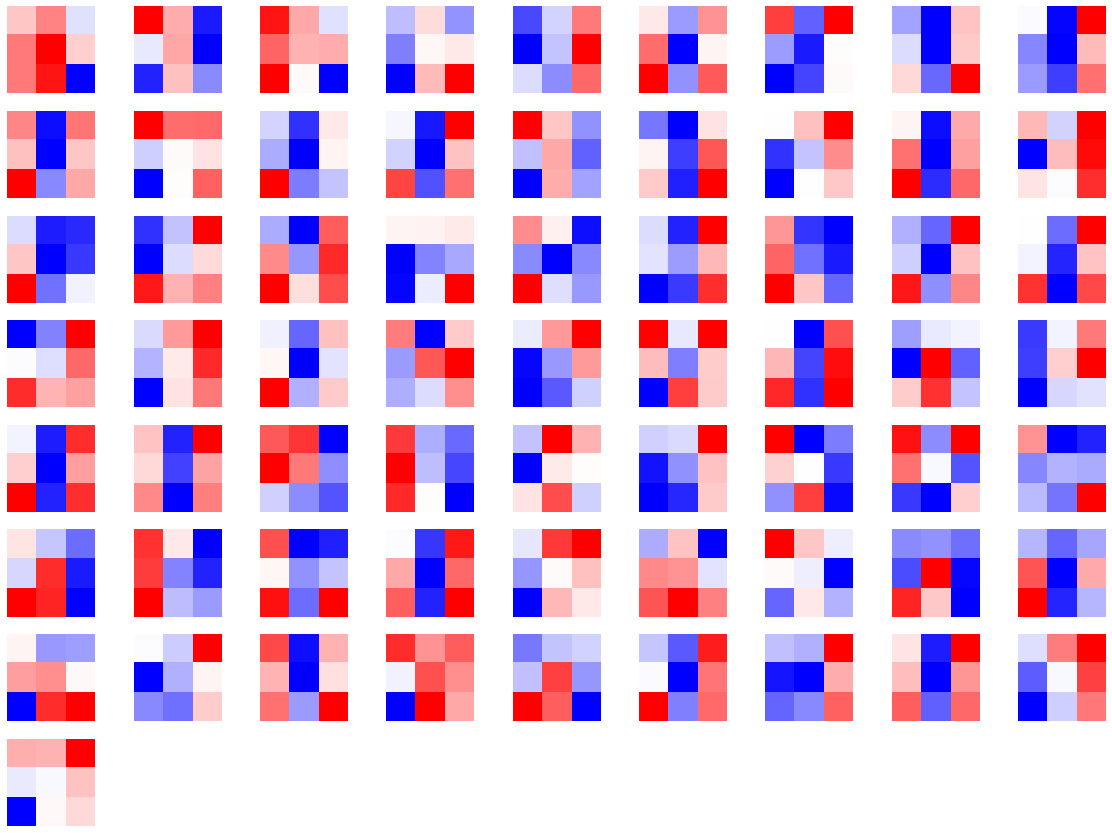

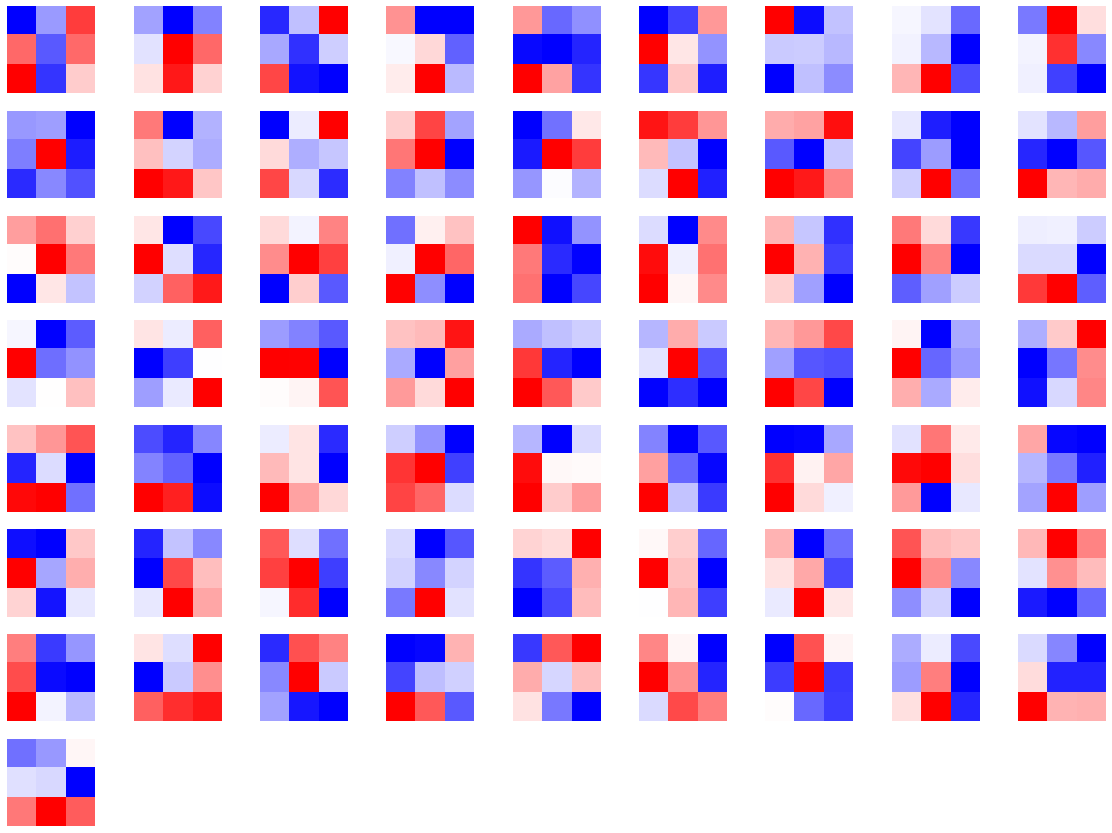

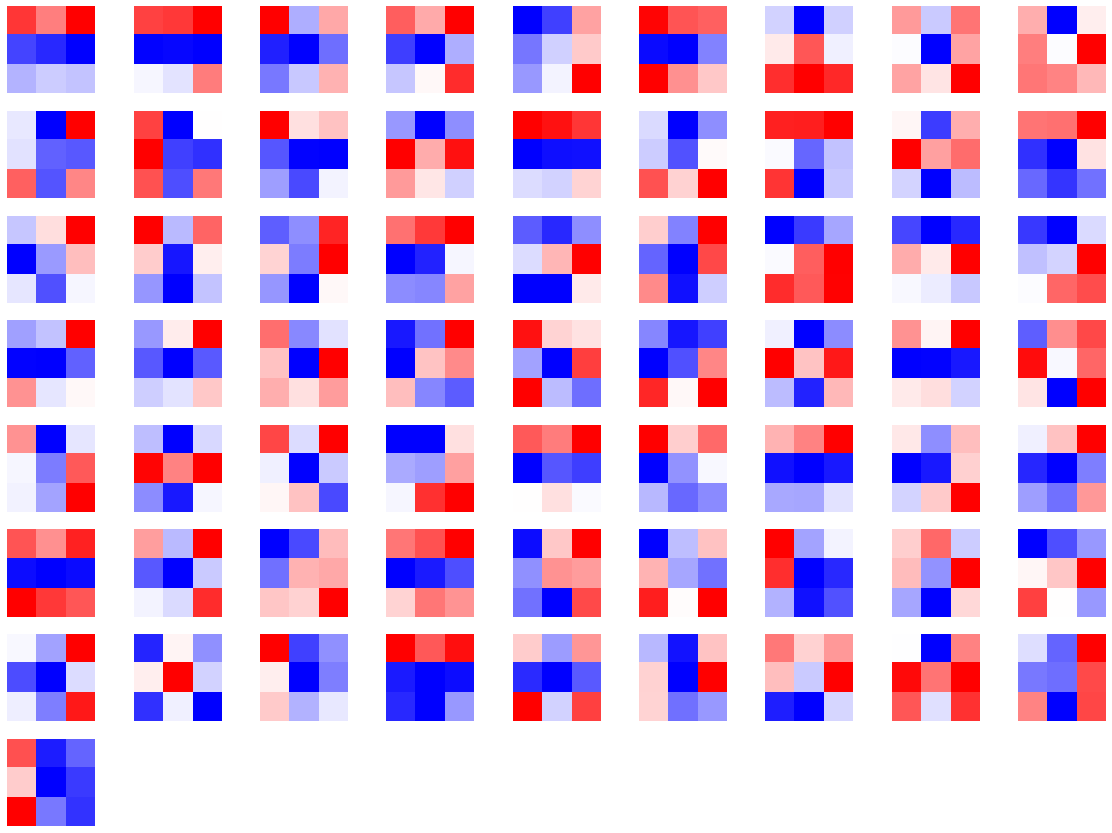

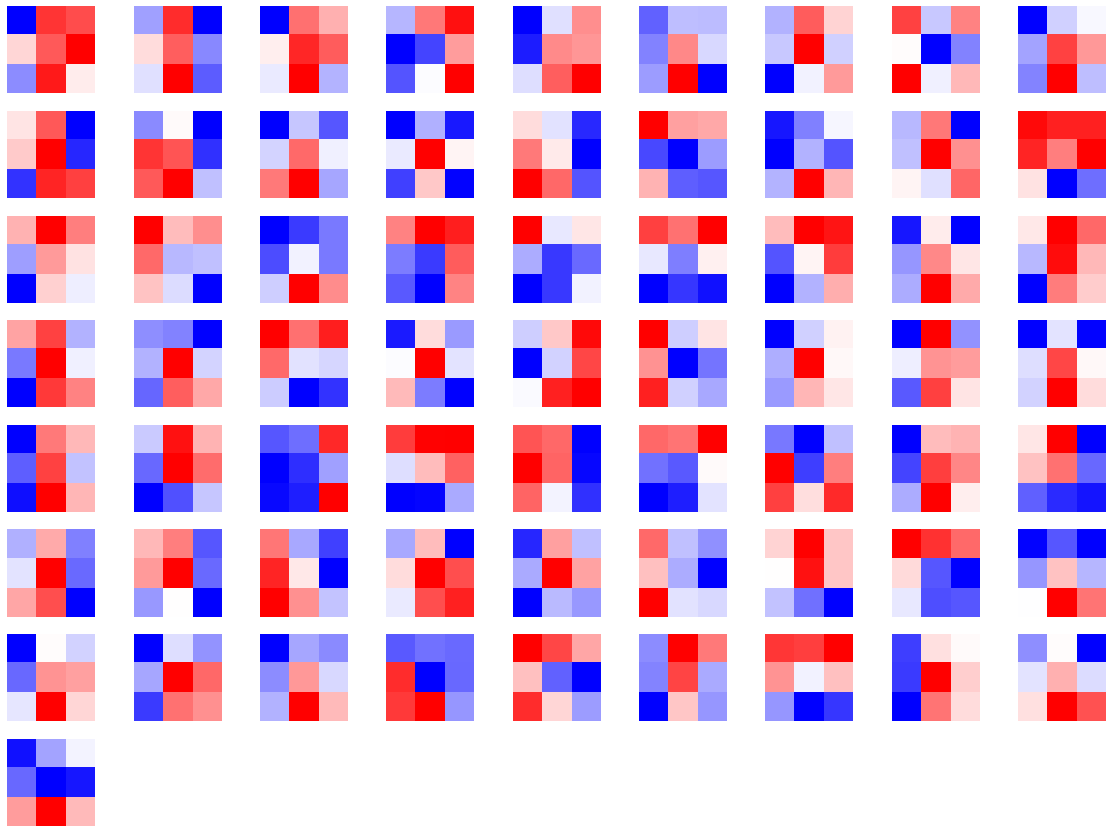

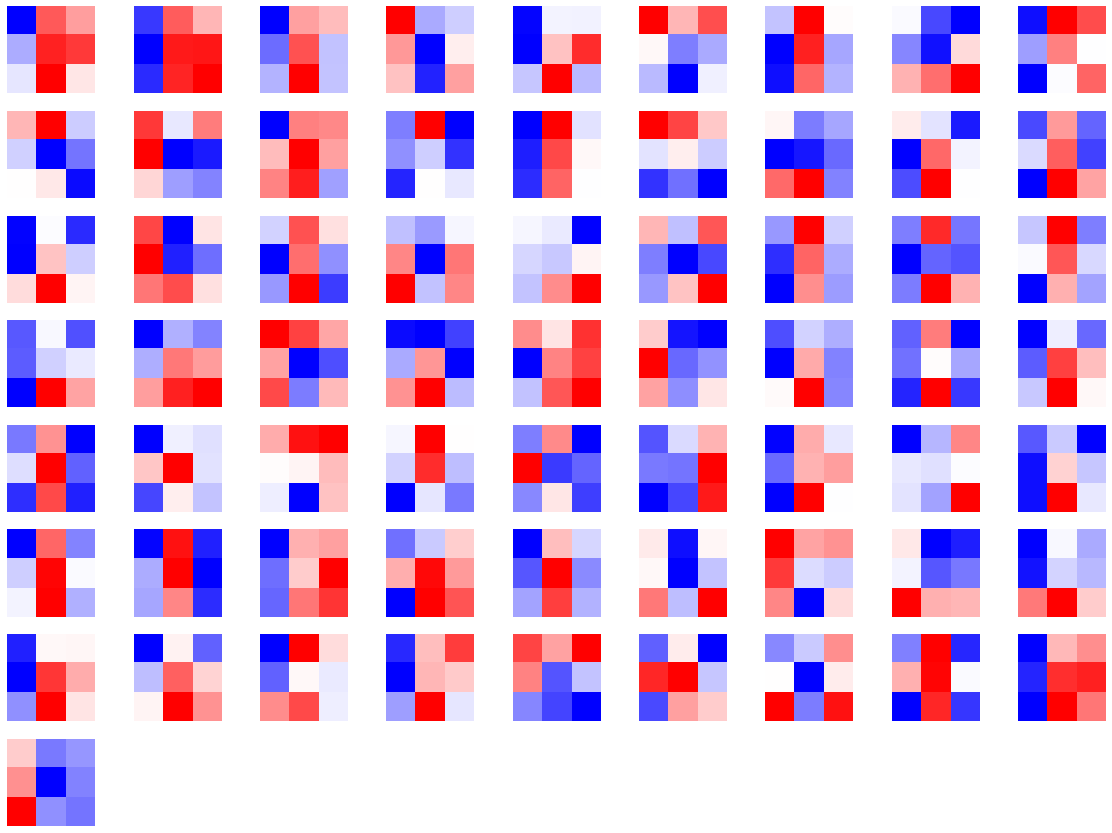

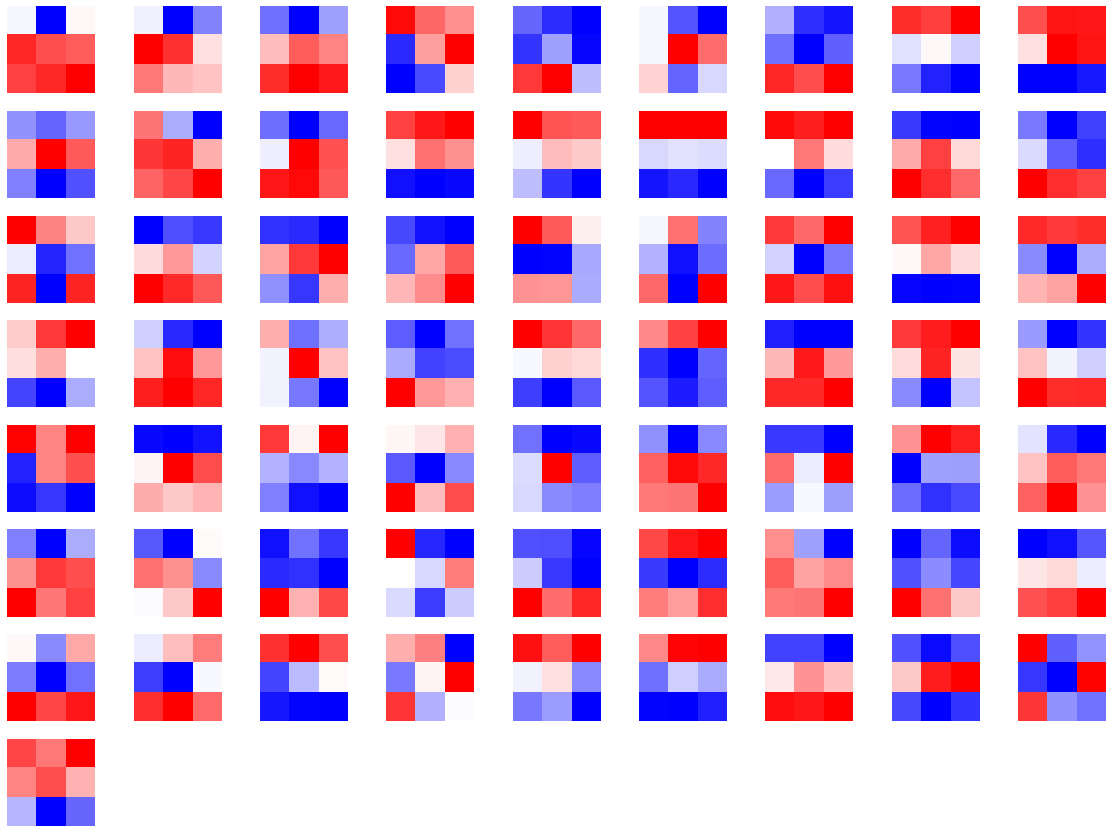

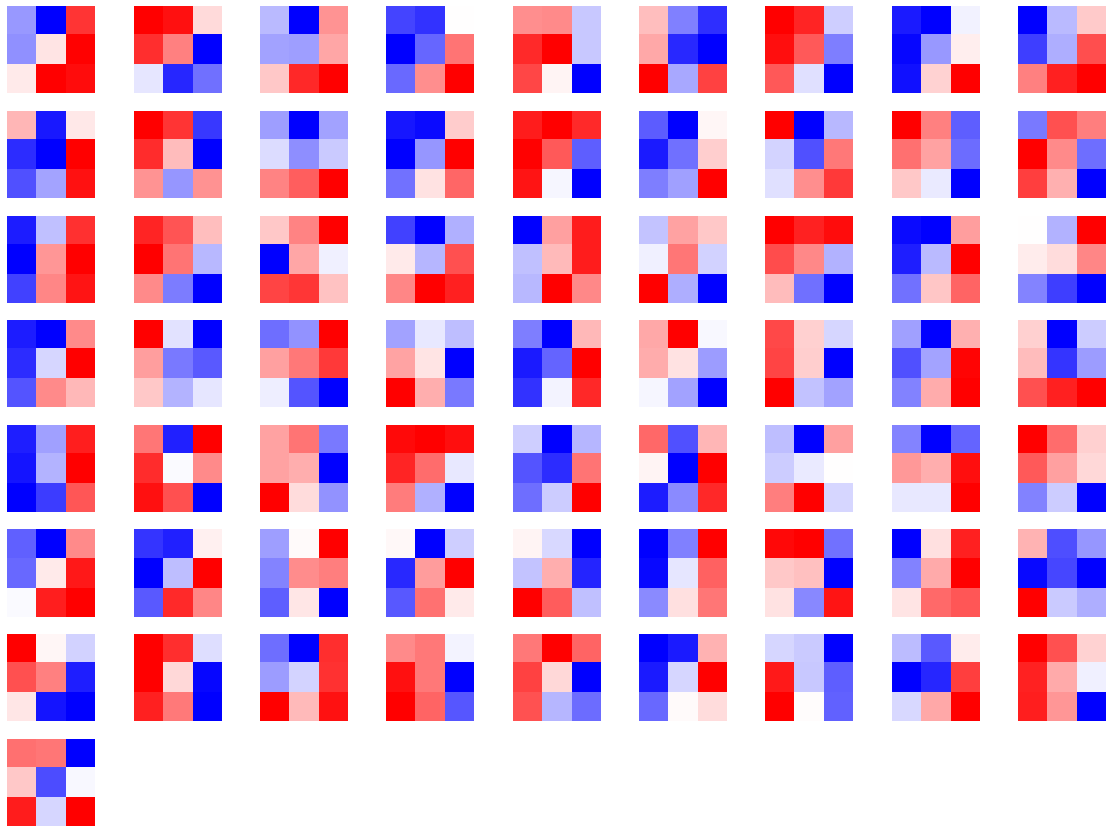

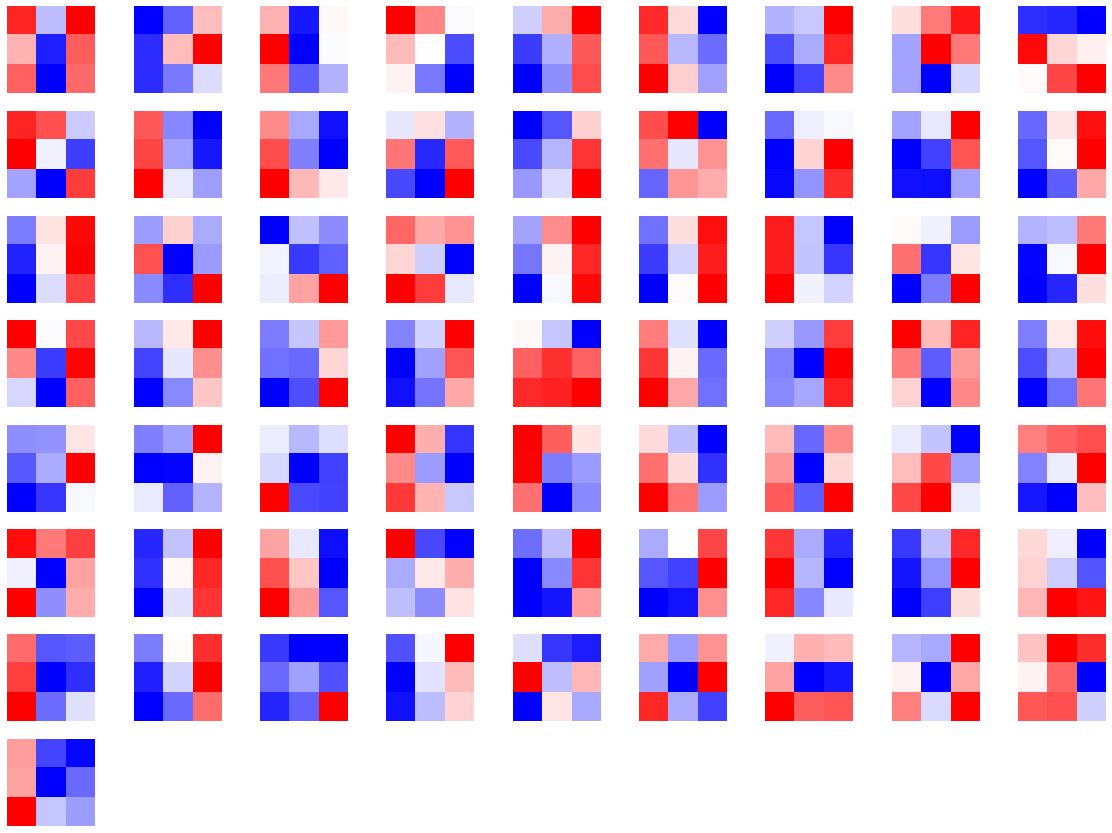

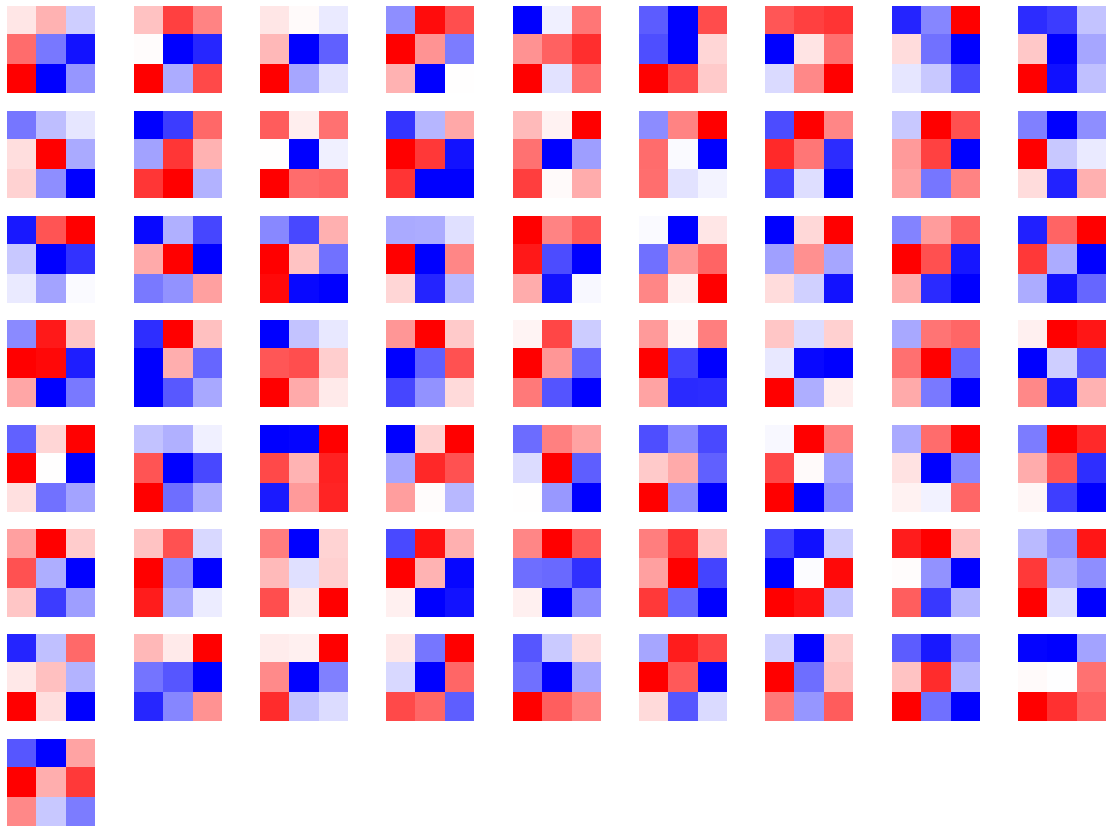

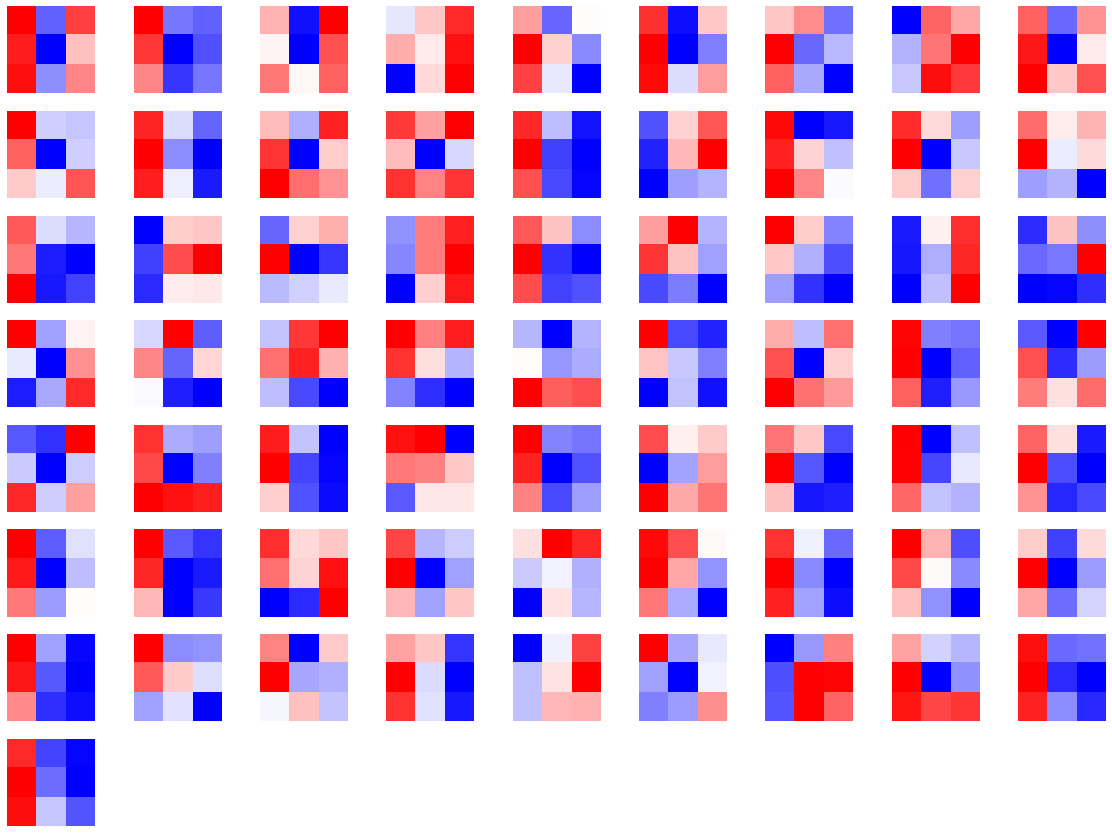

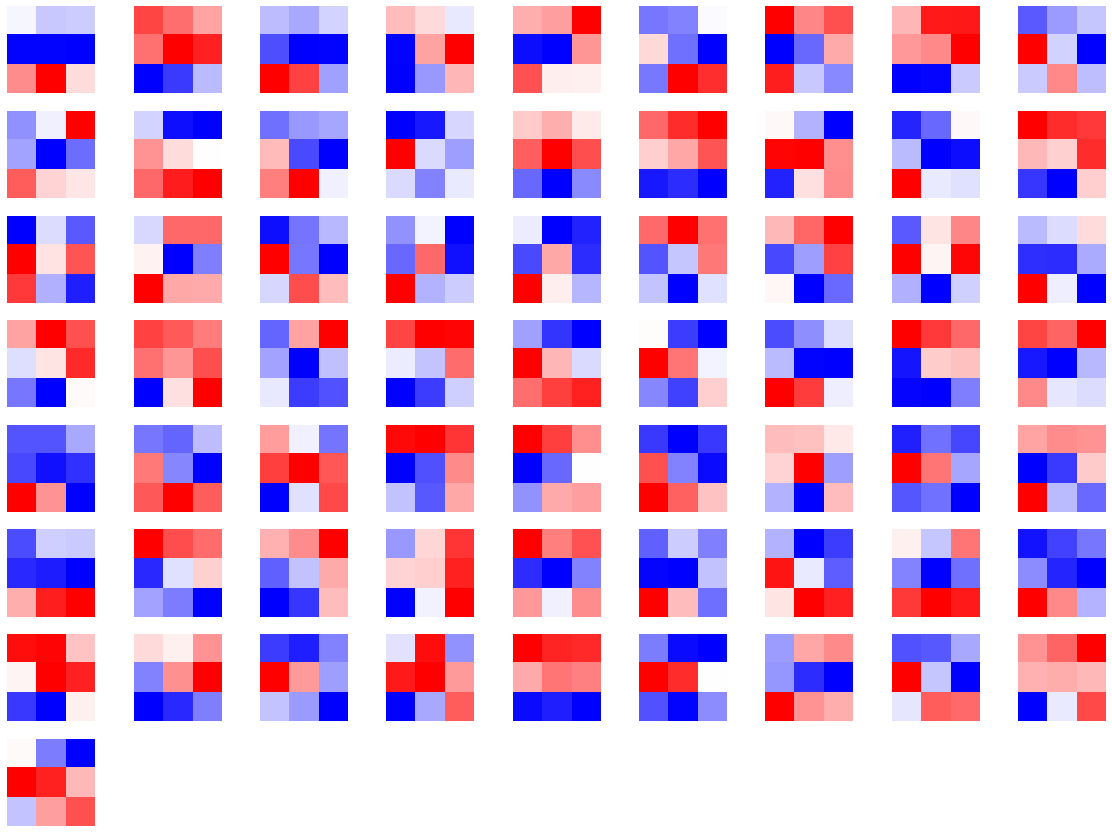

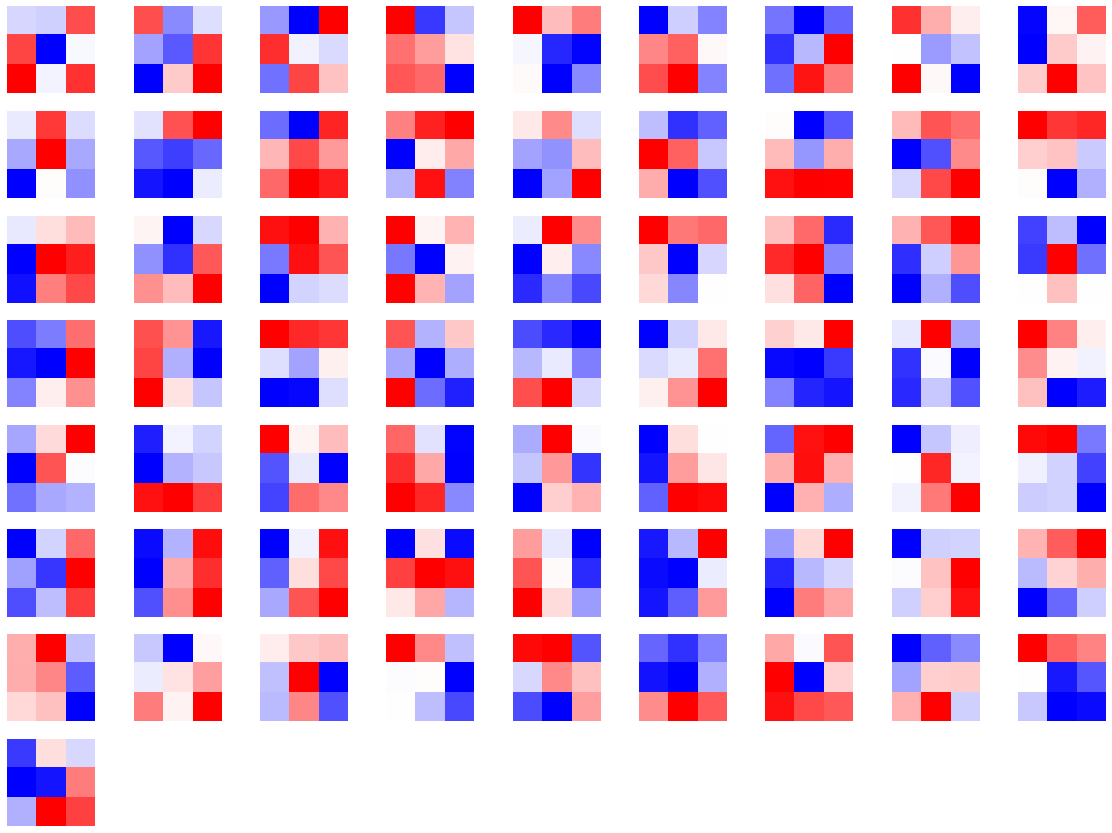

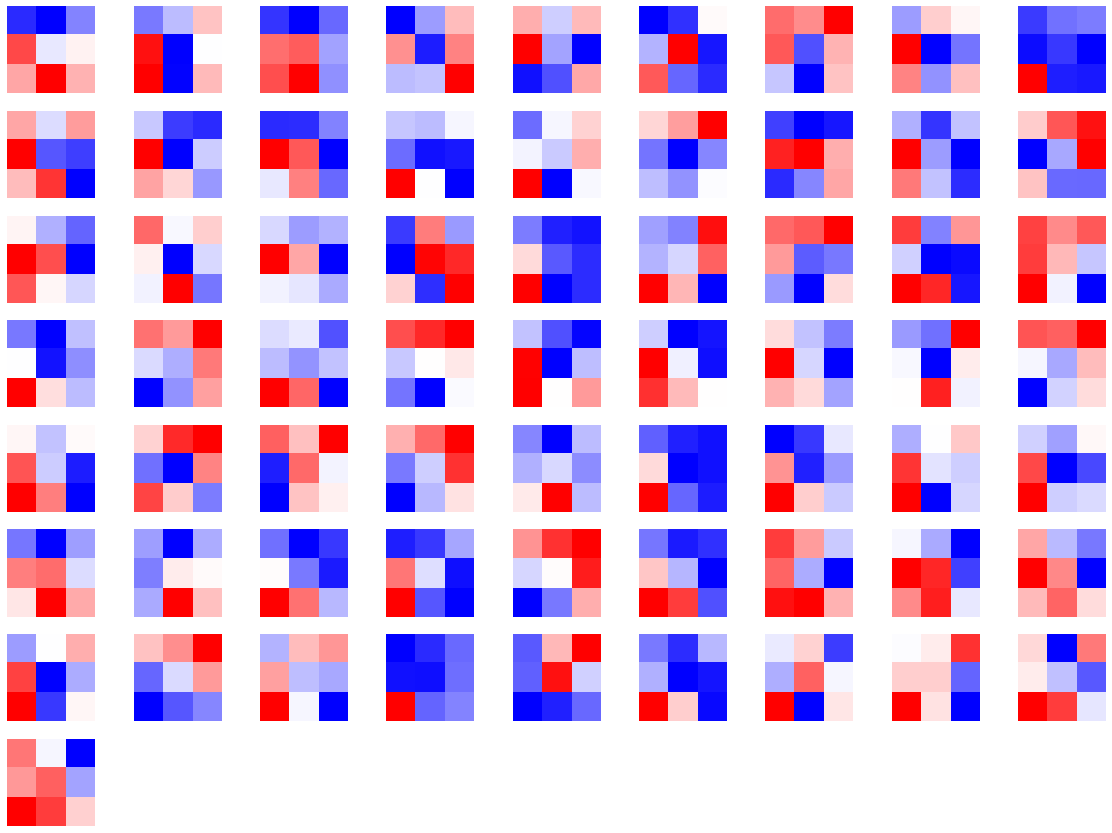

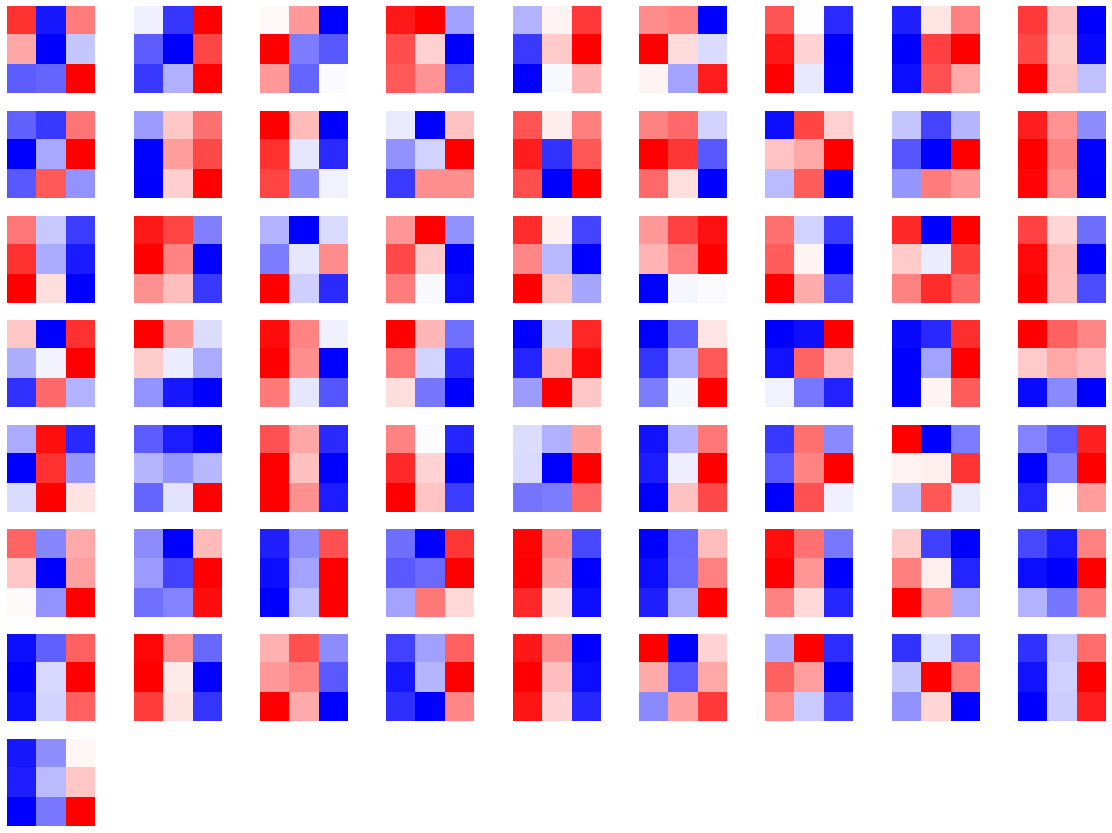

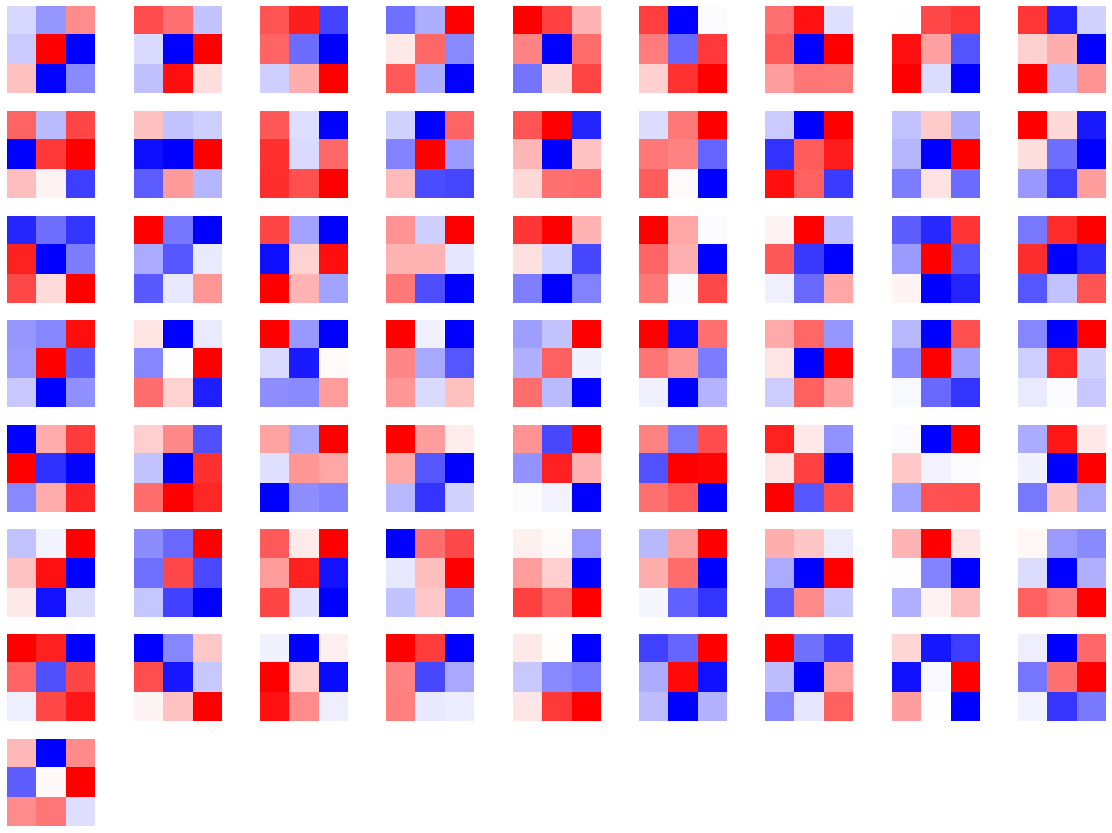

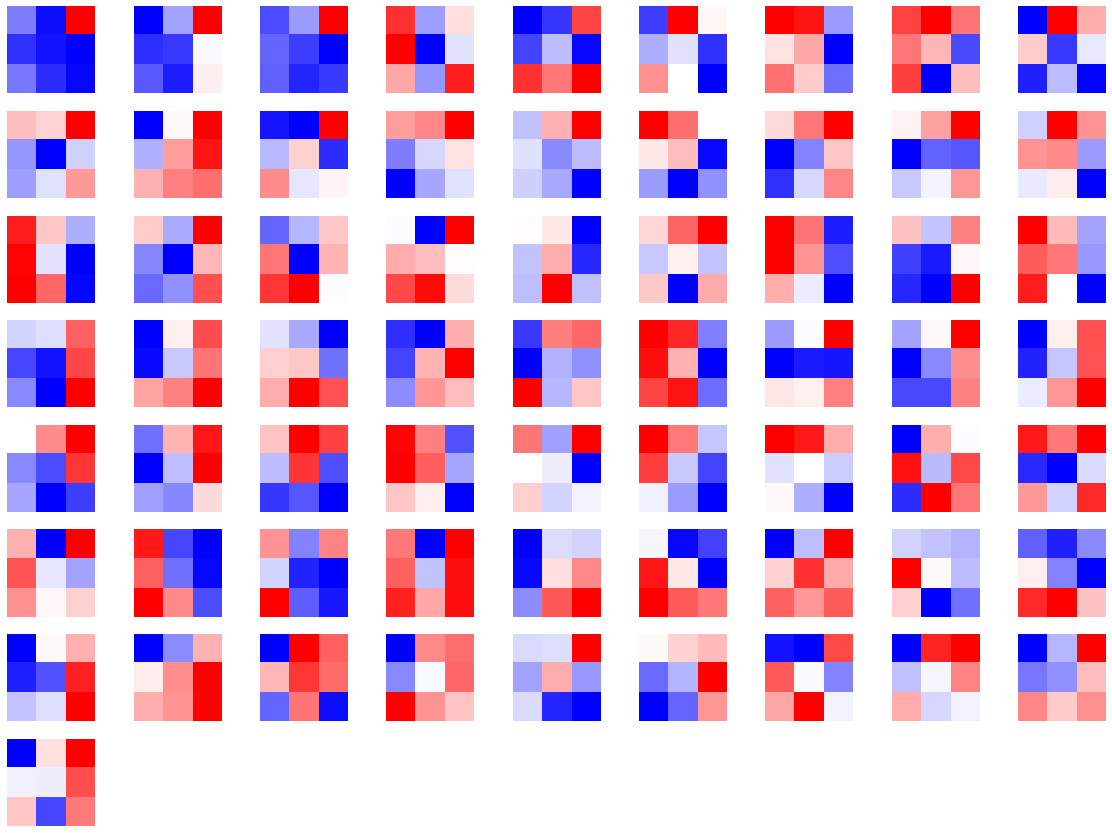

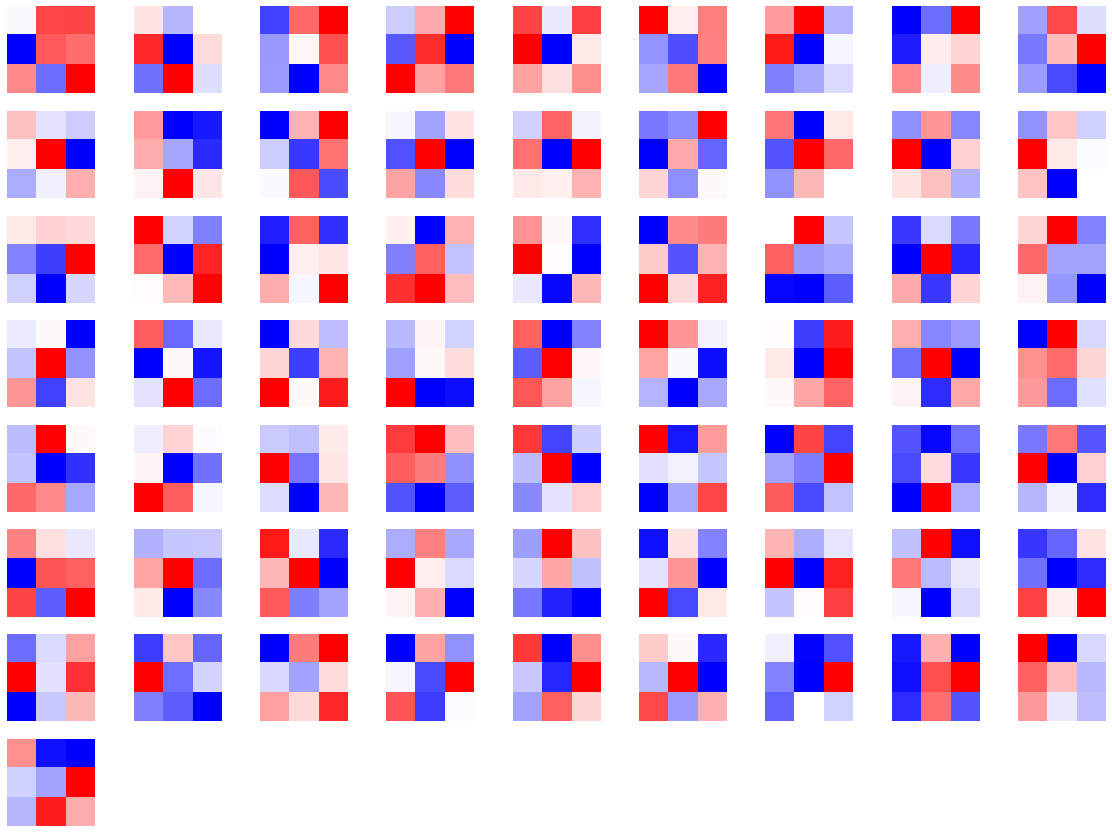

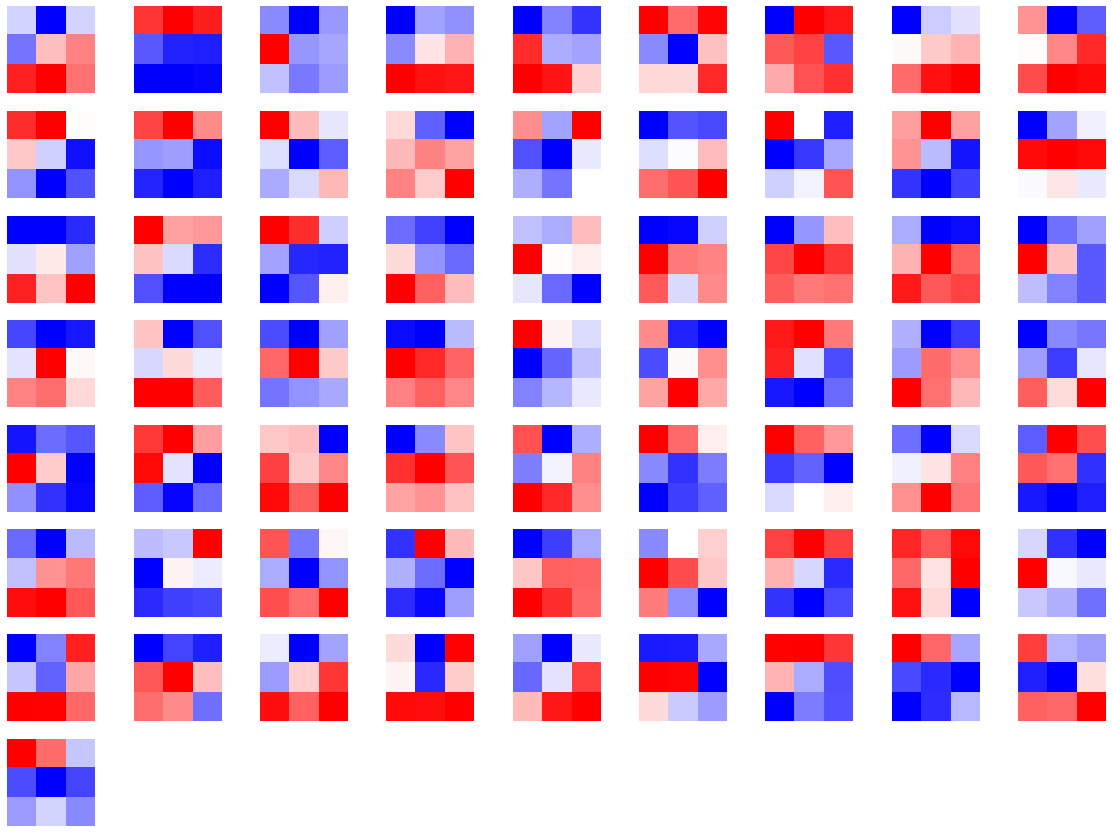

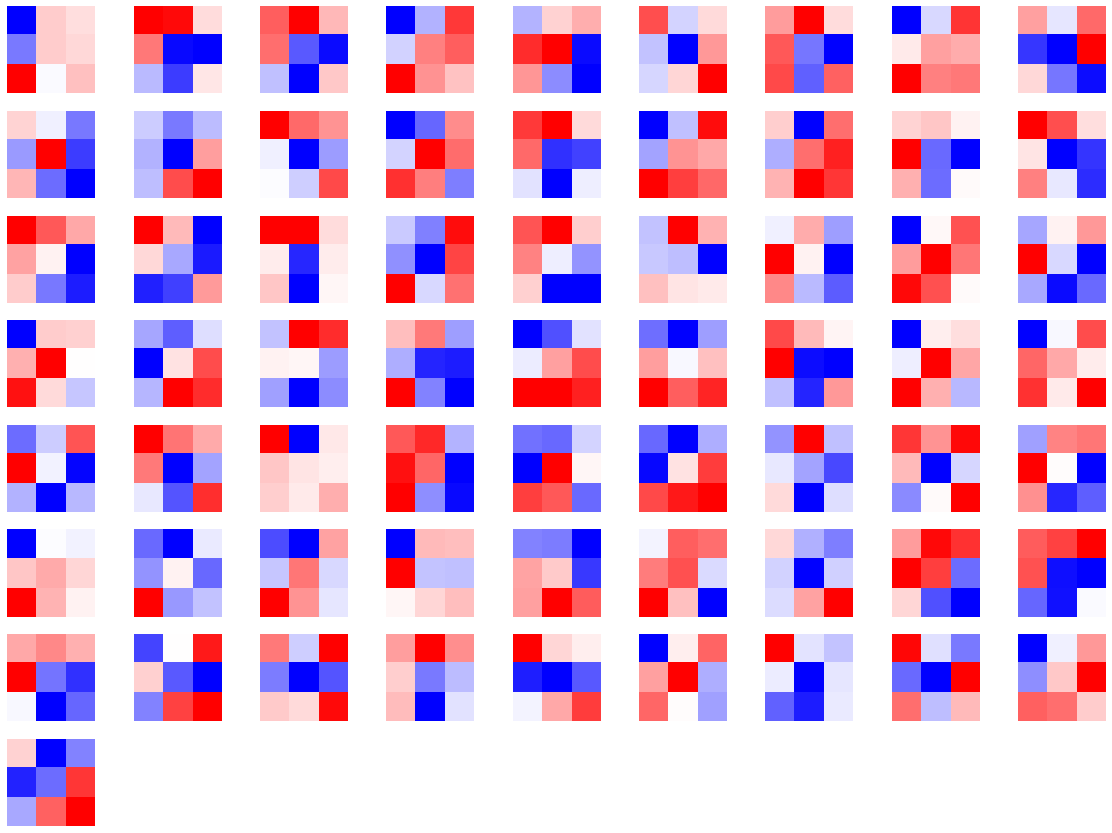

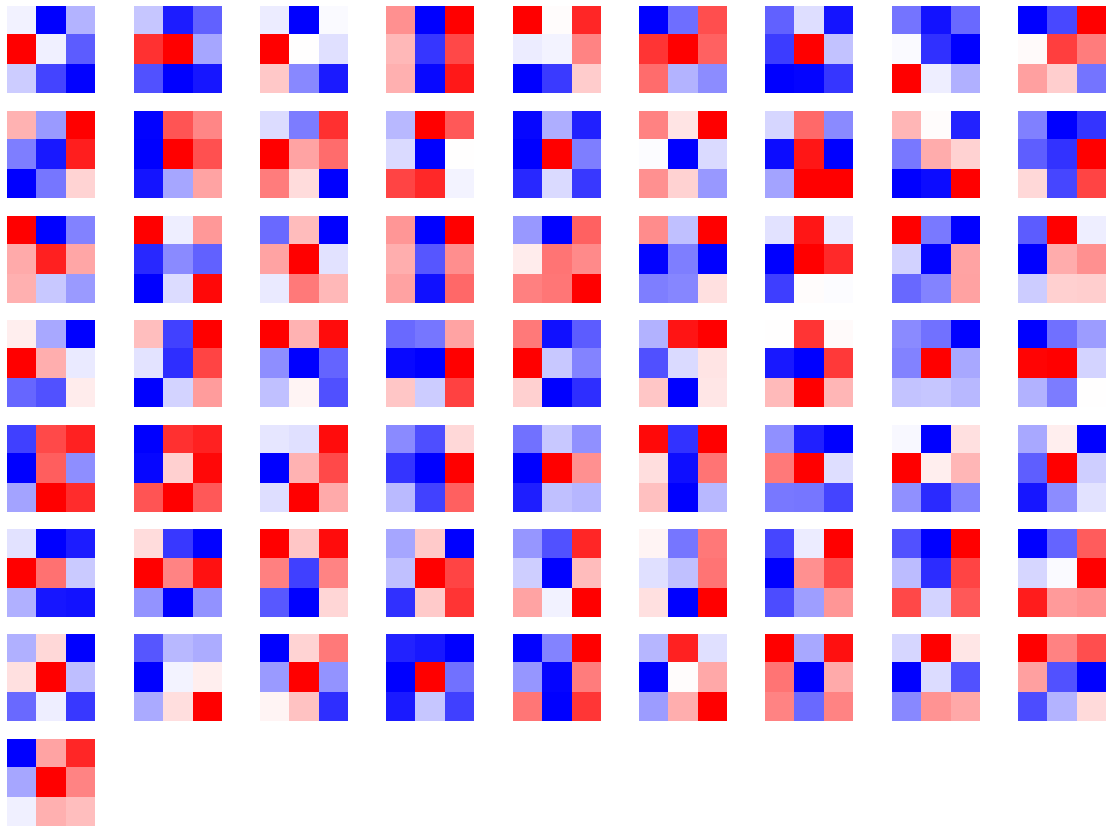

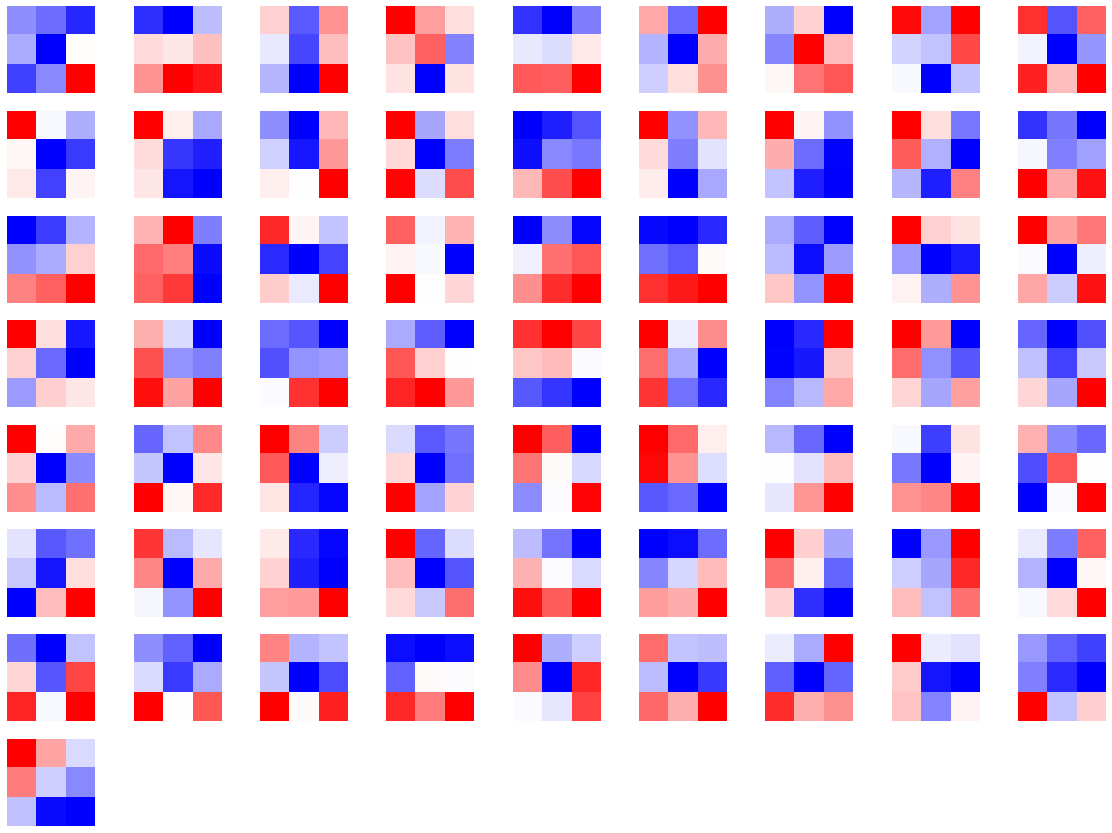

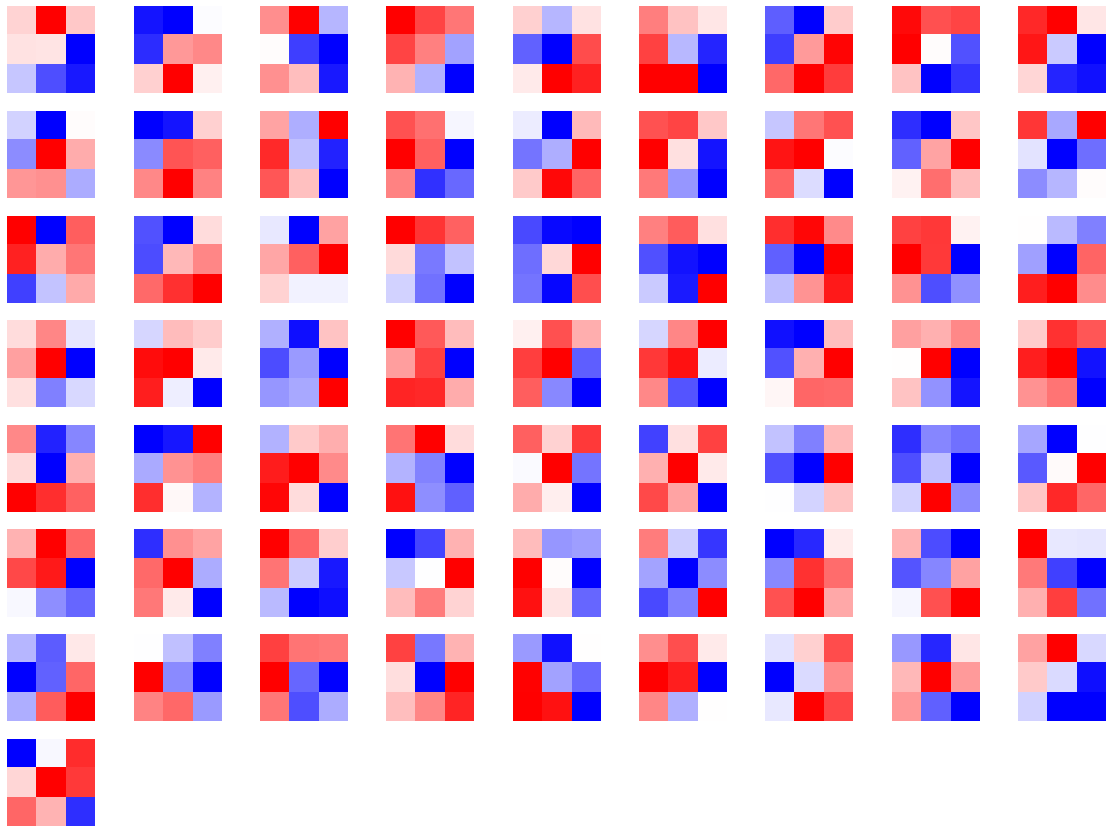

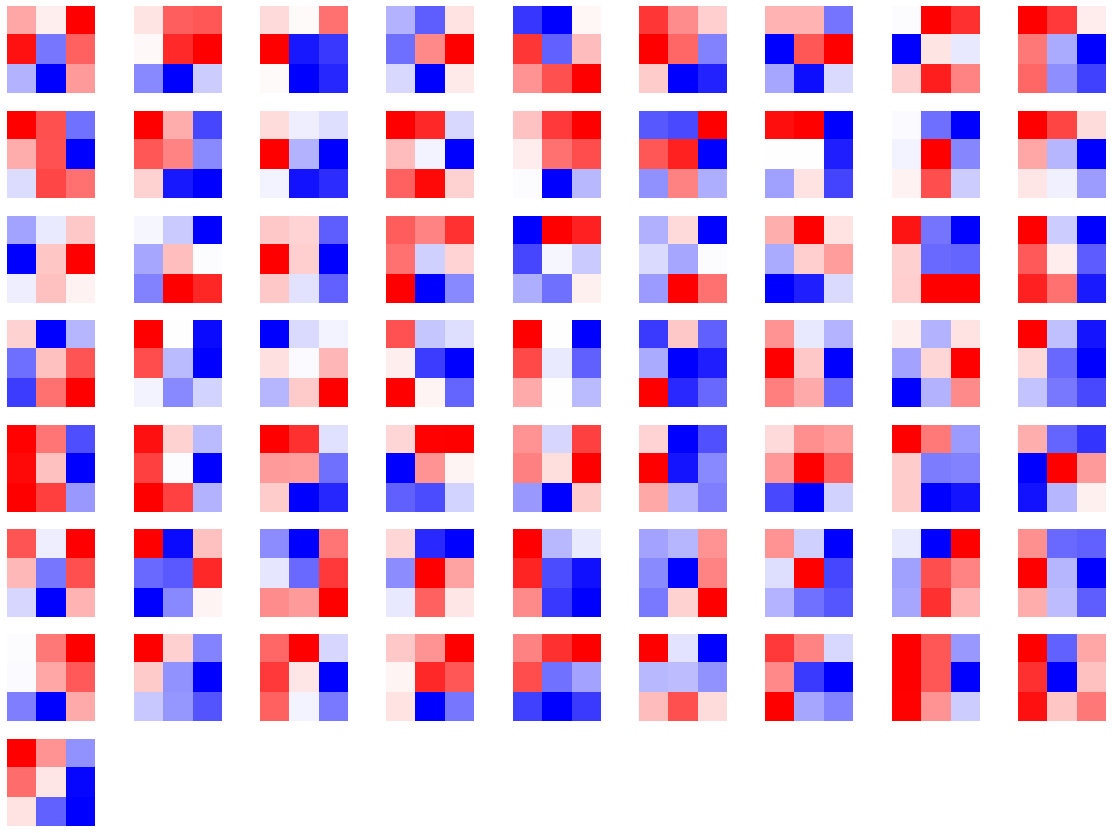

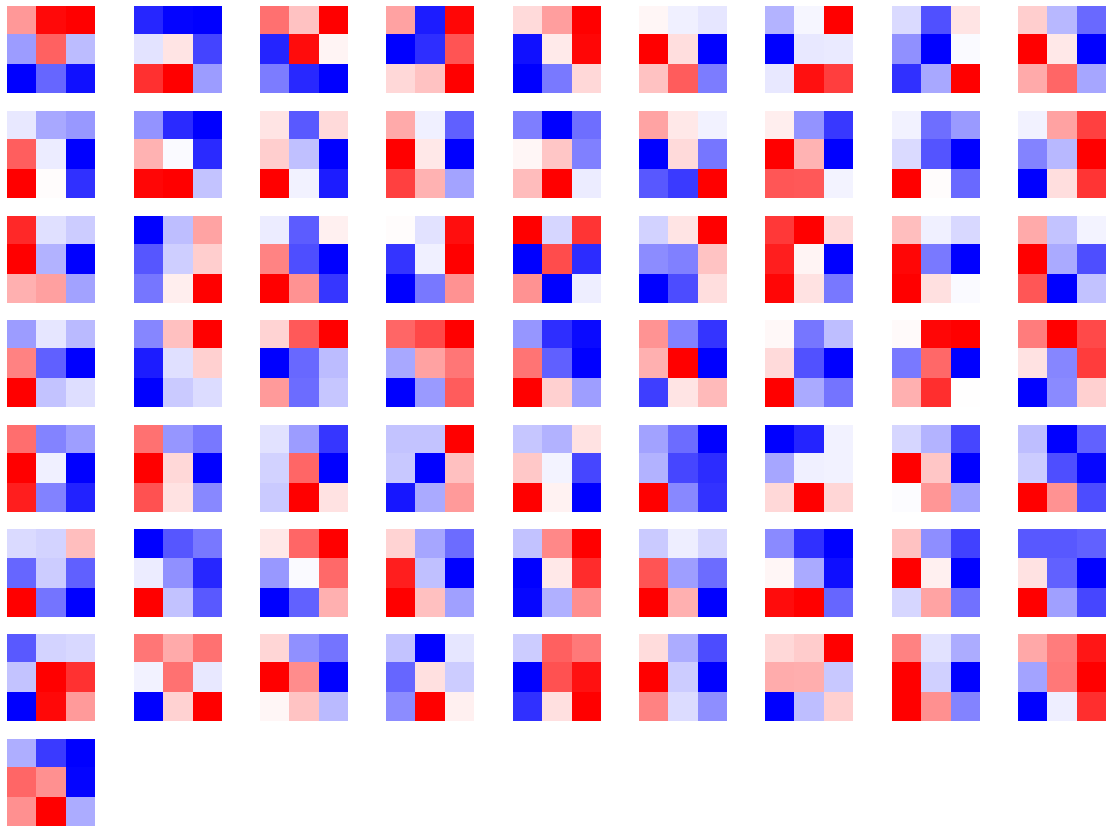

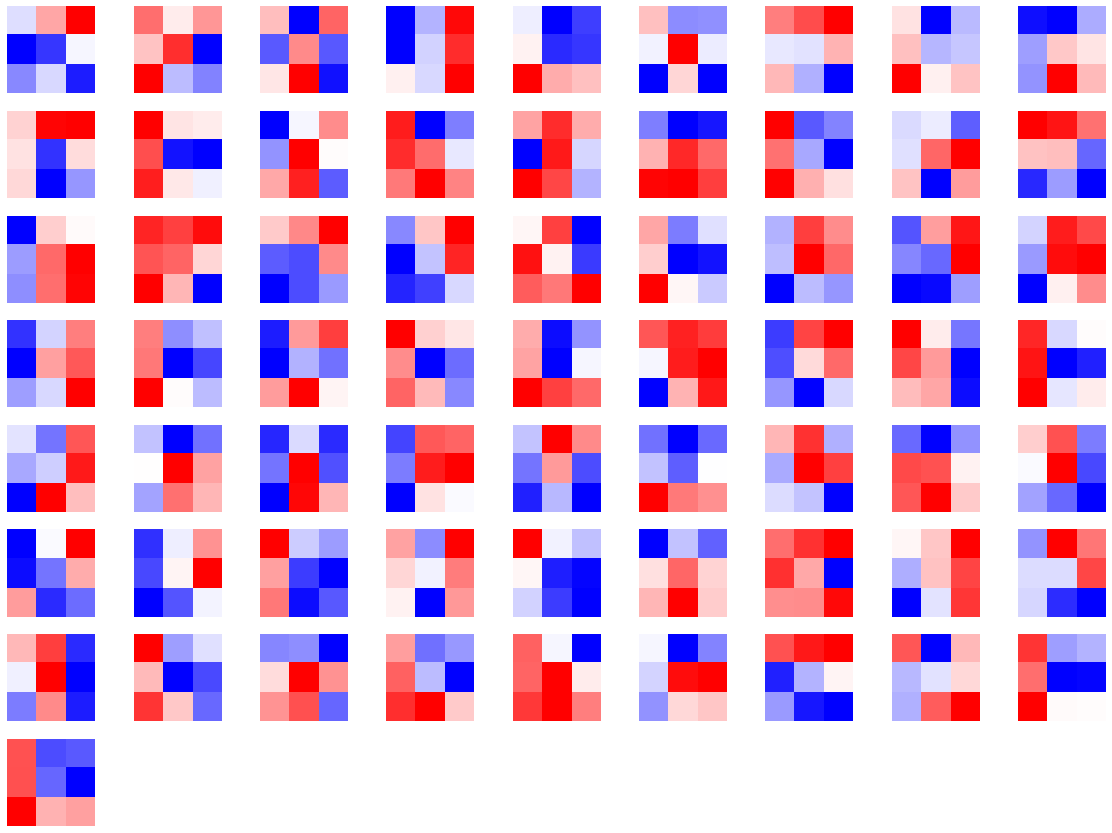

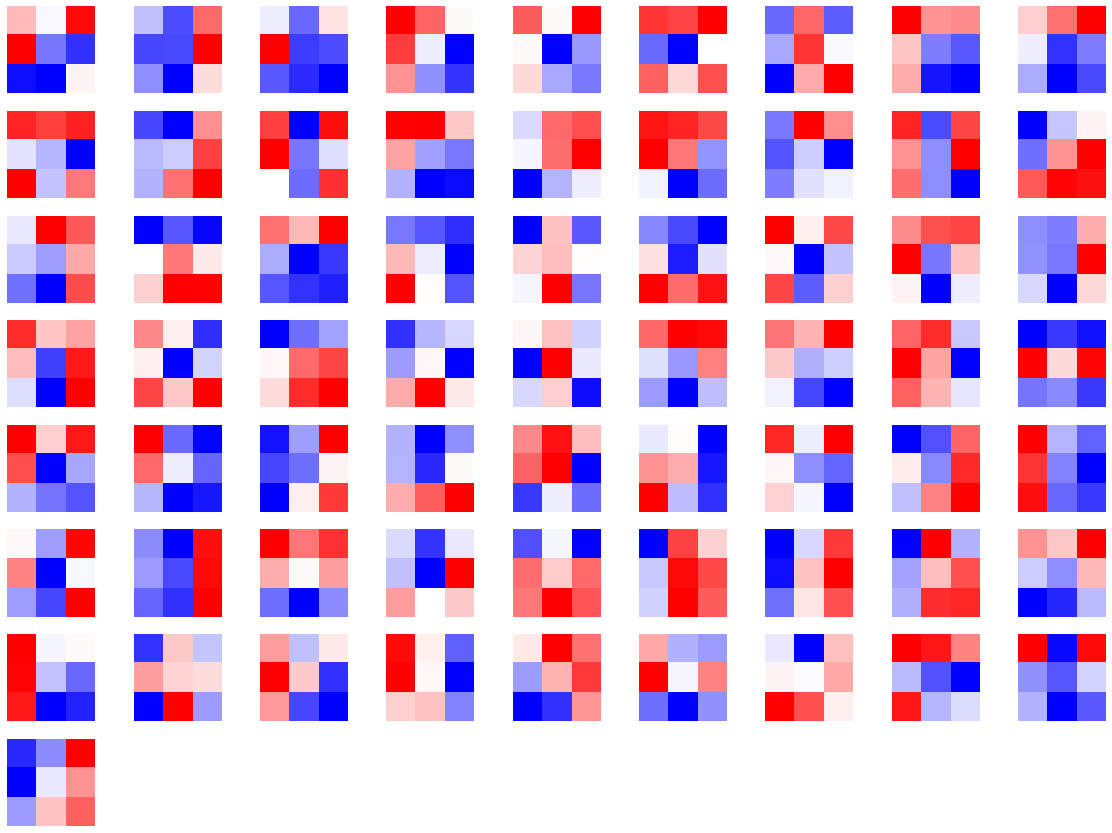

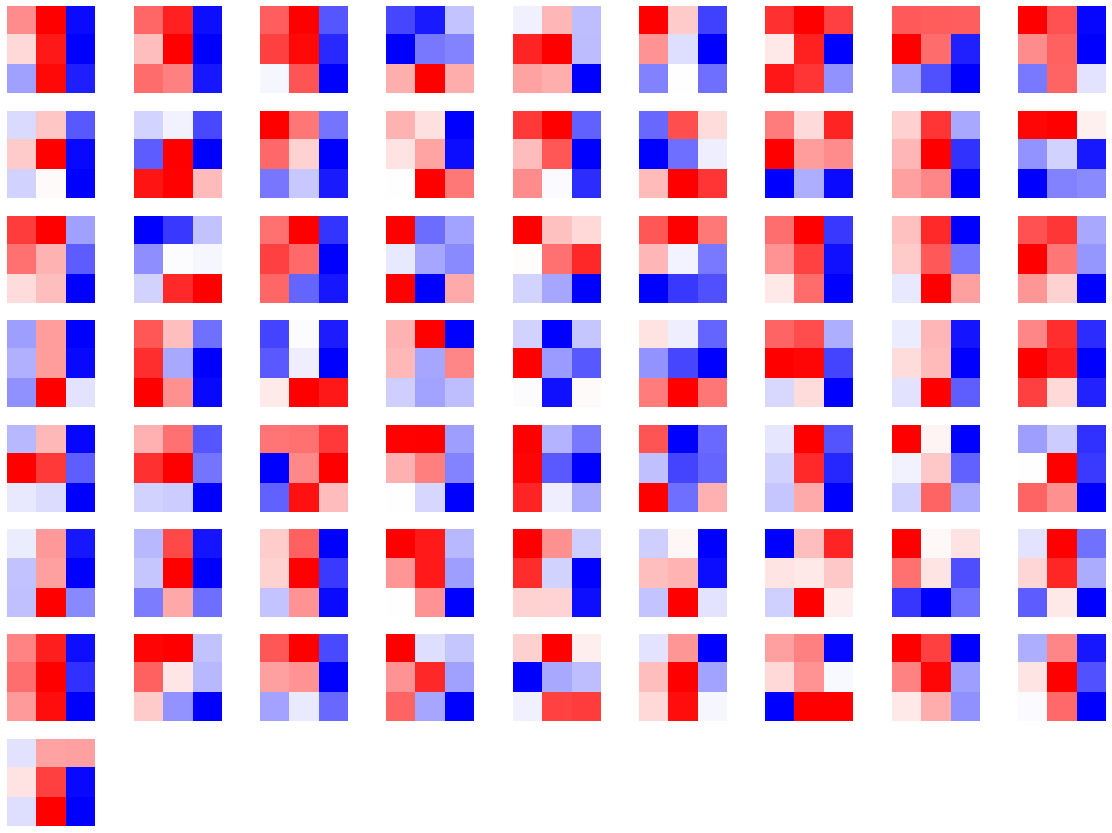

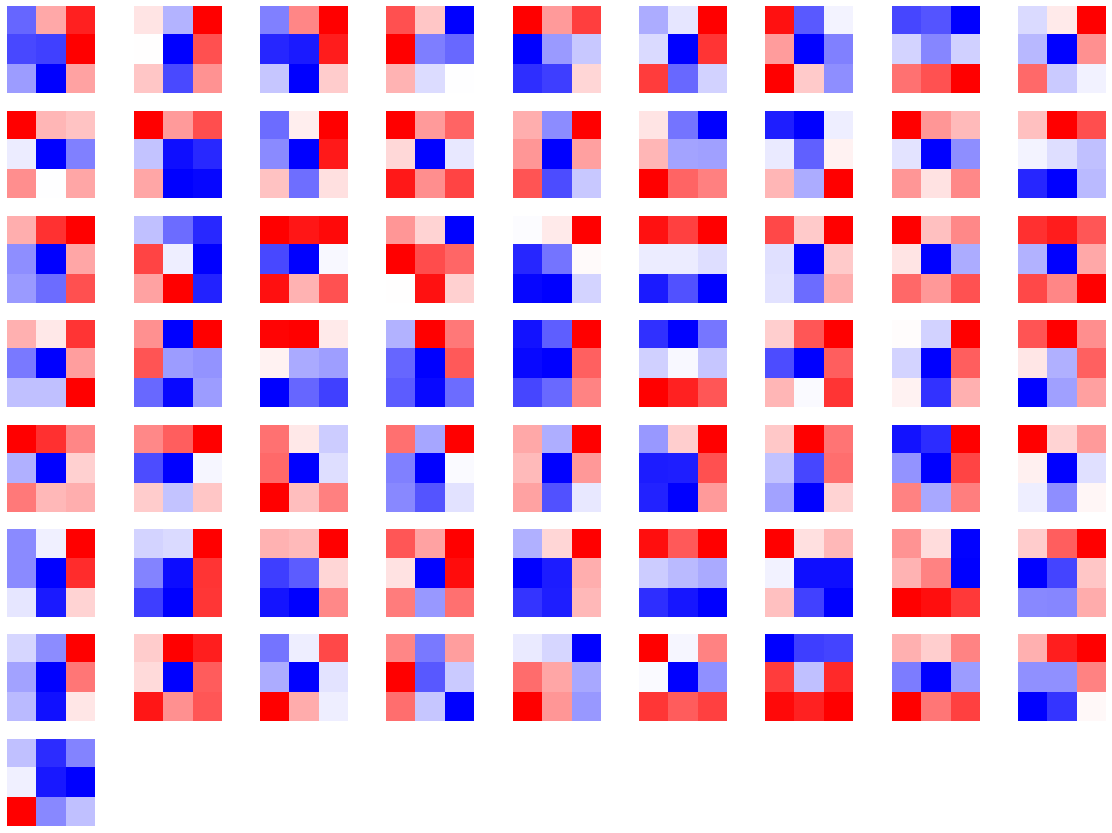

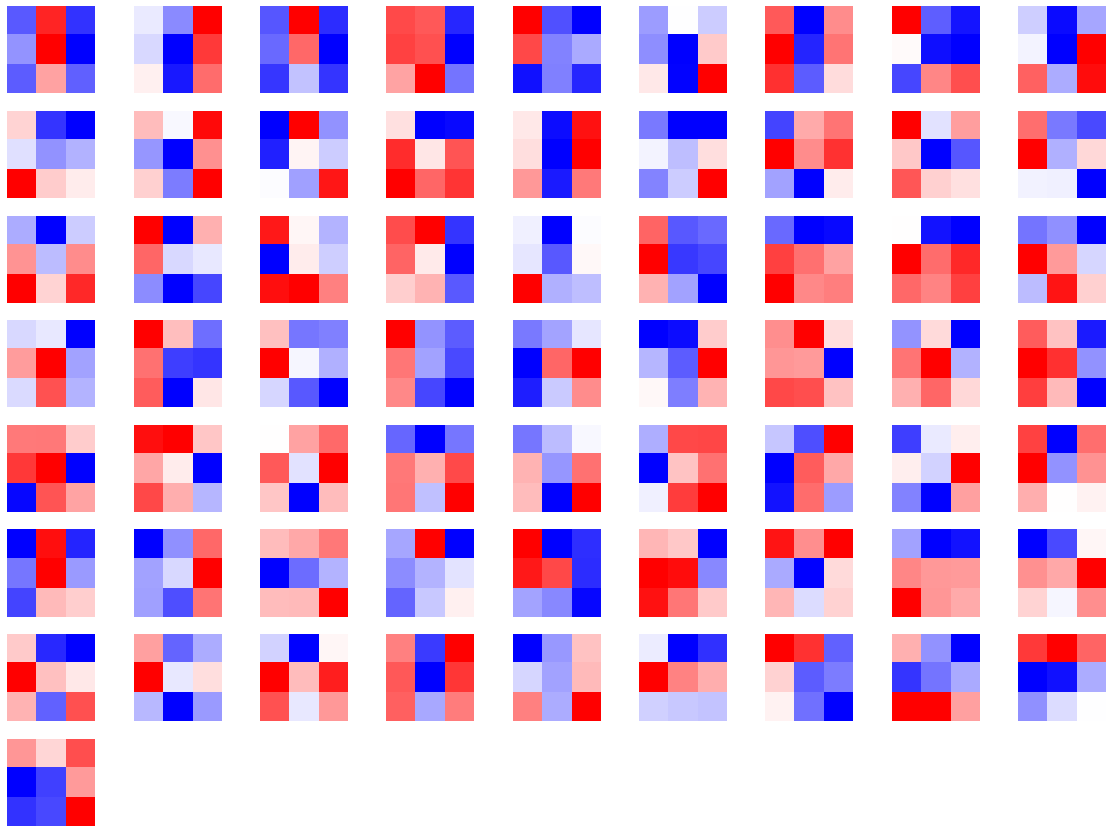

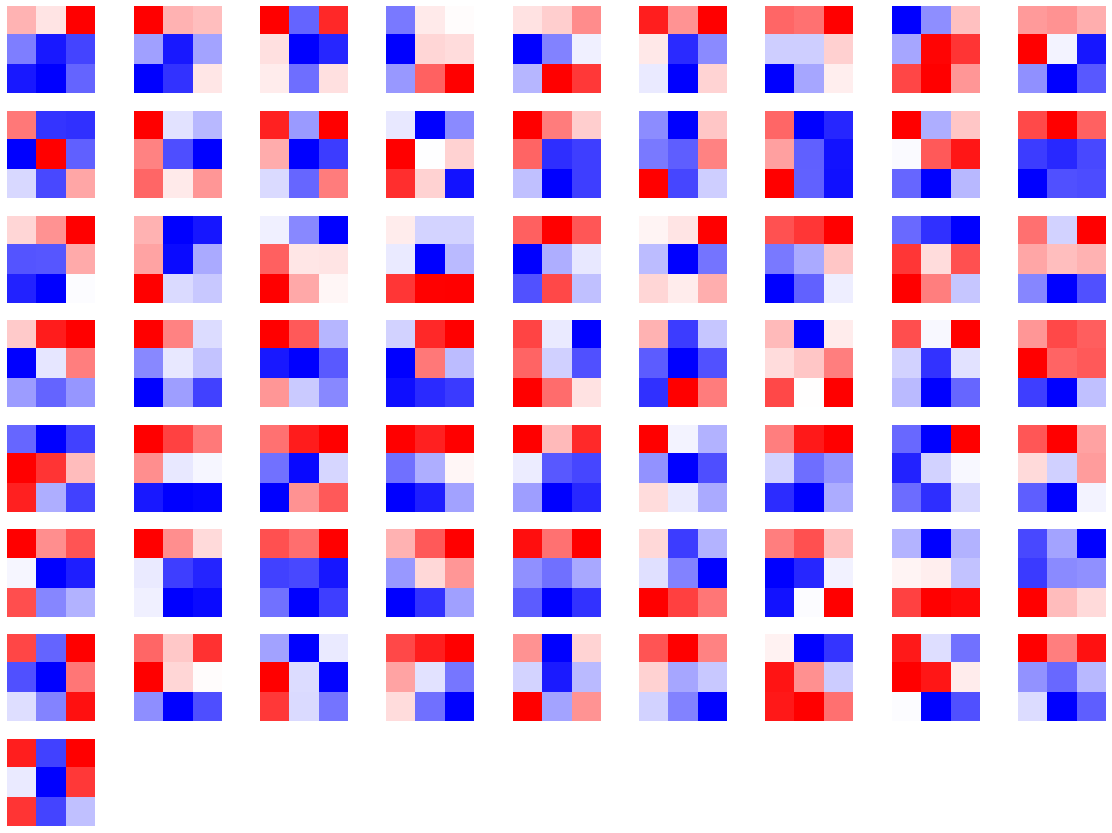

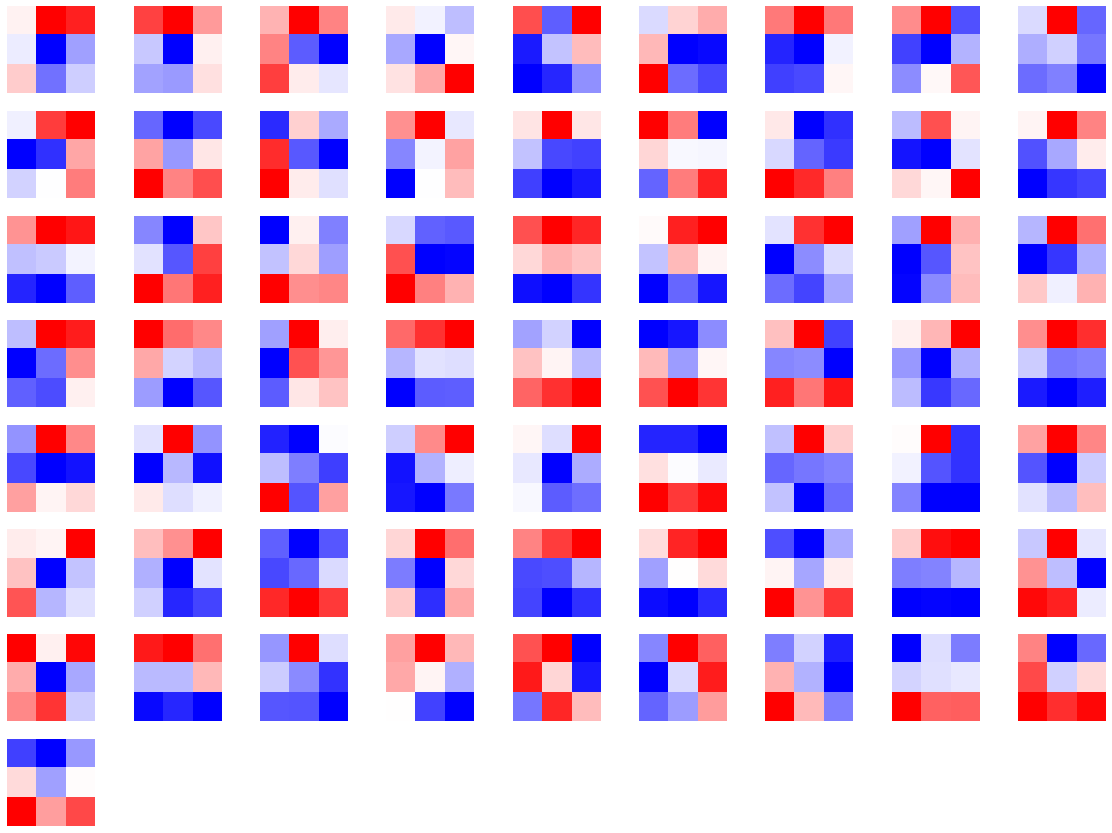

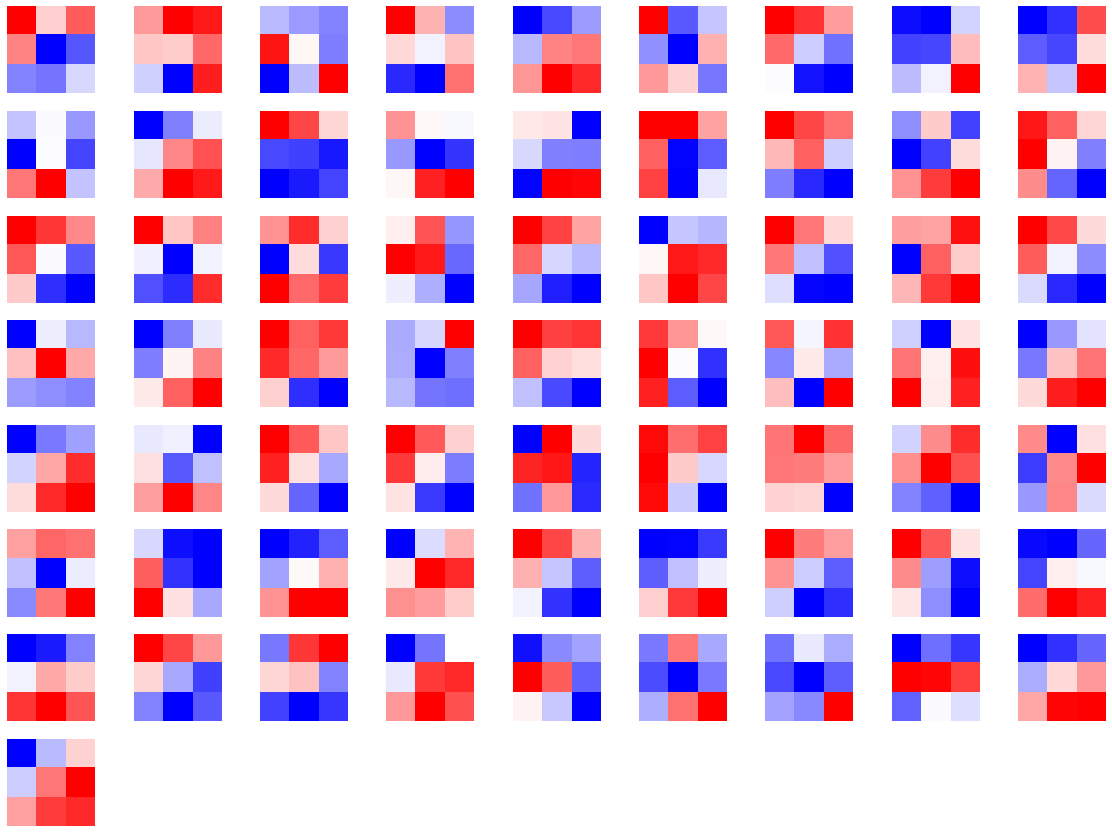

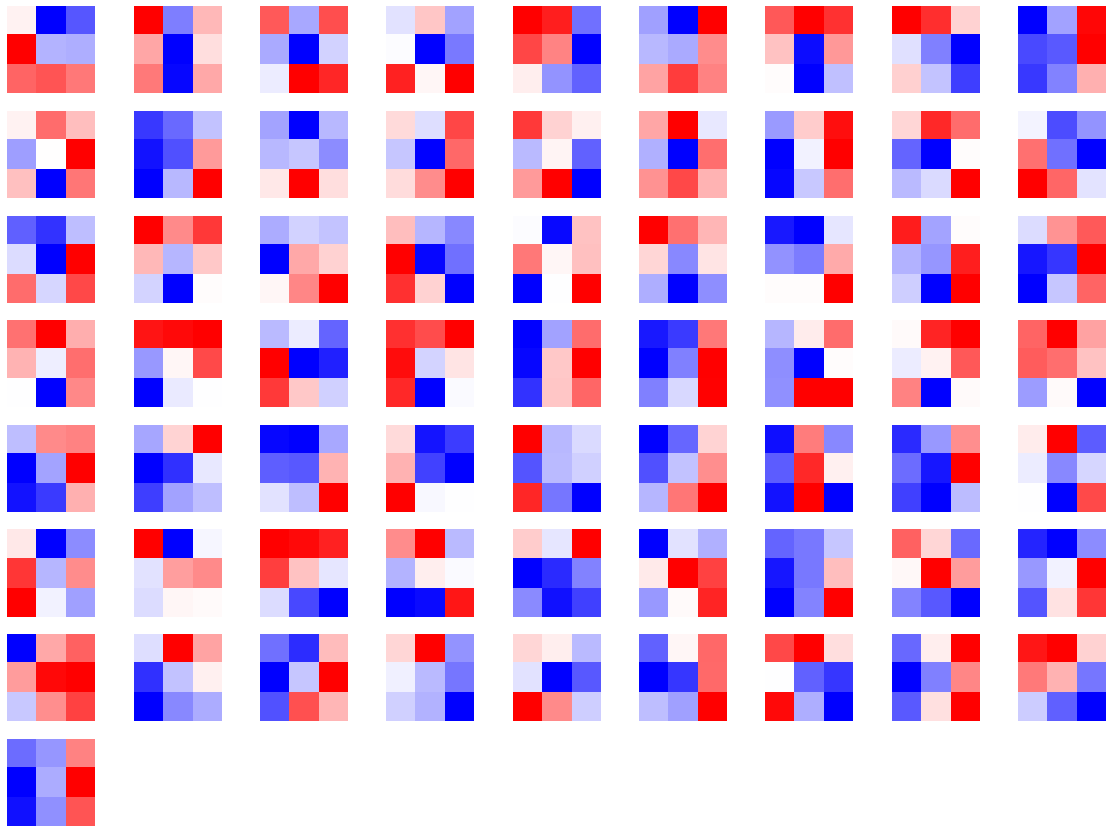

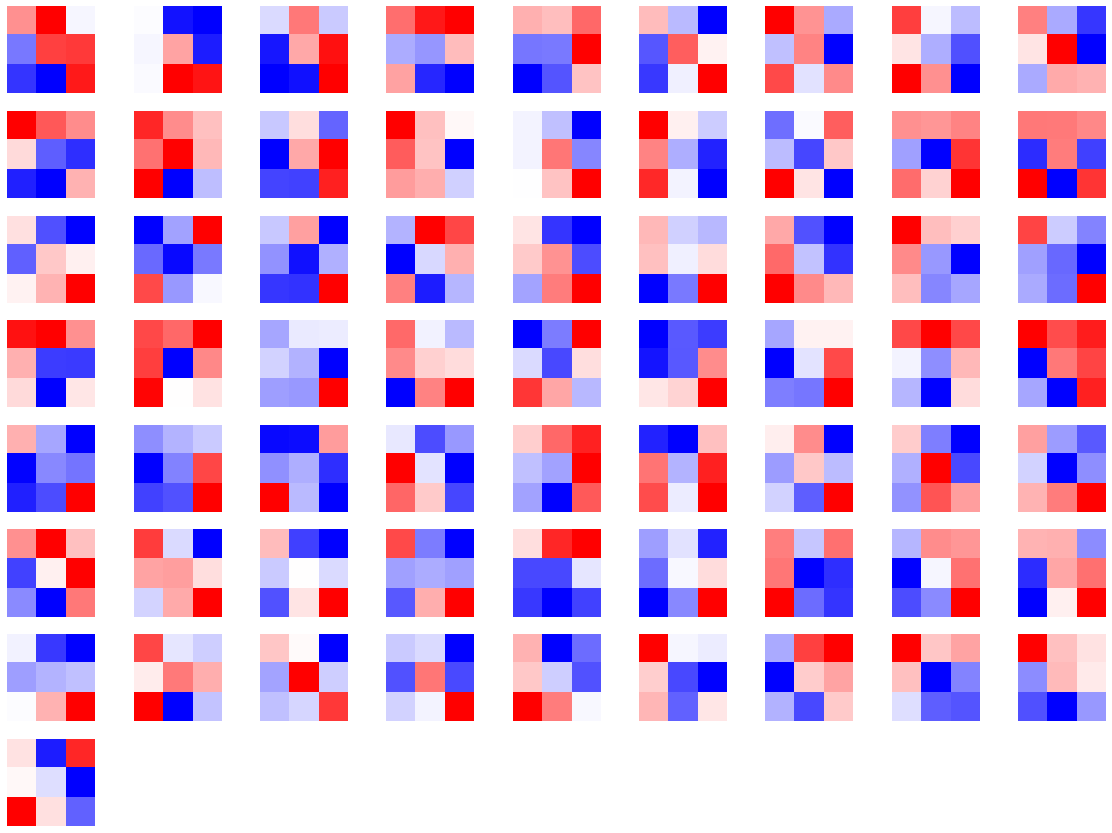

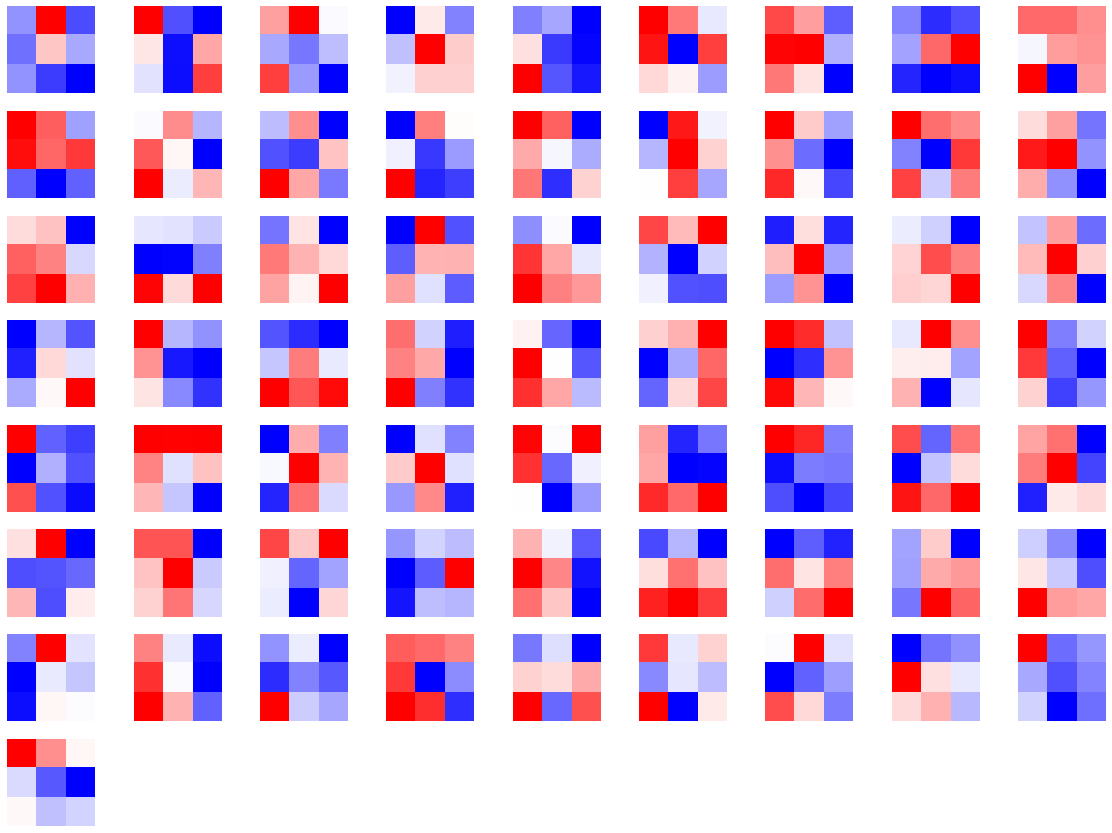

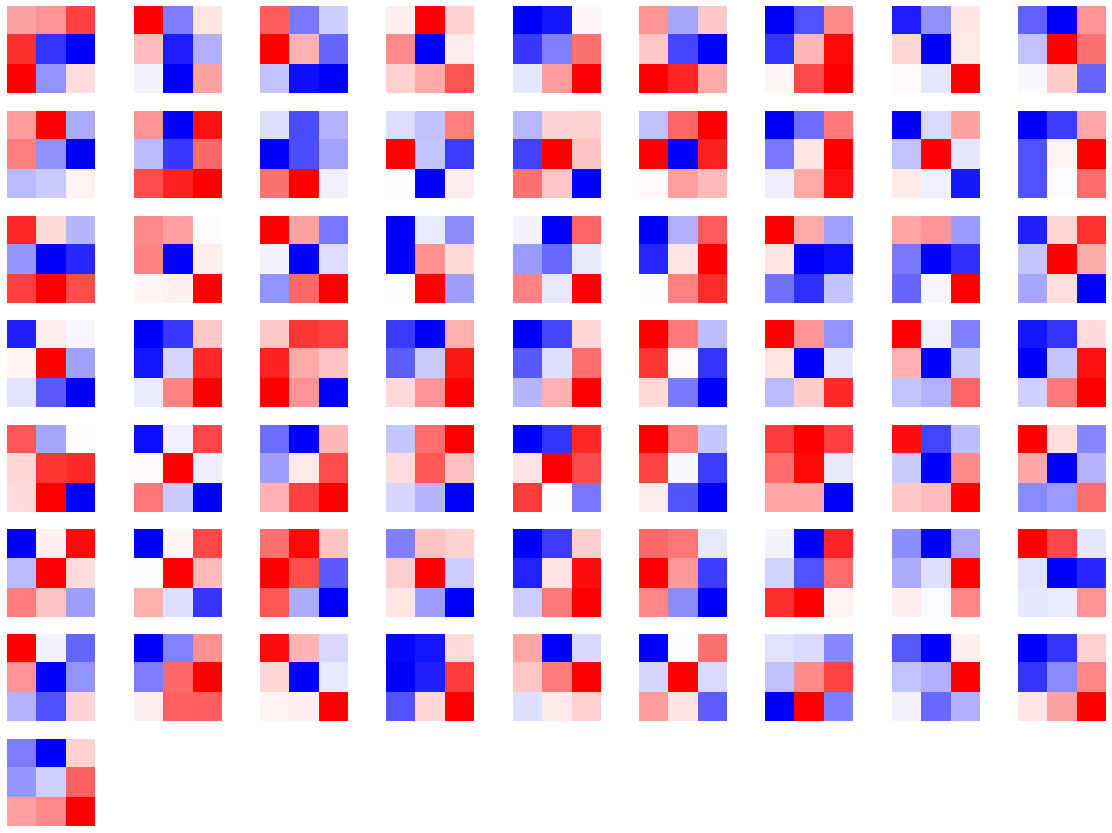

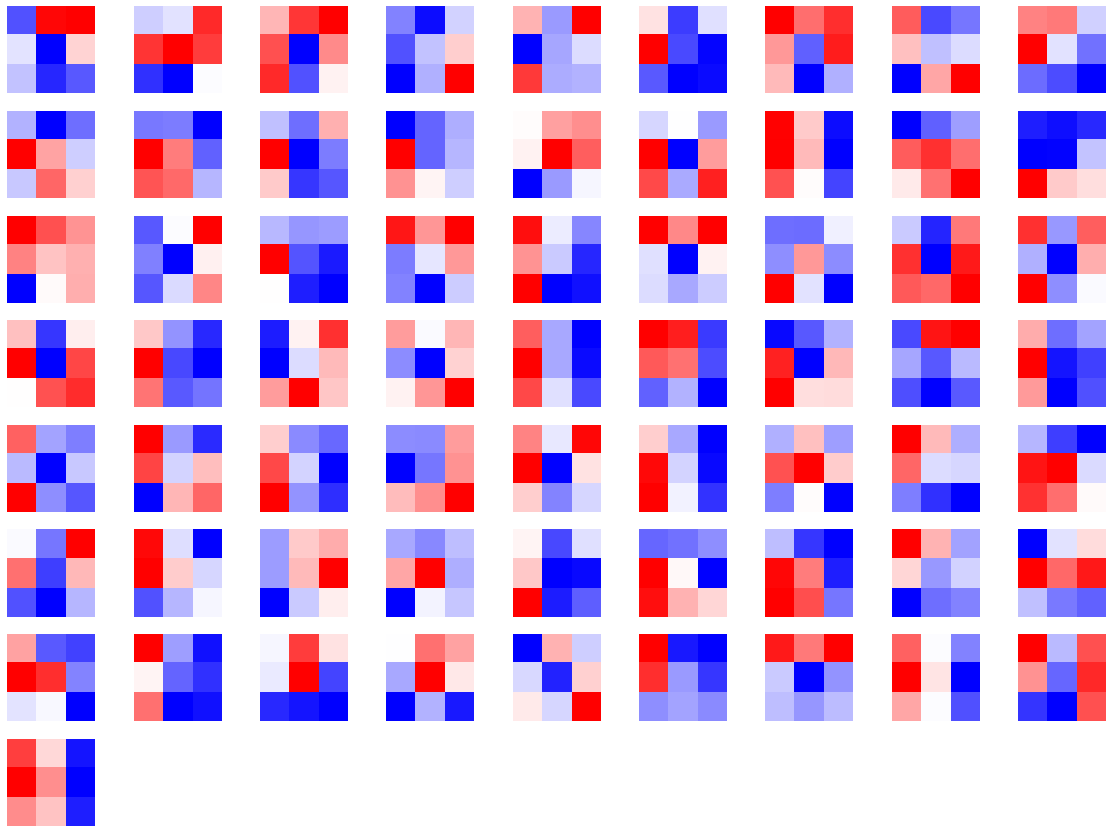

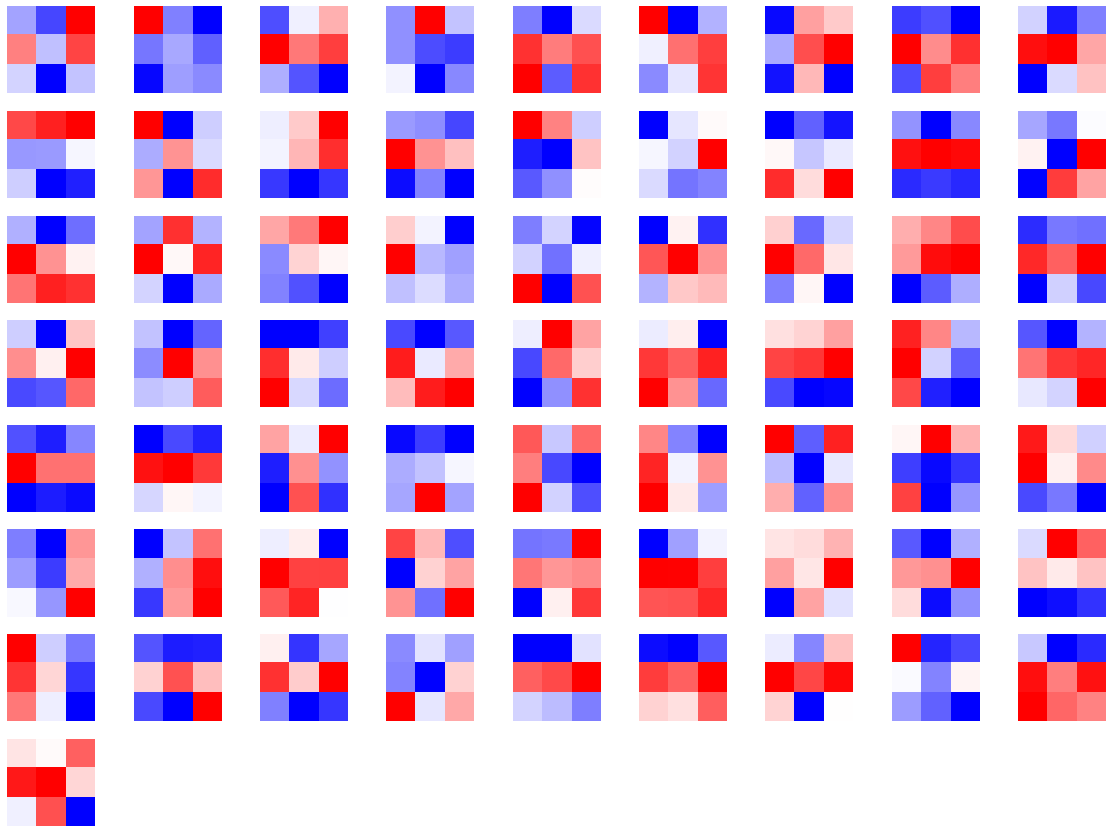

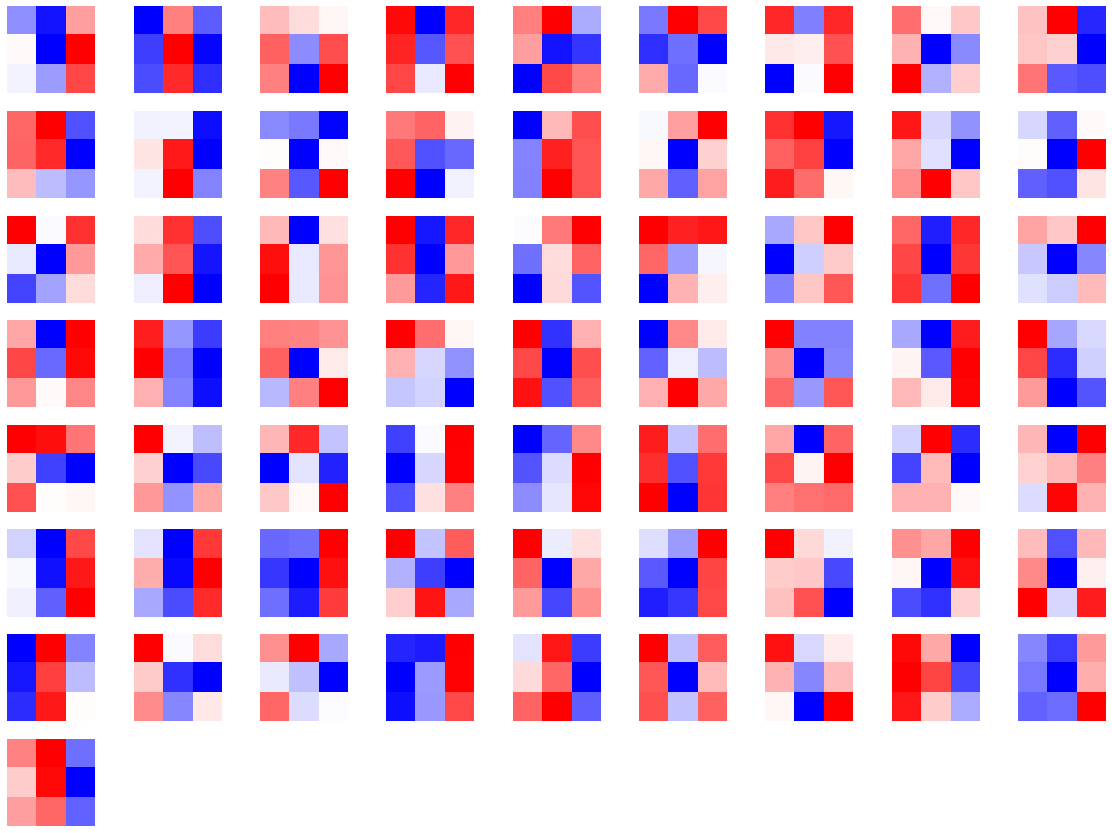

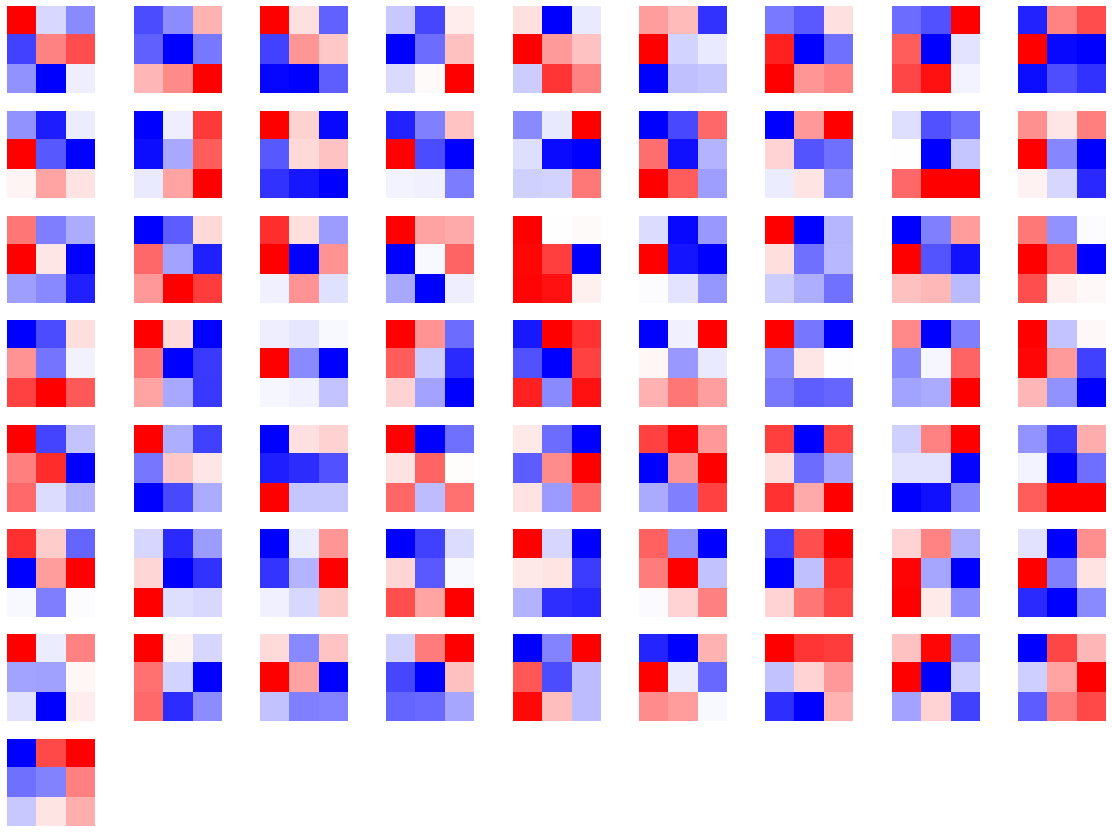

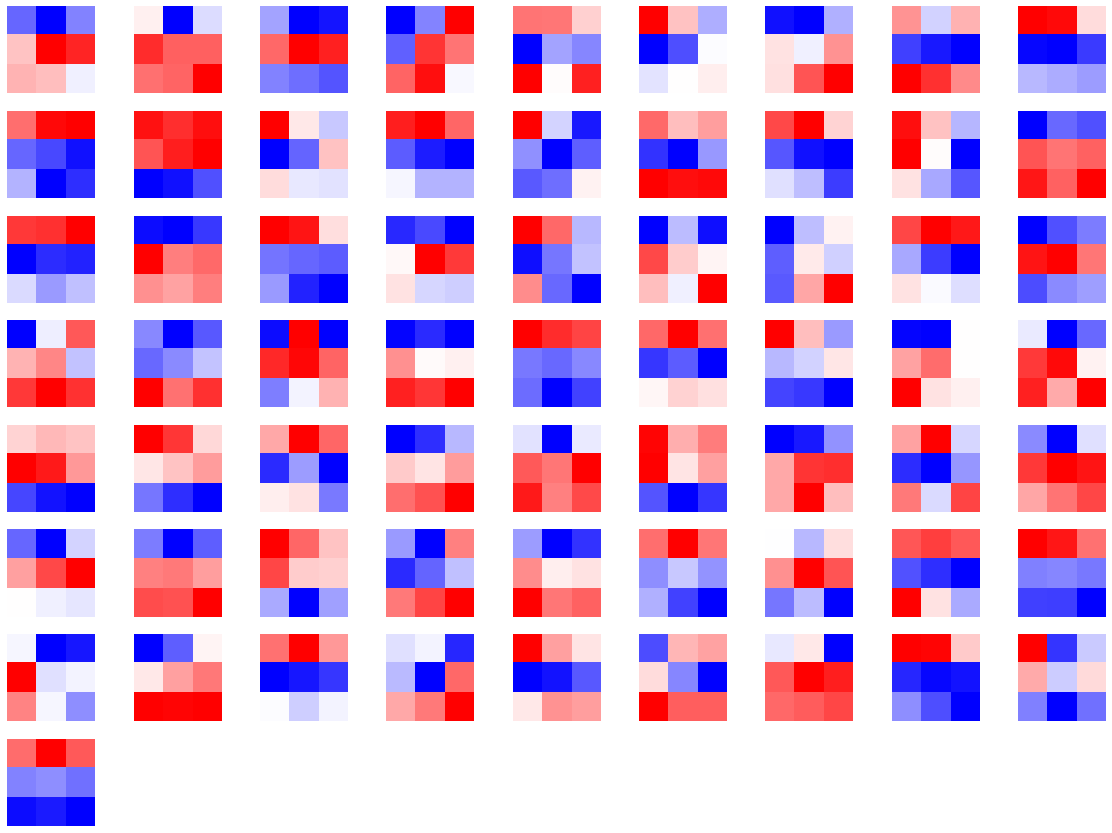

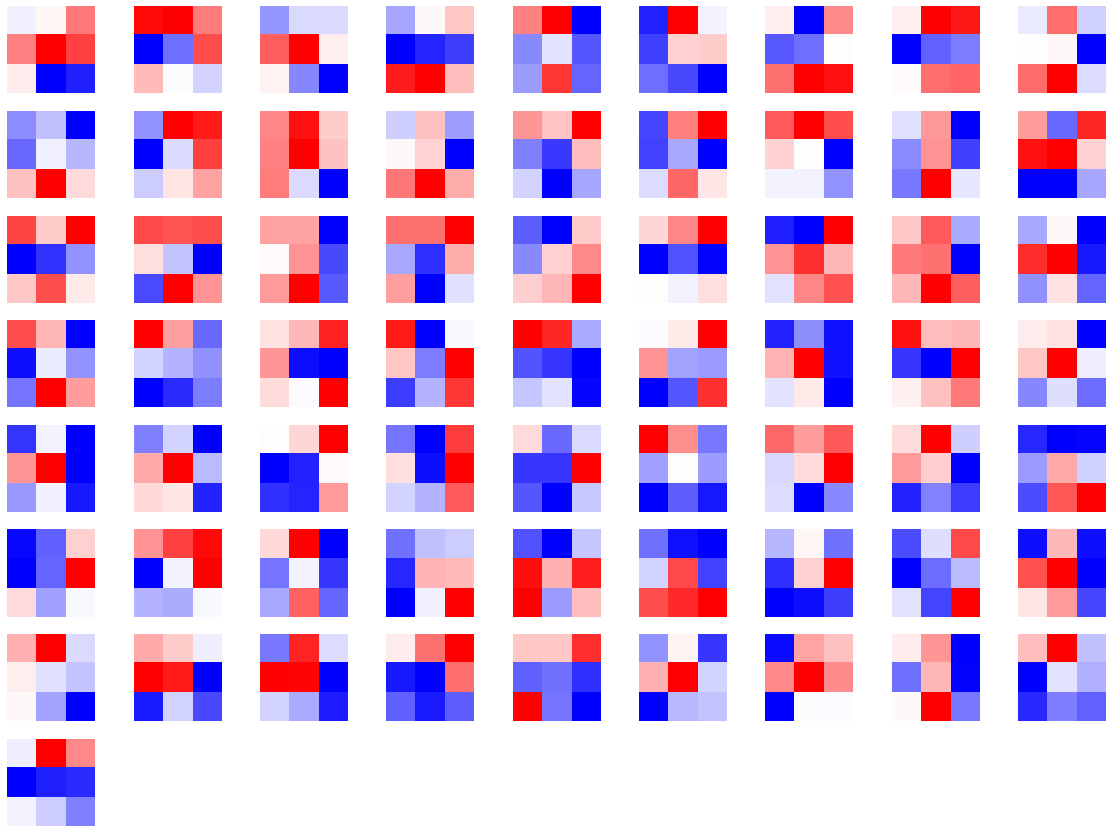

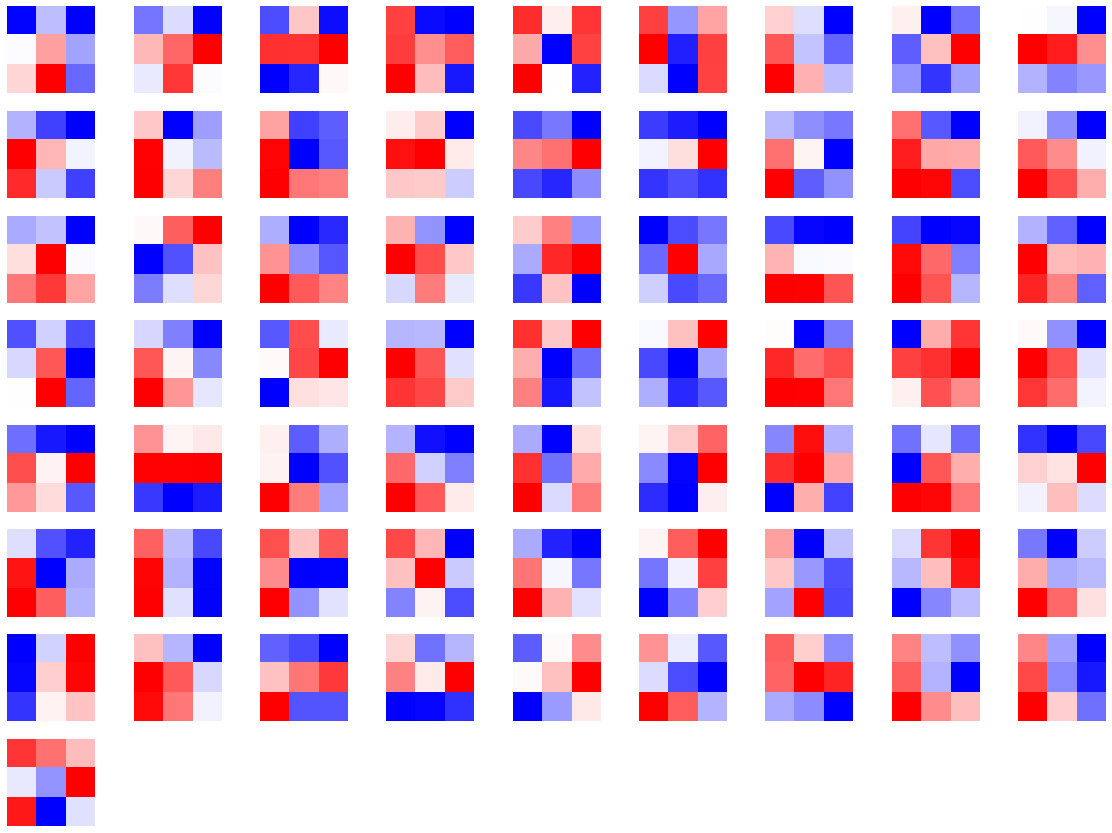

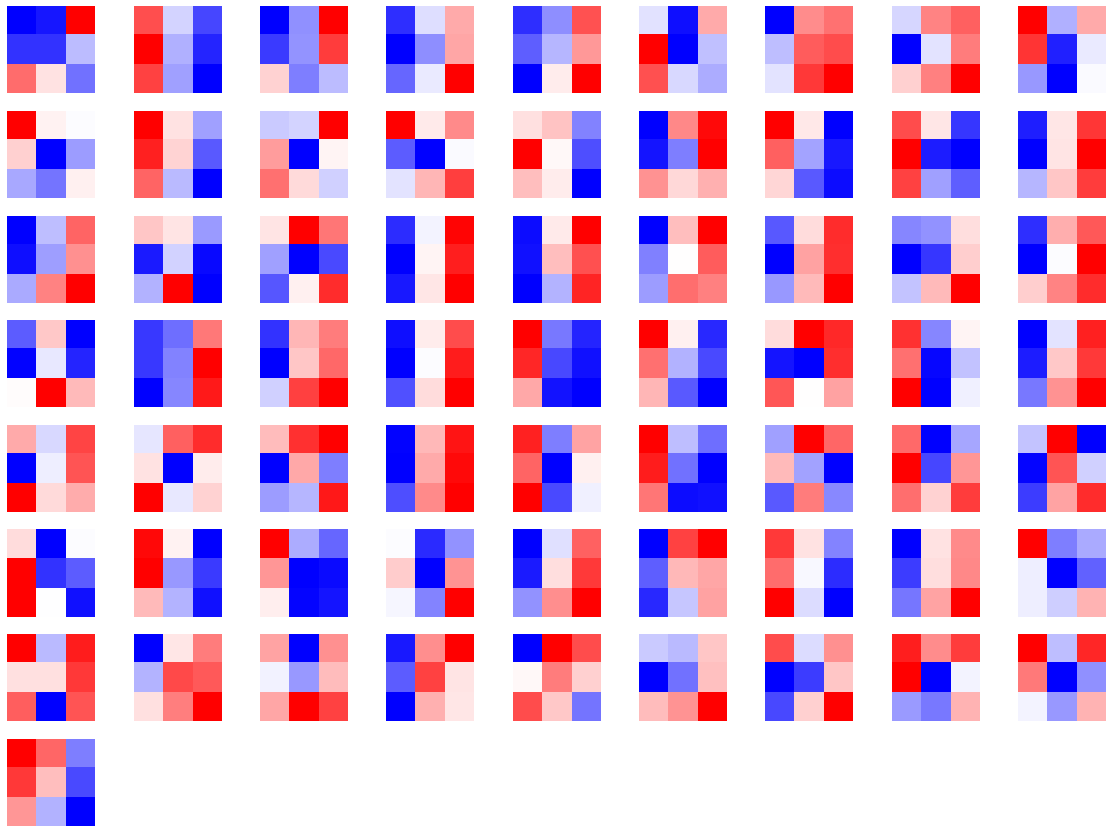

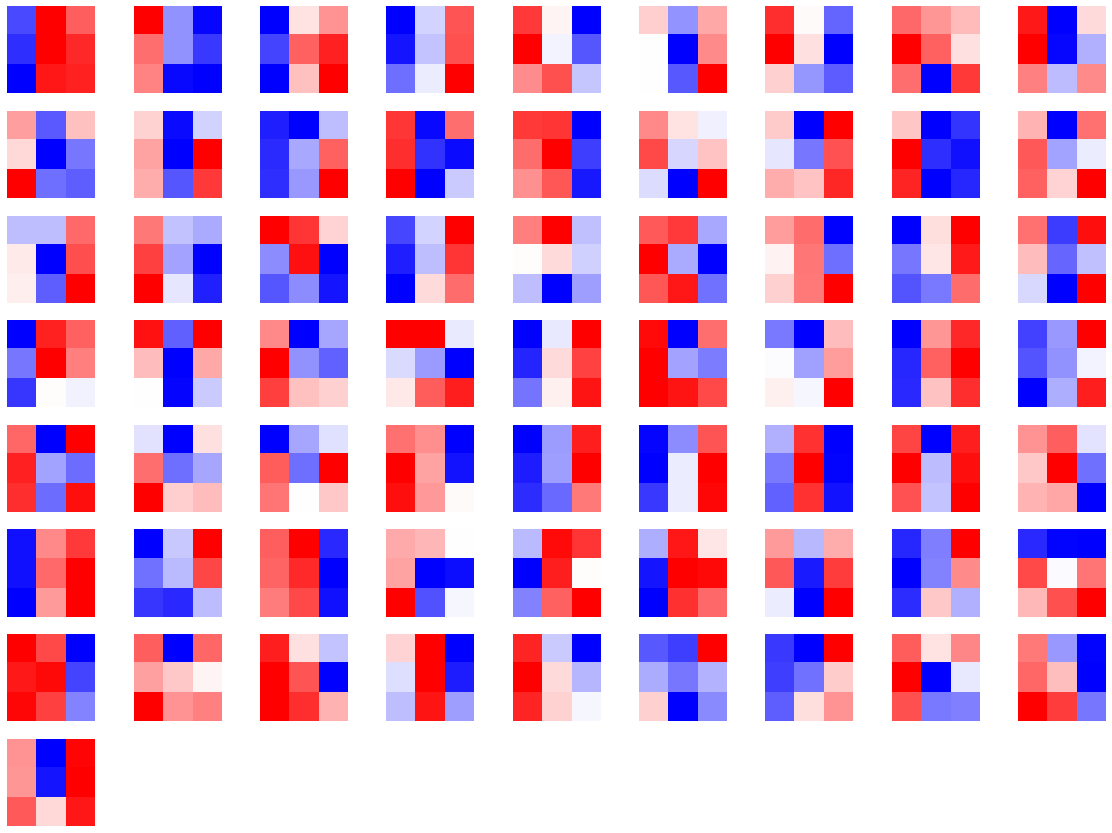

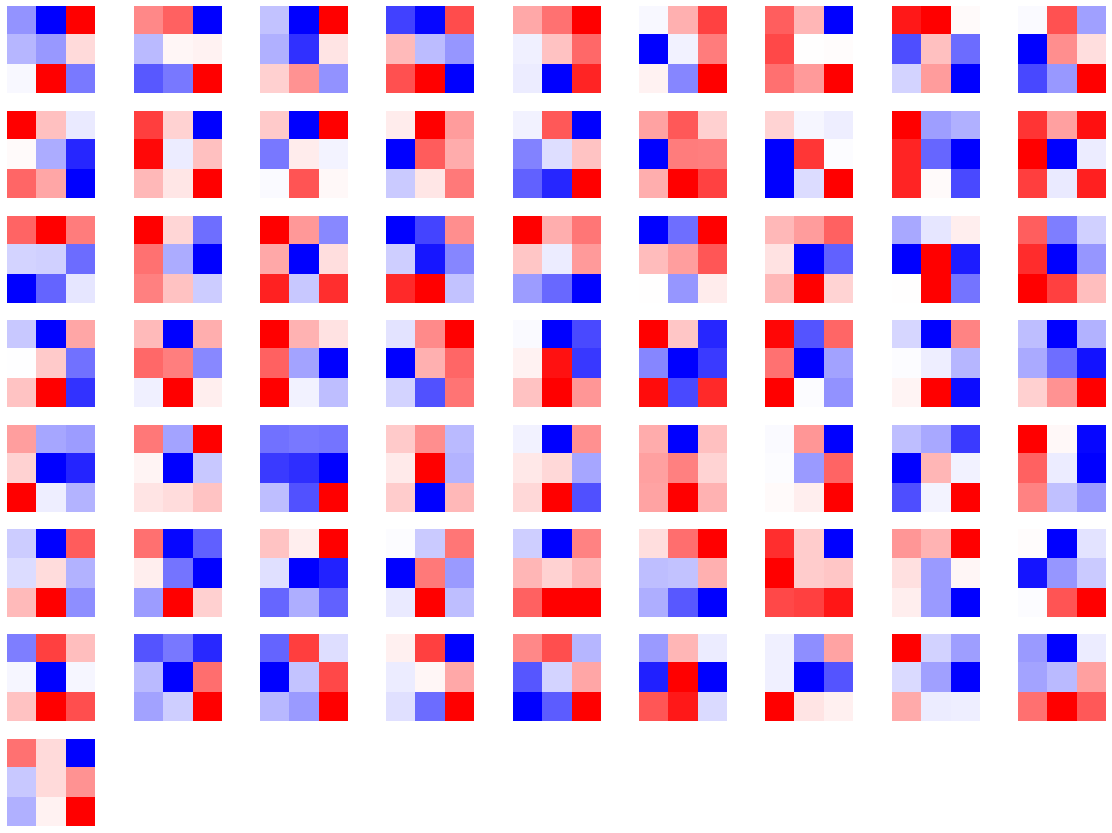

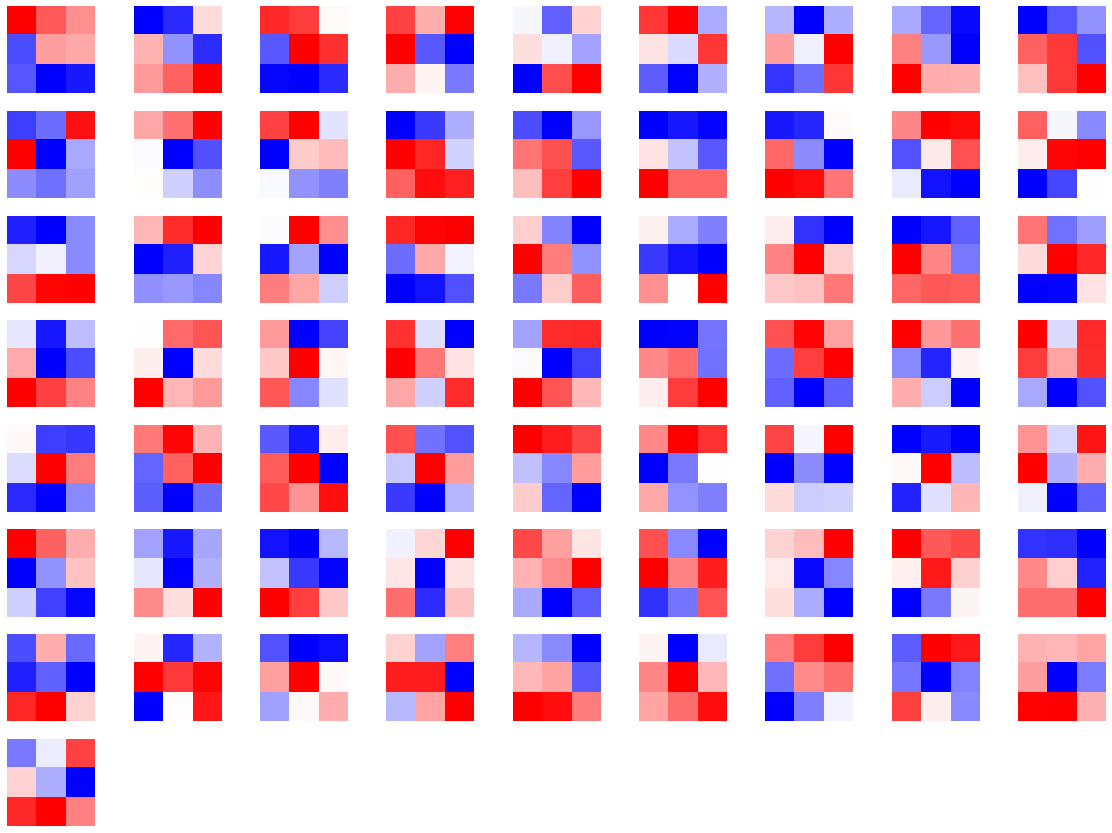

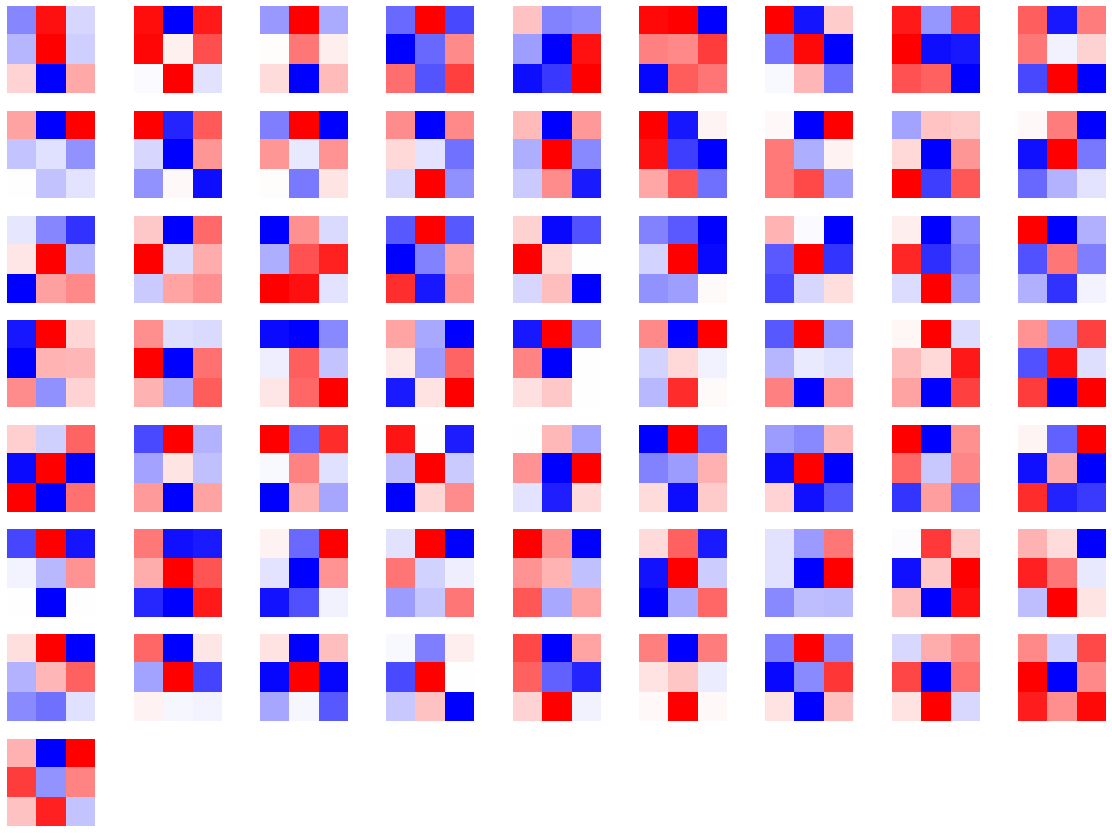

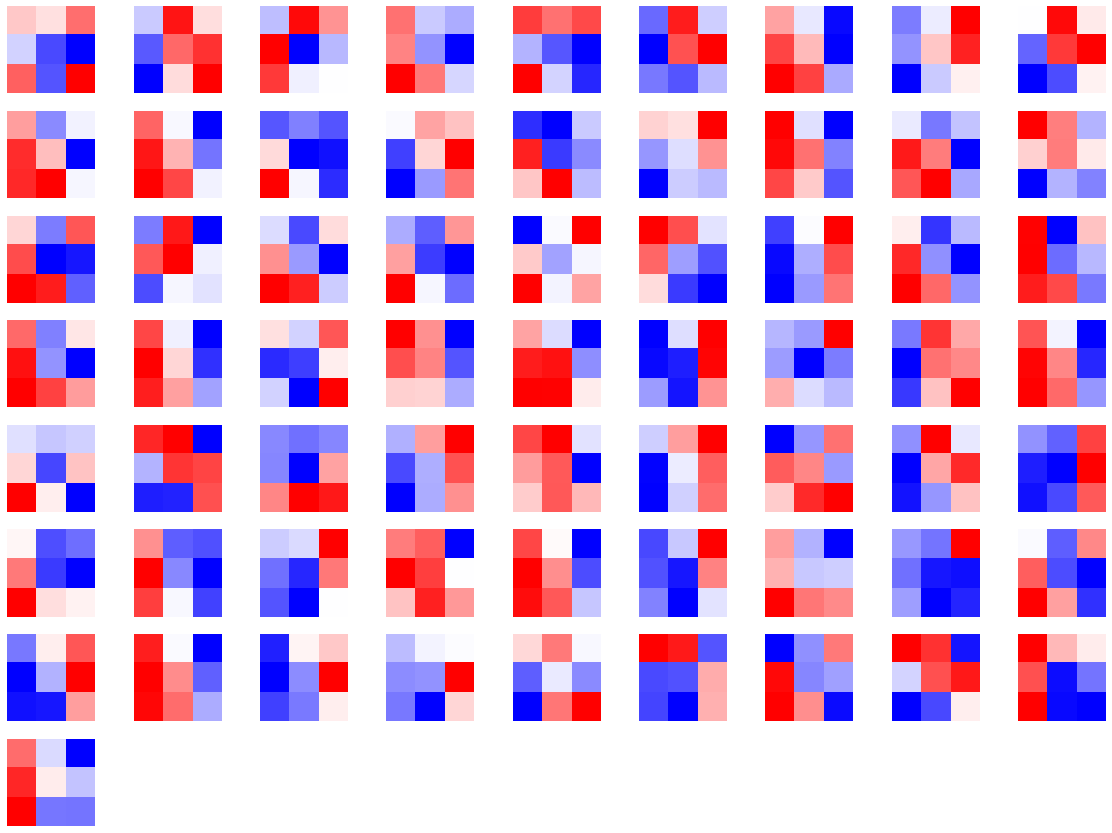

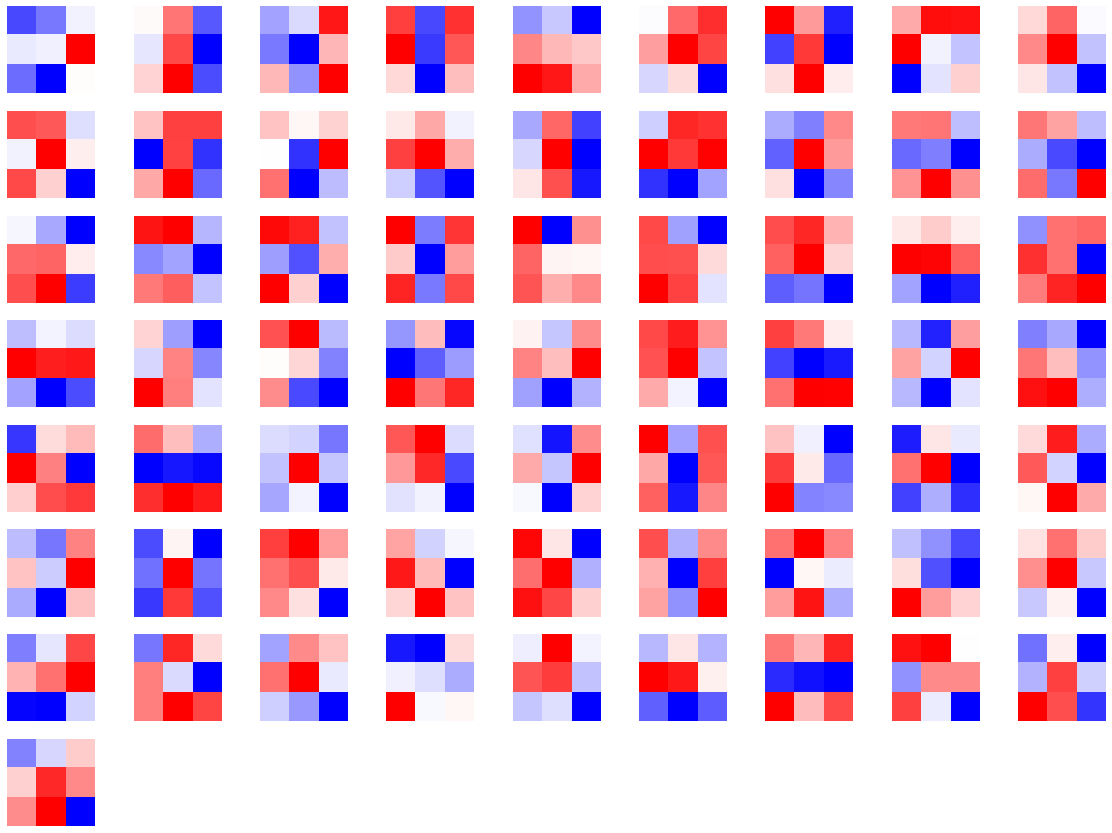

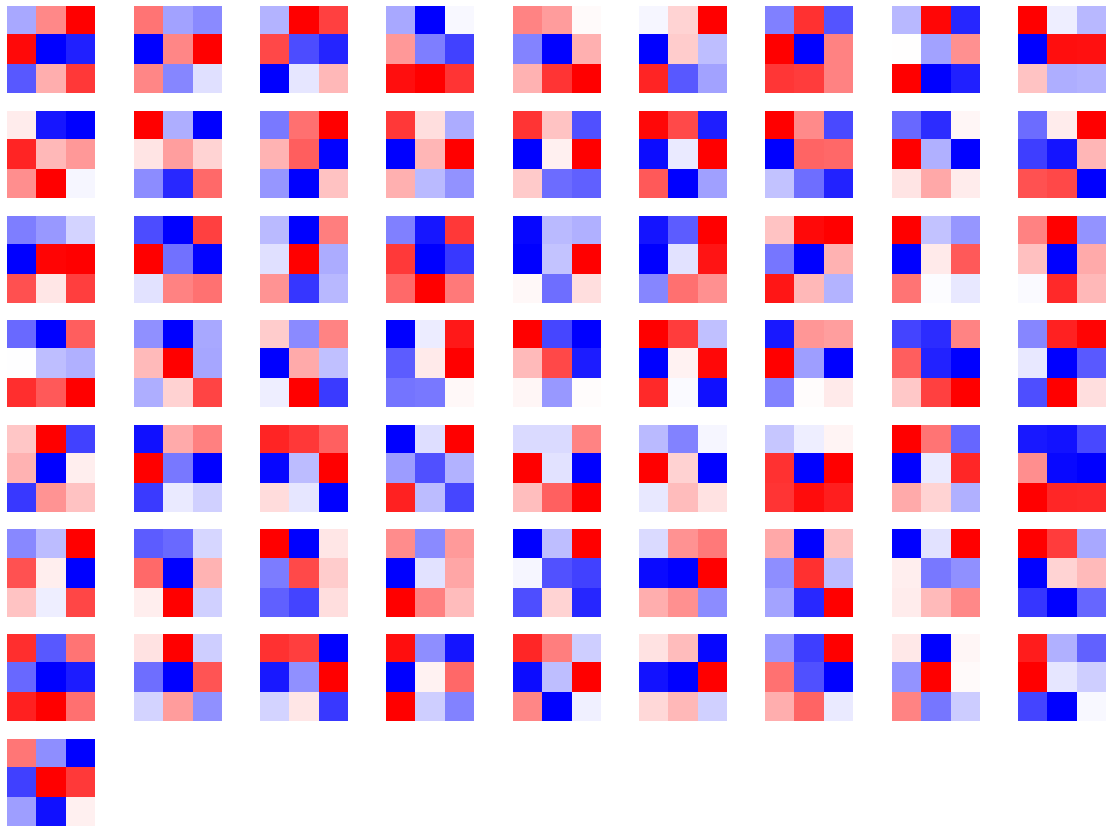

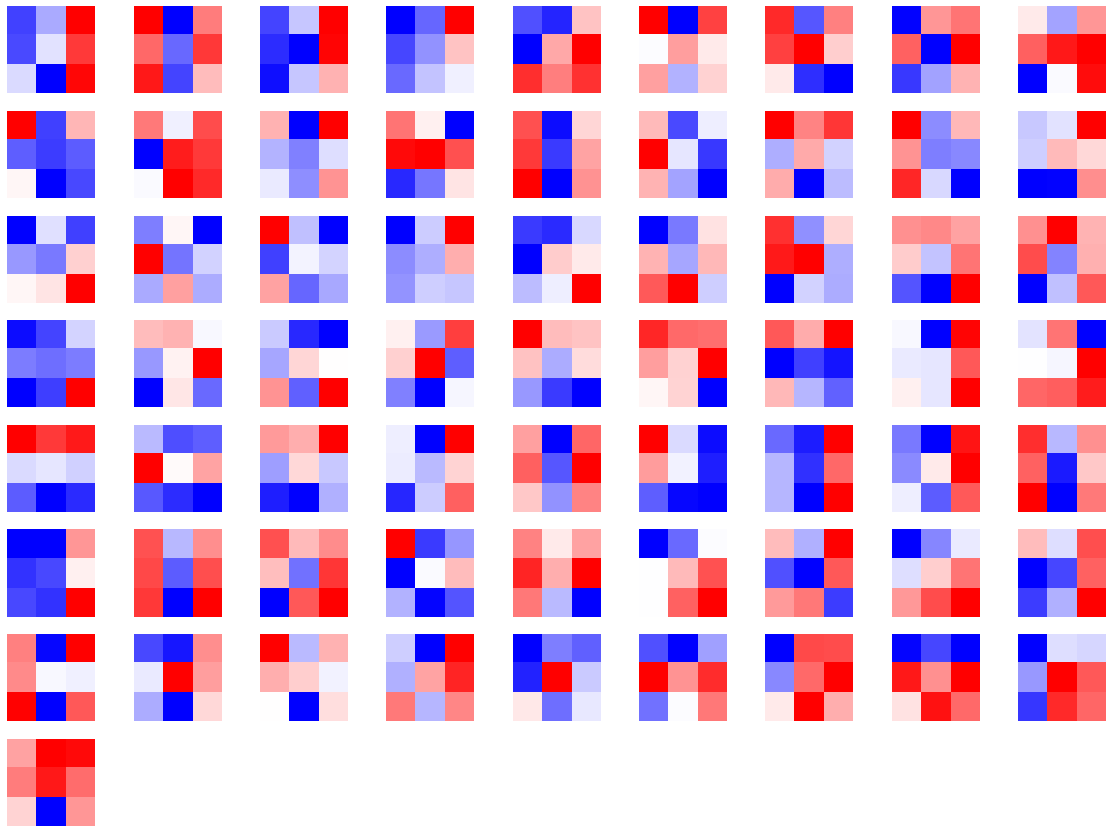

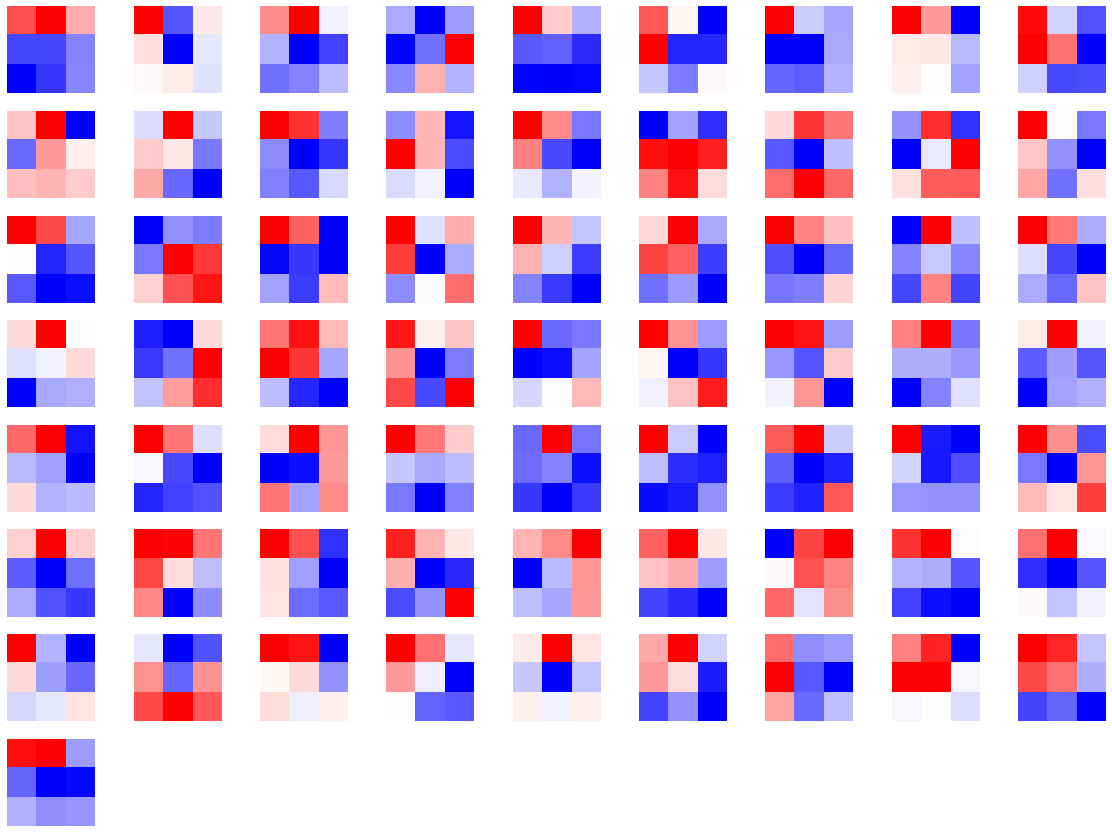

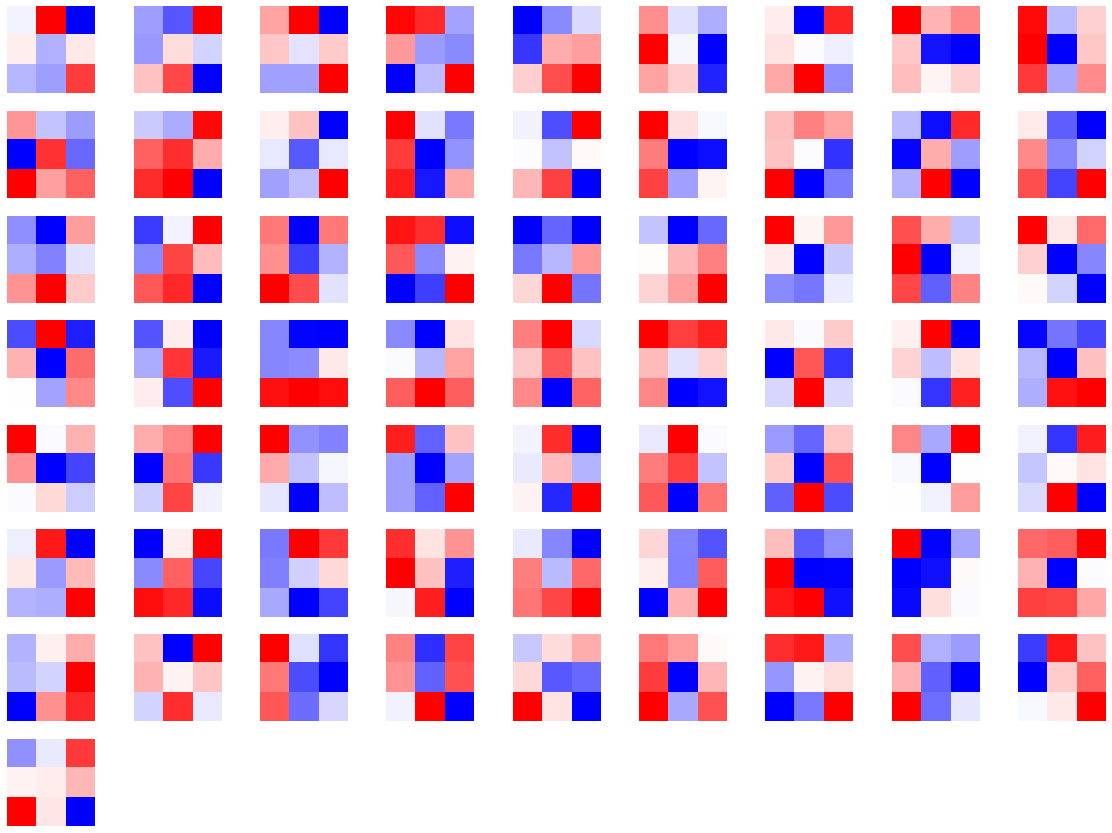

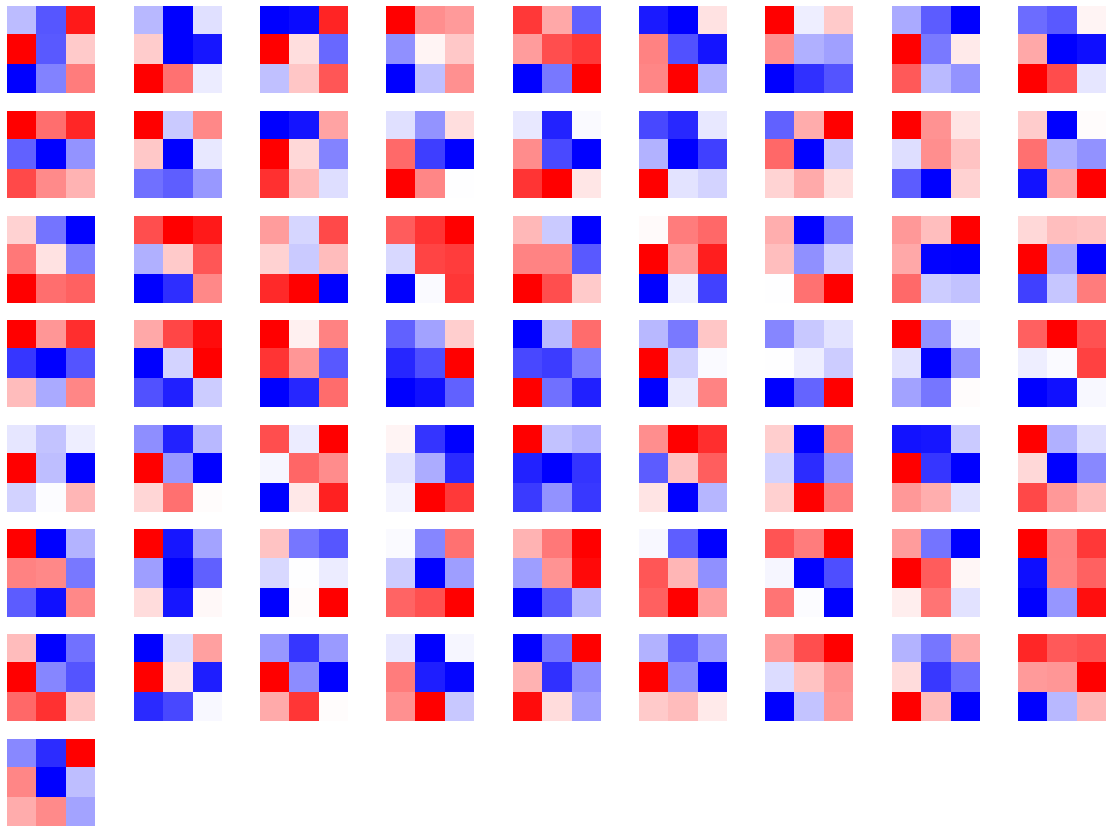

In [5]:
conv1 = dict(model.features.named_children())['3']
kernel_set = conv1.weight.detach()
num = len(conv1.weight.detach())
print(kernel_set.shape)

for i in range(0, num):
    i_kernel = kernel_set[i]
    plt.figure(figsize=(20, 17))
    if (len(i_kernel)) > 1:
        for idx, filer in enumerate(i_kernel):
            plt.subplot(9, 9, idx+1)
            plt.axis('off')
            plt.imshow(filer[:, :].detach(), cmap = 'bwr')

可以看见第三层的特征图是64维变为128维.

### 7.2.2 CNN特征图可视化
特征图: 输入的原始图像经过每次卷积层得到的数据

可视化特征图是为了看到模型提取的特征是什么样子的.

获取特征图的途径
1. 从输入开始, 逐层做forward.
2. 使用接口hook, 在网络向前传播的过程中就可以直接读取到钩子.

In [7]:
class Hook(object):
    # 初始化hook
    def __init__(self):
        self.module_name = []
        self.features_in_hook = []
        self.features_out_hook = []

    def __call__(self,module, fea_in, fea_out):
        print("hooker working", self)
        self.module_name.append(module.__class__)
        self.features_in_hook.append(fea_in)
        self.features_out_hook.append(fea_out)
        return None
    
def plot_feature(model, idx):
    hh = Hook()
    model.features[idx].register_forward_hook(hh)
    
    forward_model(model,False)
    print(hh.module_name)
    print((hh.features_in_hook[0][0].shape))
    print((hh.features_out_hook[0].shape))
    
    out1 = hh.features_out_hook[0]

    total_ft  = out1.shape[1]
    first_item = out1[0].cpu().clone()    

    plt.figure(figsize=(20, 17))
    
    for ftidx in range(total_ft):
        if ftidx > 99:
            break
        ft = first_item[ftidx]
        plt.subplot(10, 10, ftidx+1) 
        
        plt.axis('off')
        #plt.imshow(ft[ :, :].detach(),cmap='gray')
        plt.imshow(ft[ :, :].detach())

### 7.2.3 CNN class activation map可视化方法
CAM是用于判断哪些变量对模型来说是重要的. 在CNN可视化的场景下, 即判断图像中哪些像素点对预测结果是最重要的. 我们可以通过重要程度梯度的可视化得到相应的结论.

同时, 在CAM的基础上也得到了Grad-CAM等等.

![cam](./figures/cam.png)

CAM系列操作的实现可以通过工具包`pytorch-grad-cam`来实现

D:\ProgramFiles\Anaconda3\envs\pytorch_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


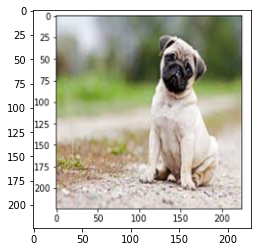

In [1]:
import torch
from torchvision.models import vgg11,resnet18,resnet101,resnext101_32x8d
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

model = vgg11(pretrained=True)
img_path = './figures/dog.png'
# resize操作是为了和传入神经网络训练图片大小一致
img = Image.open(img_path).resize((224,224))
# 需要将原始图片转为np.float32格式并且在0-1之间 
rgb_img = np.float32(img)/255
plt.imshow(img)

In [25]:
# 显示梯度图

from pytorch_grad_cam import GradCAM,ScoreCAM,GradCAMPlusPlus,AblationCAM,XGradCAM,EigenCAM,FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import torchvision.transforms as T

target_layers = [model.features[-1]]
# 选取合适的类激活图，但是ScoreCAM和AblationCAM需要batch_size
cam = GradCAM(model=model,target_layers=target_layers)
preds = 200 # 设置preds值
targets = [ClassifierOutputTarget(preds)]
trans = T.ToTensor()
img_tensor = trans(img)
img_tensor1 = img_tensor.transpose(0,2)
grayscale_cam = cam(input_tensor=img_tensor1, targets=targets)
grayscale_cam = grayscale_cam[0, :]
cam_img = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
print(type(cam_img))
Image.fromarray(cam_img)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 3, 3, 3], but got 3-dimensional input of size [224, 224, 3] instead

![grad_cam](./figures/cam_dog.png)

### 7.2.4 使用FlashTorch
FlashTorch是一种能够快速实现CNN可视化的工具包

- 安装

`pip install flashtorch`

- 可视化梯度

In [ ]:
import matplotlib.pyplot as plt
import torchvision.models as models
from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop

model = models.alexnet(pretrained=True)
backprop = Backprop(model)

image = load_image('./images/great_grey_owl.jpg')
owl = apply_transforms(image)

target_class = 24
backprop.visualize(owl, target_class, guided=True, use_gpu=True)

- 可视化卷积核

In [ ]:
import torchvision.models as models
from flashtorch.activmax import GradientAscent

model = models.vgg16(pretrained=True)
g_ascent = GradientAscent(model.features)

# specify layer and filter info
conv5_1 = model.features[24]
conv5_1_filters = [45, 271, 363, 489]

g_ascent.visualize(conv5_1, conv5_1_filters, title="VGG16: conv5_1")

## 7.3 使用TensorBoard可视化训练过程
在训练过程中, 能够实时观测每一个epoch的loss, 甚至是观察损失函数曲线的变化, 能够让我们更加清晰地察觉到模型的变化.

此外, 在训练过程中的输入数据, 模型结构, 参数分布等, 都可以帮助我们在训练过程查找问题.

TensorBoard就是一种经典的可视化工具.

### 7.3.1 TensorBoard安装
在指定环境下安装:

`pip install tensorboard`

也可以直接使用pytorch自带的tensorboard工具.

### 7.3.2 TensorBoard可视化原理
TensorBoard可以记录我们指定的数据, 比如每一层的feature map, 权重, loss等.

TensorBoard将会把记录下来的内容保存在一个指定文件夹中, 然后其会不断记录, 并以网页的形式可视化.

### 7.3.3 TensorBoard的配置和启动
1. 指定保存文件夹

In [ ]:
# 这个是从PyTorch自带的tensorboard进行import
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./runs')

2. 启动TensorBoard

`tensorboard --logdir=</path/to/logs/> --port=xxxx`

中间填写记录文件的路径.

正常的运行类似jupyter notebook的开启, 也可以通过nohup或者tmux工具来进行后台运行.